# Data 1

In [2]:
import numpy as np
import pandas as pd;pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

VAT is monthly tax. CIT, EDT, NITDA, PTF, and others except WHT are yearly. WHT is payed anytime, it offsets the CIT at the end of the tax year.

In [3]:
# df_1 = pd.read_csv('/content/drive/MyDrive/Opeyemi MSC Project/LMSTOcleaned_dataset.csv')
df_1 = pd.read_csv('LMSTOcleaned_dataset.csv')
df_1.columns = df_1.columns.str.title()
df_1.head(2)

,Taxpayer,Tax,Amount,Cit,Edt,Nitdel,Naseni,Ptf,Paymentgateway,Office,State,Region,Segment,Department,Sector,Filing Date,Payment Date
0,SOLBEC LIMITED,VAT,"4,500.00",-,-,-,-,-,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45.000
1,SOLBEC LIMITED,VAT,"6,100.00",-,-,-,-,-,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08.000


In [4]:
df_1.nunique()

Taxpayer          1655
Tax                  8
Amount            6275
Cit                707
Edt               2001
Nitdel              10
Naseni              10
Ptf               1421
Paymentgateway       3
Office               1
State                1
Region               1
Segment              1
Department           1
Sector              19
Filing Date        845
Payment Date      9396
dtype: int64

In [5]:
df_1['Tax'].value_counts()

Tax
VAT          4524
CIT GROUP    3657
WHT          1104
EMTL           89
WVAT           16
PAYE           10
CGT             5
SD              5
Name: count, dtype: int64

In [6]:
for tax_type in df_1['Tax'].value_counts().index:
    # Extract amounts for the current tax type
    amounts = df_1.loc[df_1['Tax'] == tax_type, 'Amount']
    # Add a new column for the current tax type and fill with amounts
    df_1[tax_type] = amounts

df_1.drop(columns=['Amount', 'Tax'], inplace=True)
df_1.replace('-', np.nan, inplace=True)

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Taxpayer        9410 non-null   object
 1   Cit             3657 non-null   object
 2   Edt             3657 non-null   object
 3   Nitdel          3657 non-null   object
 4   Naseni          3657 non-null   object
 5   Ptf             3657 non-null   object
 6   Paymentgateway  9410 non-null   object
 7   Office          9410 non-null   object
 8   State           9410 non-null   object
 9   Region          9410 non-null   object
 10  Segment         9410 non-null   object
 11  Department      9410 non-null   object
 12  Sector          9410 non-null   object
 13  Filing Date     9410 non-null   object
 14  Payment Date    9410 non-null   object
 15  VAT             4524 non-null   object
 16  CIT GROUP       3657 non-null   object
 17  WHT             1104 non-null   object
 18  EMTL    

In [8]:
df_1.isnull().sum().sort_values(ascending=False)

SD                9405
CGT               9405
PAYE              9400
WVAT              9394
EMTL              9321
WHT               8306
Edt               5753
Nitdel            5753
Naseni            5753
Ptf               5753
Cit               5753
CIT GROUP         5753
VAT               4886
Payment Date         0
Taxpayer             0
Filing Date          0
Sector               0
Segment              0
Region               0
State                0
Office               0
Paymentgateway       0
Department           0
dtype: int64

In [9]:
df_1[df_1.isnull().any(axis=1)]

,Taxpayer,Cit,Edt,Nitdel,Naseni,Ptf,Paymentgateway,Office,State,Region,Segment,Department,Sector,Filing Date,Payment Date,VAT,CIT GROUP,WHT,EMTL,WVAT,PAYE,CGT,SD
0,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45.000,"4,500.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08.000,"6,100.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-10-09,2020-10-09 12:56:54.000,"6,900.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-11-11,2020-11-16 15:28:44.000,"7,090.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SOLBEC LIMITED,NaN,NaN,NaN,NaN,NaN,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-12-11,2020-12-11 15:32:09.000,"5,580.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,METRICS INTEGRATED SOLAR SERVICES LTD,0,0,0,0,412.58,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2023-06-26,2023-12-31 18:51:26.000,NaN,412.58,NaN,NaN,NaN,NaN,NaN,NaN
9406,AVENUE3 BUSINESS SOLUTIONS LTD,0,0,0,0,0,QuickTeller,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2023-02-16,2023-12-31 19:55:00.000,NaN,"30,000.00",NaN,NaN,NaN,NaN,NaN,NaN
9407,LEADSCAPE GLOBAL CONCEPT LTD,0,"118,841.87",0,0,235,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,Administrative and support service activities,2022-06-23,2023-12-31 19:29:09.000,NaN,"119,076.87",NaN,NaN,NaN,NaN,NaN,NaN
9408,SHEENCARE MEDICAL SERVICES LIMITED,0,0,0,0,25,QuickTeller,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,Human health and social work activities,2023-12-31,2023-12-31 23:52:00.000,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# fill null values with 0
df_1.fillna(0, inplace=True)
# Rename columns to lowercase and replace spaces with underscores
df_1.columns = df_1.columns.str.lower().str.replace(' ', '_')

# convert date attributes to datetime from object
df_1['payment_date'] = pd.to_datetime(df_1['payment_date'])
# df_1['filing_date'] = pd.to_datetime(df_1['filing_date'], errors='coerce', format='%Y-%m-%d', infer_datetime_format=True).fillna(df_1['filing_date'])
df_1['filing_date'] = pd.to_datetime(df_1['filing_date'], errors='ignore', format='%Y-%m-%d')

C:\Users\Dell\AppData\Local\Temp\ipykernel_18708\3613484344.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_1['filing_date'] = pd.to_datetime(df_1['filing_date'], errors='ignore', format='%Y-%m-%d')


In [11]:
df_1.isnull().sum().any()

False

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   taxpayer        9410 non-null   object        
 1   cit             9410 non-null   object        
 2   edt             9410 non-null   object        
 3   nitdel          9410 non-null   object        
 4   naseni          9410 non-null   object        
 5   ptf             9410 non-null   object        
 6   paymentgateway  9410 non-null   object        
 7   office          9410 non-null   object        
 8   state           9410 non-null   object        
 9   region          9410 non-null   object        
 10  segment         9410 non-null   object        
 11  department      9410 non-null   object        
 12  sector          9410 non-null   object        
 13  filing_date     9410 non-null   object        
 14  payment_date    9410 non-null   datetime64[ns]
 15  vat 

In [13]:
# df_1 = pd.read_csv('first_data.csv').drop(['Unnamed: 27'], axis=1).head(2)
df_1.head(2)

,taxpayer,cit,edt,nitdel,naseni,ptf,paymentgateway,office,state,region,segment,department,sector,filing_date,payment_date,vat,cit_group,wht,emtl,wvat,paye,cgt,sd
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0


In [14]:
df_1.rename(columns={
    'vat': 'value_added_tax',
    'cit': 'company_income_tax',
    'edt': 'education_tax',
    'nitdel': 'national_information_technology_levy',
    'ptf': 'petroleum_trust_fund',
    'paymentgateway': 'payment_gateway',
    'wht': 'withholding_tax',
    'emtl': 'electronic_money_transfer_levy',
    'wvat': 'withholding_value_added_tax',
    'paye': 'pay_as_you_earn',
    'cgt': 'capital_gains_tax',
    'sd': 'stamp_duties'
}, inplace=True)

create a new column from df_1. <br>
The column name will be called vat_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
value_added_tax	paid on or before the 21st of the month will be known as "Non-Default" while those payment after the 21st of the month will be known as "Default"

In [15]:
df_1['payment_date'] = pd.to_datetime(df_1['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'vat_compliance' column
conditions = [
    df_1['payment_date'].dt.day <= 21,  # Paid on or before the 21st of the month
    df_1['payment_date'].dt.day > 21    # Paid after the 21st of the month
]
# Define the values corresponding to each condition
values = ['Non-Default', 'Default']
# Create the 'vat_compliance' column based on the conditions
df_1['vat_compliance'] = np.select(conditions, values)
df_1['vat_compliance'].value_counts()

vat_compliance
Non-Default    6598
Default        2812
Name: count, dtype: int64

create a new column from df_1. <br>
The column name will be called cit_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
company_income_tax	paid on or before the 30th of June will be known as "Non-Default" while those payment after the 30th of June will be known as "Default"

In [16]:
df_1['payment_date'] = pd.to_datetime(df_1['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'cit_compliance' column
conditions_cit = [
    df_1['payment_date'].dt.month <= 6,  # Paid on or before the 30th of June
    df_1['payment_date'].dt.month > 6    # Paid after the 30th of June
]
# Define the values corresponding to each condition
values_cit = ['Non-Default', 'Default']
# Create the 'cit_compliance' column based on the conditions
df_1['cit_compliance'] = np.select(conditions_cit, values_cit)
df_1['cit_compliance'].value_counts()

cit_compliance
Default        4897
Non-Default    4513
Name: count, dtype: int64

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   taxpayer                              9410 non-null   object        
 1   company_income_tax                    9410 non-null   object        
 2   education_tax                         9410 non-null   object        
 3   national_information_technology_levy  9410 non-null   object        
 4   naseni                                9410 non-null   object        
 5   petroleum_trust_fund                  9410 non-null   object        
 6   payment_gateway                       9410 non-null   object        
 7   office                                9410 non-null   object        
 8   state                                 9410 non-null   object        
 9   region                                9410 non-null   object        
 10  

In [18]:
# review data 1 again

df_1.head(3)

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0,Non-Default,Default
2,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-10-09,2020-10-09 12:56:54,"6,900.00",0,0,0,0,0,0,0,Non-Default,Default


# Data 2

In [19]:
# df_2 = pd.read_csv('/content/drive/MyDrive/Opeyemi MSC Project/LMSTOWP_cleaned_dataset.csv', header=1)
df_2 = pd.read_csv('LMSTOWP_cleaned_dataset.csv', header=1)
df_2.dropna(inplace=True)
print(df_2.shape)
df_2.head()

(14764, 9)


,Payment Date,TIN,Amount,Payment Method,Assess Period,Tax Office,Tax Type,Bank Branch,Payment Service Provider
0,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,39060.46,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
1,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,39060.46,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
2,2013-09-11 00:00:00,AFTECH NIGERIA LIMITED,9150.00,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
3,2013-10-10 00:00:00,ZAMIC VENTURES LIMITED,106450.00,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)
4,2013-10-23 00:00:00,AFTECH NIGERIA LIMITED,539666.50,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)


In [20]:
display(df_1.head(1), df_2.head(1))

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default


,Payment Date,TIN,Amount,Payment Method,Assess Period,Tax Office,Tax Type,Bank Branch,Payment Service Provider
0,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,39060.46,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,Value Added Tax,C.B.N. ABUJA - F.C.T.,System Specs (Remita)


In [21]:
for tax_type in df_2['Tax Type'].value_counts().index:
    amounts = df_2.loc[df_2['Tax Type'] == tax_type, 'Amount']
    df_2[tax_type] = amounts

df_2.drop(columns=['Amount', 'Tax Type'], inplace=True)
df_2.replace('-', np.nan, inplace=True)

In [22]:
df_2.isna().sum().sort_values(ascending=False)

Pay As You Earn             14763
Personal Income Tax         14762
Interest                    14759
Capital Gains Tax           14753
Pre-Operational Levy        14716
Penalties                   14617
Education Tax               14169
Withholding Tax             14132
Company Income Tax          10582
Value Added Tax              5623
TIN                             0
Payment Service Provider        0
Bank Branch                     0
Tax Office                      0
Assess Period                   0
Payment Method                  0
Payment Date                    0
dtype: int64

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14764 entries, 0 to 14763
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Payment Date              14764 non-null  object 
 1   TIN                       14764 non-null  object 
 2   Payment Method            14764 non-null  object 
 3   Assess Period             14764 non-null  object 
 4   Tax Office                14764 non-null  object 
 5   Bank Branch               14764 non-null  object 
 6   Payment Service Provider  14764 non-null  object 
 7   Value Added Tax           9141 non-null   float64
 8   Company Income Tax        4182 non-null   float64
 9   Withholding Tax           632 non-null    float64
 10  Education Tax             595 non-null    float64
 11  Penalties                 147 non-null    float64
 12  Pre-Operational Levy      48 non-null     float64
 13  Capital Gains Tax         11 non-null     float64
 14  Interest   

In [24]:
df_2[['Value Added Tax',
      'Company Income Tax',
      'Withholding Tax ',
      'Education Tax ',
      'Penalties ',
      'Pre-Operational Levy ',
      'Capital Gains Tax ',
      'Interest ',
      'Personal Income Tax',
      'Pay As You Earn ']] = df_2[['Value Added Tax',
                                   'Company Income Tax',
                                   'Withholding Tax ',
                                   'Education Tax ',
                                   'Penalties ',
                                   'Pre-Operational Levy ',
                                   'Capital Gains Tax ',
                                   'Interest ',
                                   'Personal Income Tax',
                                   'Pay As You Earn ']].fillna(0).astype(int)

In [25]:
df_2.head(2)

,Payment Date,TIN,Payment Method,Assess Period,Tax Office,Bank Branch,Payment Service Provider,Value Added Tax,Company Income Tax,Withholding Tax,Education Tax,Penalties,Pre-Operational Levy,Capital Gains Tax,Interest,Personal Income Tax,Pay As You Earn
0,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
1,2013-08-02 00:00:00,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0


In [26]:
# convert date attributes to datetime from object
df_2['Payment Date'] = pd.to_datetime(df_2['Payment Date'])
# Rename columns to lowercase and replace spaces with underscores
df_2.columns = df_2.columns.str.lower().str.replace(' ', '_').str.rstrip('_')
# Rename tin column to taxpayer
df_2.rename(columns={'tin': 'taxpayer'}, inplace=True)

In [27]:
df_2.head()

,payment_date,taxpayer,payment_method,assess_period,tax_office,bank_branch,payment_service_provider,value_added_tax,company_income_tax,withholding_tax,education_tax,penalties,pre-operational_levy,capital_gains_tax,interest,personal_income_tax,pay_as_you_earn
0,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
1,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
2,2013-09-11,AFTECH NIGERIA LIMITED,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),9150,0,0,0,0,0,0,0,0,0
3,2013-10-10,ZAMIC VENTURES LIMITED,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),106450,0,0,0,0,0,0,0,0,0
4,2013-10-23,AFTECH NIGERIA LIMITED,OPP,Oct 2013 - Oct 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),539666,0,0,0,0,0,0,0,0,0


In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14764 entries, 0 to 14763
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_date              14764 non-null  datetime64[ns]
 1   taxpayer                  14764 non-null  object        
 2   payment_method            14764 non-null  object        
 3   assess_period             14764 non-null  object        
 4   tax_office                14764 non-null  object        
 5   bank_branch               14764 non-null  object        
 6   payment_service_provider  14764 non-null  object        
 7   value_added_tax           14764 non-null  int32         
 8   company_income_tax        14764 non-null  int32         
 9   withholding_tax           14764 non-null  int32         
 10  education_tax             14764 non-null  int32         
 11  penalties                 14764 non-null  int32         
 12  pre-operational_levy   

In [29]:
df_2.head(3)

,payment_date,taxpayer,payment_method,assess_period,tax_office,bank_branch,payment_service_provider,value_added_tax,company_income_tax,withholding_tax,education_tax,penalties,pre-operational_levy,capital_gains_tax,interest,personal_income_tax,pay_as_you_earn
0,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
1,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0
2,2013-09-11,AFTECH NIGERIA LIMITED,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),9150,0,0,0,0,0,0,0,0,0


create a new column from df_2. <br>
The column name will be called vat_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
value_added_tax	paid on or before the 21st of the month will be known as "Non-Default" while those payment after the 21st of the month will be known as "Default"

In [30]:
df_2['payment_date'] = pd.to_datetime(df_2['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'vat_compliance' column
conditions = [
    df_2['payment_date'].dt.day <= 21,  # Paid on or before the 21st of the month
    df_2['payment_date'].dt.day > 21    # Paid after the 21st of the month
]
# Define the values corresponding to each condition
values = ['Non-Default', 'Default']
# Create the 'vat_compliance' column based on the conditions
df_2['vat_compliance'] = np.select(conditions, values)
df_2['vat_compliance'].value_counts()

vat_compliance
Non-Default    9780
Default        4984
Name: count, dtype: int64

create a new column from df_2. <br>
The column name will be called cit_compliance, it will consist of two unique values, "Default" and "Non-Default". Now, you will reference the payment date to create this <br>.
company_income_tax	paid on or before the 30th of June will be known as "Non-Default" while those payment after the 30th of June will be known as "Default"

In [31]:
df_2['payment_date'] = pd.to_datetime(df_2['payment_date'], format='%d/%m/%Y %H:%M')

# Define the conditions for 'cit_compliance' column
conditions_cit = [
    df_2['payment_date'].dt.month <= 6,  # Paid on or before the 30th of June
    df_2['payment_date'].dt.month > 6    # Paid after the 30th of June
]
# Define the values corresponding to each condition
values_cit = ['Non-Default', 'Default']
# Create the 'cit_compliance' column based on the conditions
df_2['cit_compliance'] = np.select(conditions_cit, values_cit)
df_2['cit_compliance'].value_counts()

cit_compliance
Non-Default    7556
Default        7208
Name: count, dtype: int64

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14764 entries, 0 to 14763
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_date              14764 non-null  datetime64[ns]
 1   taxpayer                  14764 non-null  object        
 2   payment_method            14764 non-null  object        
 3   assess_period             14764 non-null  object        
 4   tax_office                14764 non-null  object        
 5   bank_branch               14764 non-null  object        
 6   payment_service_provider  14764 non-null  object        
 7   value_added_tax           14764 non-null  int32         
 8   company_income_tax        14764 non-null  int32         
 9   withholding_tax           14764 non-null  int32         
 10  education_tax             14764 non-null  int32         
 11  penalties                 14764 non-null  int32         
 12  pre-operational_levy   

In [33]:
# review data 2 again

df_2.head(3)

,payment_date,taxpayer,payment_method,assess_period,tax_office,bank_branch,payment_service_provider,value_added_tax,company_income_tax,withholding_tax,education_tax,penalties,pre-operational_levy,capital_gains_tax,interest,personal_income_tax,pay_as_you_earn,vat_compliance,cit_compliance
0,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0,Non-Default,Default
1,2013-08-02,HITS FURNITURE NIG. LIMITED,OPP,Aug 2013 - Aug 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),39060,0,0,0,0,0,0,0,0,0,Non-Default,Default
2,2013-09-11,AFTECH NIGERIA LIMITED,OPP,Sep 2013 - Sep 2013,MSTO LUGBE,C.B.N. ABUJA - F.C.T.,System Specs (Remita),9150,0,0,0,0,0,0,0,0,0,Non-Default,Default


In [34]:
# checking for columns similar to df_1 in df_2

df_1.columns.intersection(df_2.columns).tolist()

['taxpayer',
 'company_income_tax',
 'education_tax',
 'payment_date',
 'value_added_tax',
 'withholding_tax',
 'pay_as_you_earn',
 'capital_gains_tax',
 'vat_compliance',
 'cit_compliance']

In [35]:
# Drop duplicates based on payment_date in both DataFrames
df_1 = df_1.drop_duplicates(subset=['payment_date'])
df_2 = df_2.drop_duplicates(subset=['payment_date'])

df = pd.concat([df_1, df_2[df_1.columns.intersection(df_2.columns)]], ignore_index=True)

# Drop duplicates based on payment_date in the merged DataFrame
df = df.drop_duplicates(subset=['payment_date'])
df.head(2)

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0,Non-Default,Default


In [36]:
df.shape

(11305, 25)

In [37]:
df.isnull().sum().sort_values(ascending=False)

sector                                  1909
state                                   1909
cit_group                               1909
filing_date                             1909
stamp_duties                            1909
department                              1909
segment                                 1909
electronic_money_transfer_levy          1909
region                                  1909
office                                  1909
payment_gateway                         1909
petroleum_trust_fund                    1909
naseni                                  1909
national_information_technology_levy    1909
withholding_value_added_tax             1909
capital_gains_tax                          0
pay_as_you_earn                            0
vat_compliance                             0
taxpayer                                   0
withholding_tax                            0
value_added_tax                            0
payment_date                               0
company_in

In [38]:
df.to_csv('df.csv', index=False)
df.shape, df_1.shape, df_2.shape

((11305, 25), (9396, 25), (1912, 19))

In [39]:
df.describe()

,payment_date
count,11305
mean,2022-05-16 01:34:24.218841344
min,2013-08-02 00:00:00
25%,2021-11-23 09:53:54
50%,2022-08-04 15:05:19
75%,2023-05-15 00:00:00
max,2023-12-31 23:52:00


In [40]:
df.describe(include='all')

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
count,11305,11305.0,11305.0,9396.0,9396.0,9396.0,9396,9396,9396,9396,9396,9396,9396,9396,11305,11305.0,9396.0,11305.0,9396.0,9396.0,11305.0,11305.0,9396.0,11305,11305
unique,2092,1000.0,2117.0,10.0,10.0,1420.0,3,1,1,1,1,1,19,845,NaN,3678.0,3190.0,693.0,69.0,17.0,10.0,10.0,6.0,2,2
top,ZUMA 828 COAL LIMITED,0.0,0.0,0.0,0.0,0.0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2022-06-30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Default,Default
freq,206,7302.0,7531.0,5742.0,5742.0,5742.0,9053,9396,9396,9396,9396,9396,5097,83,NaN,5597.0,5742.0,10015.0,9307.0,9380.0,11294.0,11295.0,9391.0,7910,5861
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-16 01:34:24.218841344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-23 09:53:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-04 15:05:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 23:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
pd.DataFrame({
    'Null Values': df.isnull().sum(),
    '% Null Values': (df.isnull().mean() * 100).round(2),
    'Nunique': df.nunique(),
    'Data Type': df.dtypes,
    'Count': df.count(),
}).sort_values(by='Null Values', ascending=False)

,Null Values,% Null Values,Nunique,Data Type,Count
sector,1909,16.89,19,object,9396
state,1909,16.89,1,object,9396
cit_group,1909,16.89,3190,object,9396
filing_date,1909,16.89,845,object,9396
stamp_duties,1909,16.89,6,object,9396
department,1909,16.89,1,object,9396
segment,1909,16.89,1,object,9396
electronic_money_transfer_levy,1909,16.89,69,object,9396
region,1909,16.89,1,object,9396
office,1909,16.89,1,object,9396


# EDA

In [42]:
# df = pd.read_csv('/content/drive/MyDrive/Opeyemi MSC Project/df.csv')
df = pd.read_csv('df.csv')
df.head()

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance
0,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-08-03,2020-08-05 15:04:45,"4,500.00",0,0,0,0,0,0,0,Non-Default,Default
1,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-09-08,2020-09-09 14:30:08,"6,100.00",0,0,0,0,0,0,0,Non-Default,Default
2,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-10-09,2020-10-09 12:56:54,"6,900.00",0,0,0,0,0,0,0,Non-Default,Default
3,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-11-11,2020-11-16 15:28:44,"7,090.00",0,0,0,0,0,0,0,Non-Default,Default
4,SOLBEC LIMITED,0,0,0,0,0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2020-12-11,2020-12-11 15:32:09,"5,580.00",0,0,0,0,0,0,0,Non-Default,Default


In [43]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11305  │ │ string      │ 25    │                                                          │
│ │ Number of columns │ 25     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ taxpayer                            │        0 │          0 │                       4 │              45332 │  │
│ │ company_income_tax                  │        0 │          0 │                       1 │              11305 │  │
│ │ education_tax                       │        0 │          0 │                       1 │              11305 │  │
│ │ national_information_technology_lev │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ y                                   │          │            │                         │                    │  │
│ │ naseni                              │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ petroleum_trust_fund                │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ payment_gateway                     │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ office                              │     1909 │      16.89 │                     1.7 │              18792 │  │
│ │ state                               │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ region                              │     1909 │      16.89 │                     2.5 │              28188 │  │
│ │ segment                             │     1909 │      16.89 │                     1.7 │              18792 │  │
│ │ department                          │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ sector                              │     1909 │      16.89 │                     6.1 │              69219 │  │
│ │ filing_date                         │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ payment_date                        │        0 │          0 │                       2 │              22610 │  │
│ │ value_added_tax                     │        0 │          0 │                       1 │              11305 │  │
│ │ cit_group                           │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ withholding_tax                     │        0 │          0 │                       1 │              11305 │  │
│ │ electronic_money_transfer_levy      │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ withholding_value_added_tax         │     1909 │      16.89 │                    0.83 │               9396 │  │
│ │ pay_as_you_earn                     │        0 │          0 │                       1 │              11305 │  │
│ │ capital_gains_tax                   │        0 │    

In [44]:
# convert from object to float for the below columns
columns_to_convert = ['company_income_tax', 'education_tax', 'national_information_technology_levy',
                      'naseni', 'petroleum_trust_fund', 'cit_group', 'withholding_tax',
                      'electronic_money_transfer_levy', 'withholding_value_added_tax']
                  
# using lambda operation to effect the conversion from string to float and replacing commas with empty string
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.replace(',', '').astype(float))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   taxpayer                              11305 non-null  object 
 1   company_income_tax                    11305 non-null  float64
 2   education_tax                         11305 non-null  float64
 3   national_information_technology_levy  9396 non-null   float64
 4   naseni                                9396 non-null   float64
 5   petroleum_trust_fund                  9396 non-null   float64
 6   payment_gateway                       9396 non-null   object 
 7   office                                9396 non-null   object 
 8   state                                 9396 non-null   object 
 9   region                                9396 non-null   object 
 10  segment                               9396 non-null   object 
 11  department     

In [45]:
# confirmation the object datatypes are now numeric

df[columns_to_convert].dtypes

company_income_tax                      float64
education_tax                           float64
national_information_technology_levy    float64
naseni                                  float64
petroleum_trust_fund                    float64
cit_group                               float64
withholding_tax                         float64
electronic_money_transfer_levy          float64
withholding_value_added_tax             float64
dtype: object

rows that just the compliance is meant to predict for vat should only be for vat and not cit_compliance and vice-versa

In [46]:
# creation of target variable, tax_compliance

conditions_tax_type = [
    df['vat_compliance'].notnull(),  # If vat_compliance exists, it's VAT
    df['cit_compliance'].notnull()   # If cit_compliance exists, it's CIT
]

values_tax_type = ['VAT', 'CIT']
df['tax_type'] = np.select(conditions_tax_type, values_tax_type, default=np.nan)

# Create the 'tax_compliance' column
conditions_tax_compliance = [
    (df['tax_type'] == 'VAT') & (df['vat_compliance'] == 'Non-Default'),
    (df['tax_type'] == 'VAT') & (df['vat_compliance'] == 'Default'),
    (df['tax_type'] == 'CIT') & (df['cit_compliance'] == 'Non-Default'),
    (df['tax_type'] == 'CIT') & (df['cit_compliance'] == 'Default')
]

values_tax_compliance = ['Early', 'Late', 'Early', 'Late']

df['tax_compliance'] = np.select(conditions_tax_compliance, values_tax_compliance, default=np.nan)
df.drop(['tax_type'], axis=1, inplace=True)
print(df['tax_compliance'].value_counts())

tax_compliance
Early    7910
Late     3395
Name: count, dtype: int64


In [47]:
## numerical variables that arehaving 0.0 in as values should be made 0

df[df.select_dtypes(include='number').columns] = df[df.select_dtypes(include='number').columns].replace(0.0, 0)

In [48]:
{col: df[col].value_counts().rename_axis(col).rename('count') for col in df.columns}

{'taxpayer': taxpayer
 ZUMA 828 COAL LIMITED                                206
 ENERGY MARKET AND RATES CONSULTANTS LIMITED           92
 INITIATIVE FOR WOMEN AND GIRLS RIGHT ADVANCEMENT      71
 LEARNING IMPACT MODEL LIMITED                         70
 FAXX STORES & TRADING LTD                             68
                                                     ... 
 SCOBILONG RESOURCES GLOBAL MEDICAL CONSULTING LTD      1
 TYTAN SPM LIMITED                                      1
 SUPER SKILLS NIGERIA LIMITED                           1
 HYTEC INTERIOR DESIGNS LTD                             1
 DAJ. JIN. JIA. INVESTMENT                              1
 Name: count, Length: 2092, dtype: int64,
 'company_income_tax': company_income_tax
 0.00          10190
 1000000.00       12
 50000.00         11
 500000.00        10
 20000.00         10
               ...  
 58218.00          1
 3391471.89        1
 2625.00           1
 1144486.60        1
 55000.00          1
 Name: count, Length: 971

In [49]:
# check dataset again
df.sample(3)

,taxpayer,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,payment_gateway,office,state,region,segment,department,sector,filing_date,payment_date,value_added_tax,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,vat_compliance,cit_compliance,tax_compliance
2938,HAMKUD INTEGRATED SERVICES LTD,0.0,0.0,0.0,0.0,0.0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2022-05-01,2022-04-26 14:41:38,0,0.0,10000.0,0.0,0.0,0,0,0,Default,Non-Default,Late
1448,TIGONG INVESTMENT LTD,0.0,0.0,0.0,0.0,0.0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,Administrative and support service activities,2021-11-16,2021-11-16 13:05:20,"450,000.00",0.0,0.0,0.0,0.0,0,0,0,Non-Default,Default,Early
5654,MEGACORP GLOBAL ENTERPRISES LIMITED,0.0,0.0,0.0,0.0,0.0,Remita,MSTO LUGBE,FCT,SMALL TAXPAYERS ABUJA,NON OIL,MSTO,"Wholesale and retail trade, repair of motor ve...",2023-01-27,2023-01-31 07:35:29,0,55000.0,0.0,0.0,0.0,0,0,0,Default,Non-Default,Late


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   taxpayer                              11305 non-null  object 
 1   company_income_tax                    11305 non-null  float64
 2   education_tax                         11305 non-null  float64
 3   national_information_technology_levy  9396 non-null   float64
 4   naseni                                9396 non-null   float64
 5   petroleum_trust_fund                  9396 non-null   float64
 6   payment_gateway                       9396 non-null   object 
 7   office                                9396 non-null   object 
 8   state                                 9396 non-null   object 
 9   region                                9396 non-null   object 
 10  segment                               9396 non-null   object 
 11  department     

In [51]:
## column names that neither Object datatype nor category

df.select_dtypes(exclude=['O', 'category']).columns

Index(['company_income_tax', 'education_tax',
       'national_information_technology_levy', 'naseni',
       'petroleum_trust_fund', 'cit_group', 'withholding_tax',
       'electronic_money_transfer_levy', 'withholding_value_added_tax'],
      dtype='object')

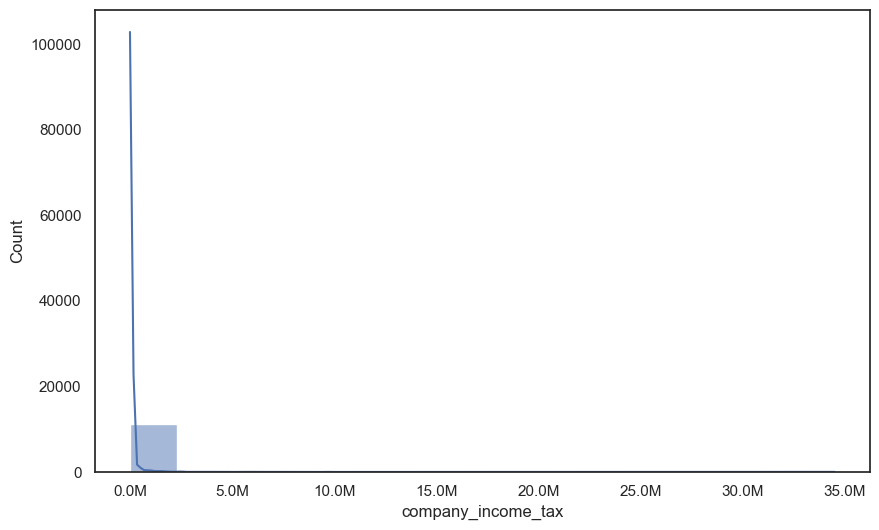

In [161]:
## company income tax distriution

import matplotlib.ticker as ticker

plt.figure(figsize=[10,6])
sns.histplot(df['company_income_tax'], kde=True)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6}M'))
plt.show();

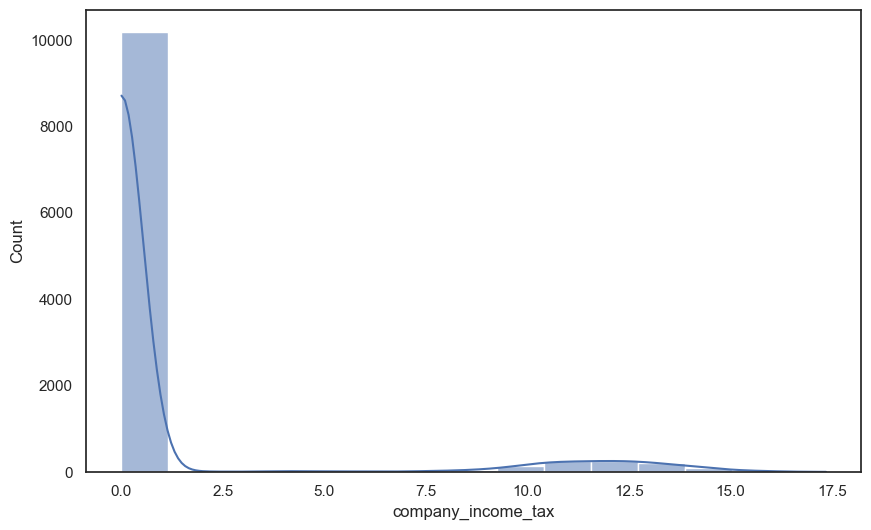

In [162]:
## log transform of company income tax distribution

import matplotlib.ticker as ticker

plt.figure(figsize=[10,6])
sns.histplot(np.log1p(df['company_income_tax']), kde=True)
ax = plt.gca()
# ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6}M'))
plt.show();

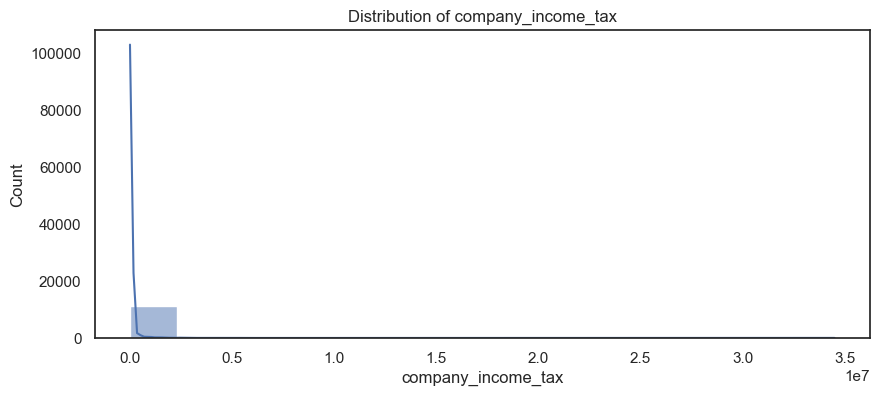

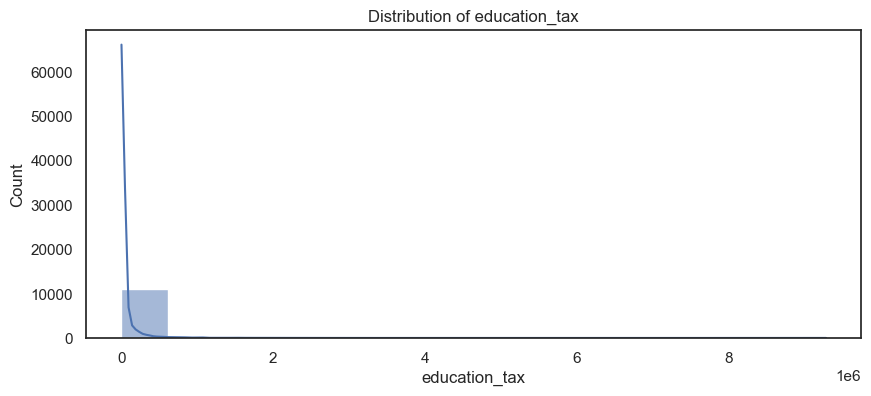

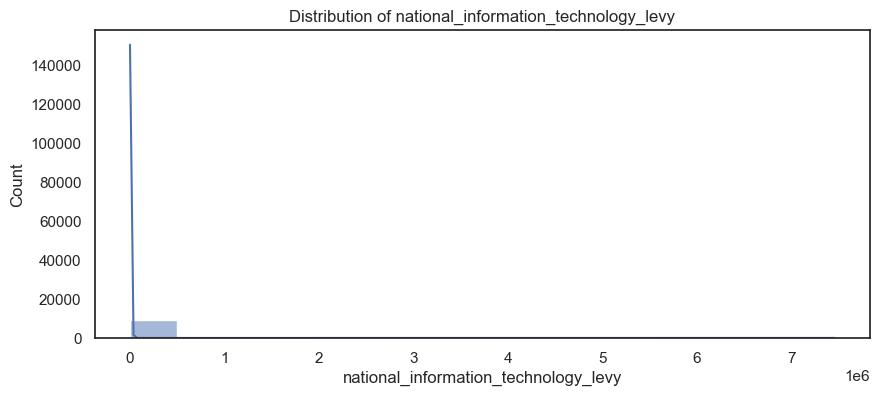

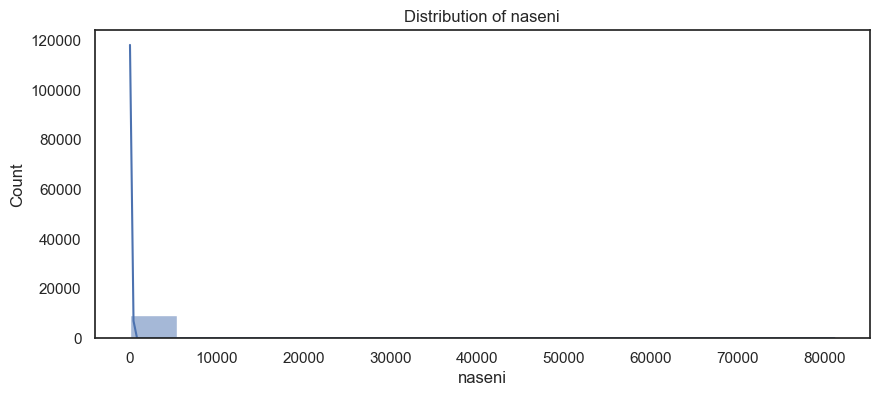

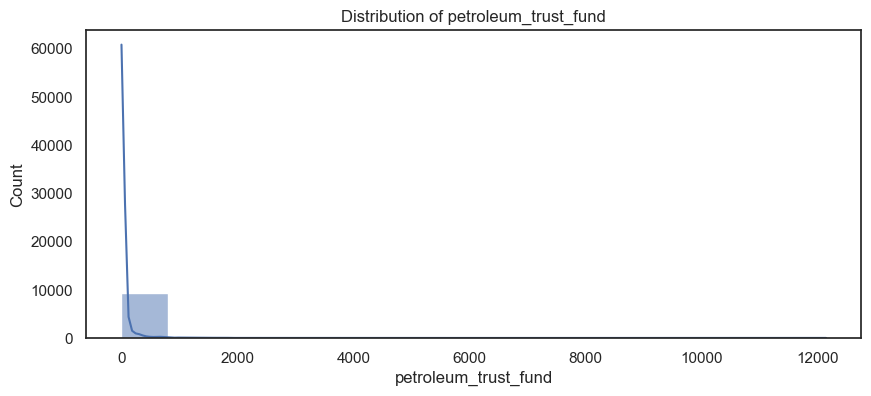

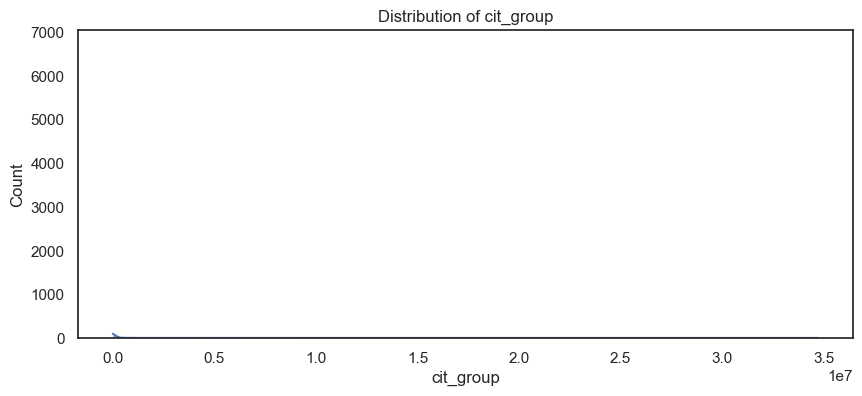

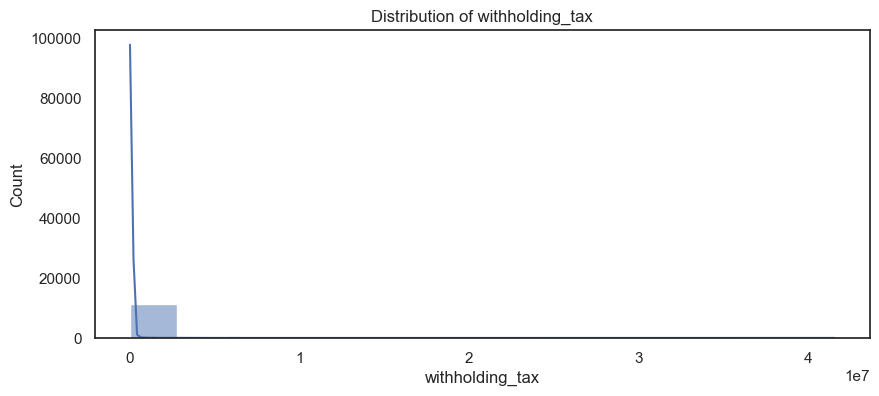

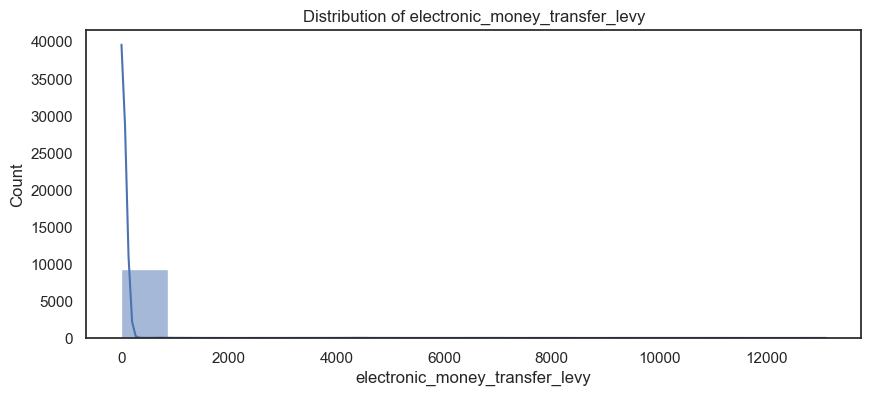

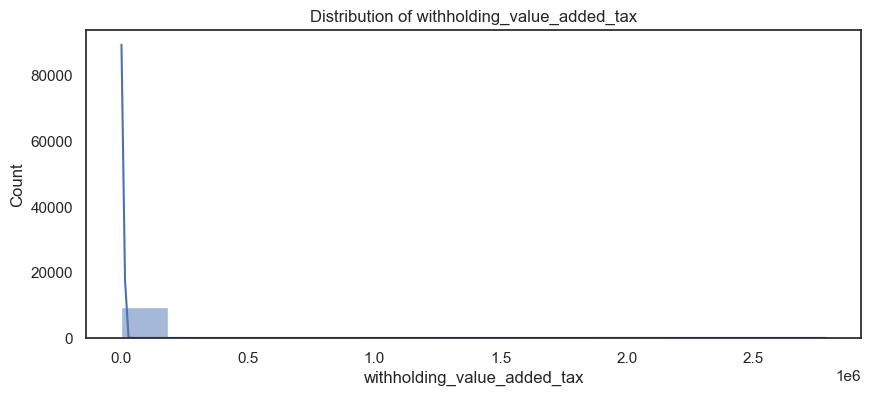

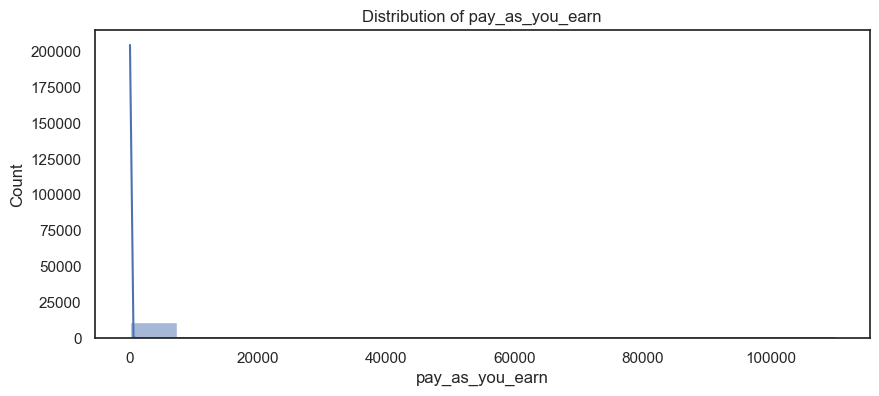

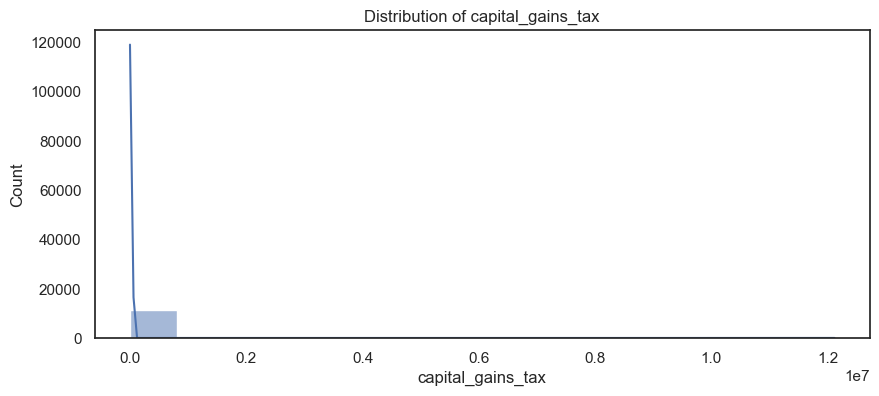

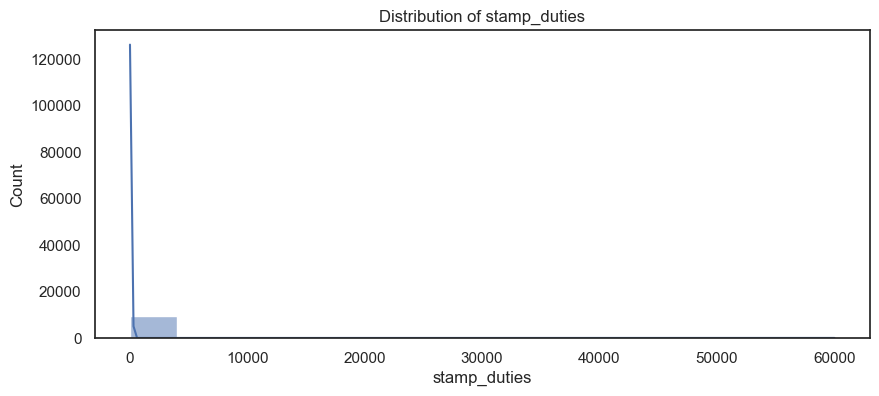

In [51]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=[10,4])
    sns.histplot(df[i], kde=True).set(title='Distribution of {}'.format(i))
    plt.show();

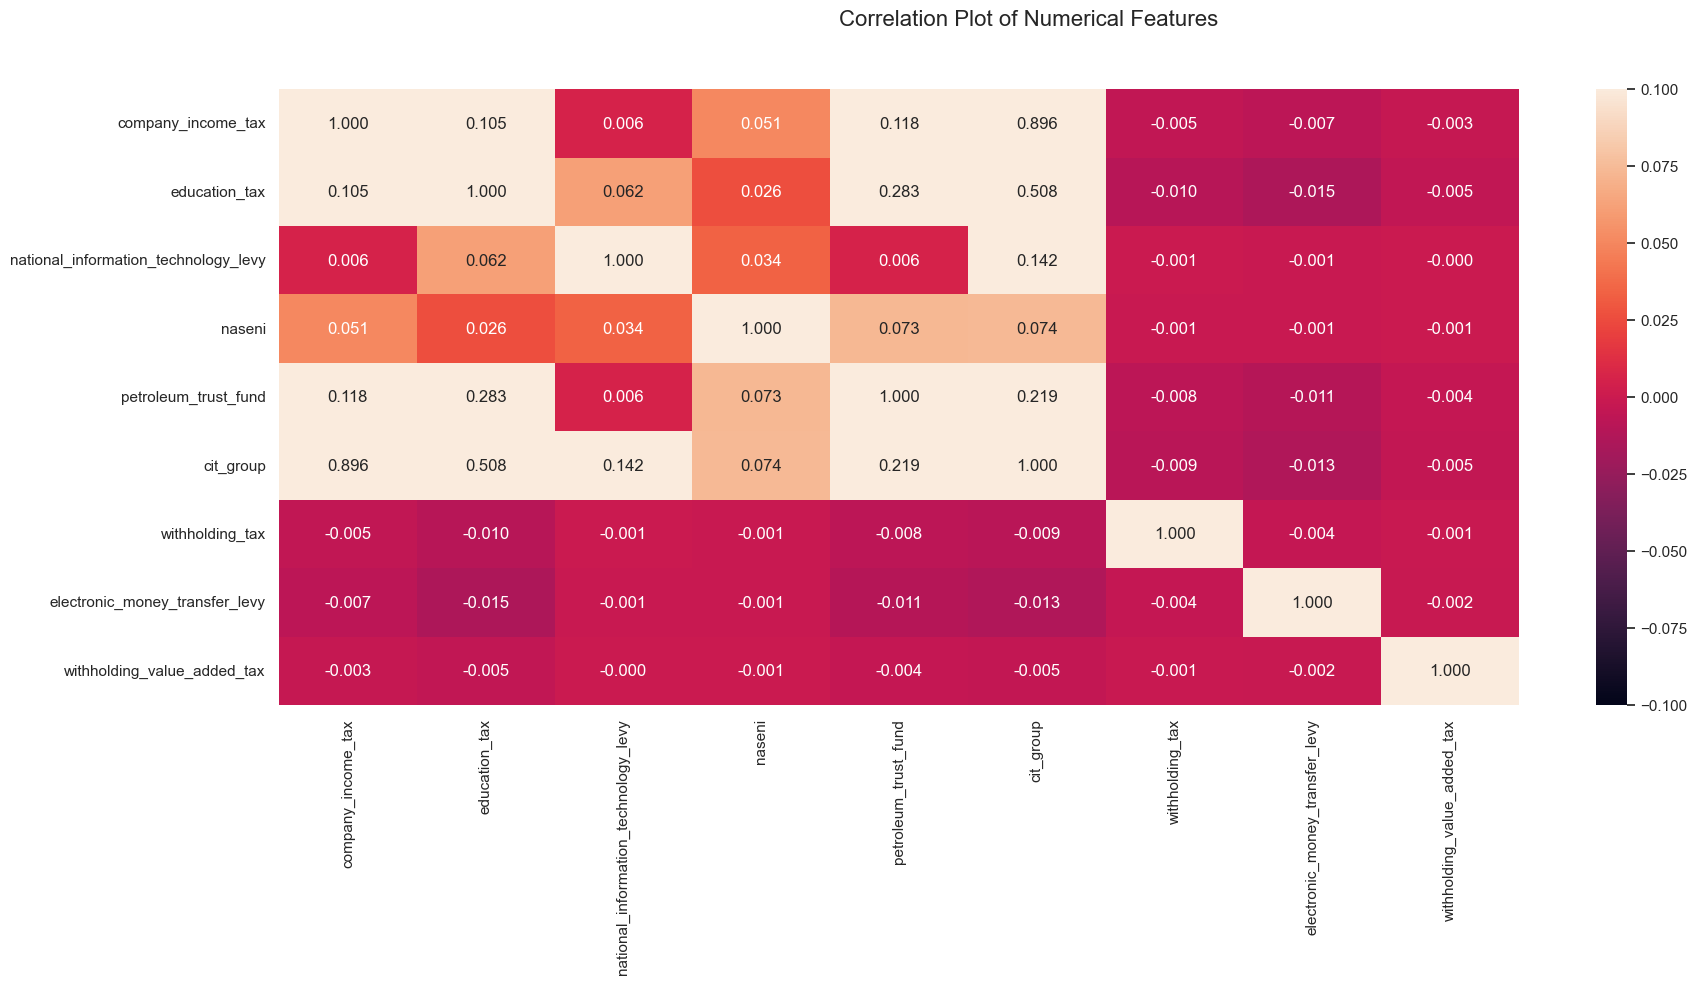

In [163]:
## correlation plot of features

plt.figure(figsize=[20,8])
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.3f', vmin=0, vmax=0)
plt.suptitle('Correlation Plot of Numerical Features', fontsize=16)
plt.savefig('corr_plot.jpg', dpi=300)
plt.show();

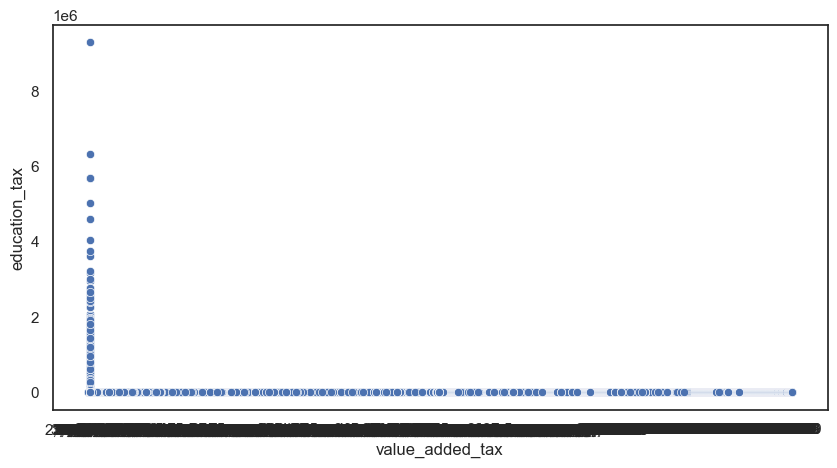

In [72]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=df, x='value_added_tax', y='education_tax');

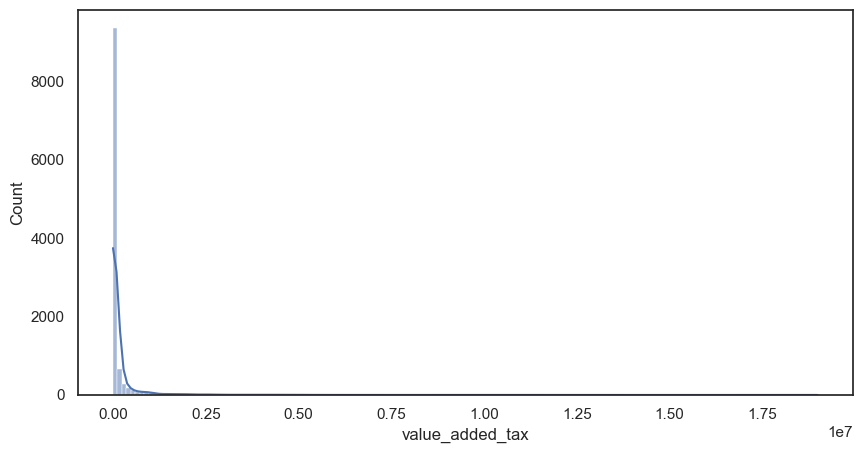

In [164]:
## value added tax distribution plot

plt.figure(figsize=[10,5])
df['value_added_tax'] = df['value_added_tax'].str.replace(',', '').astype(float)
sns.histplot(pd.to_numeric(df['value_added_tax']), kde=True, bins='scott')
plt.show();

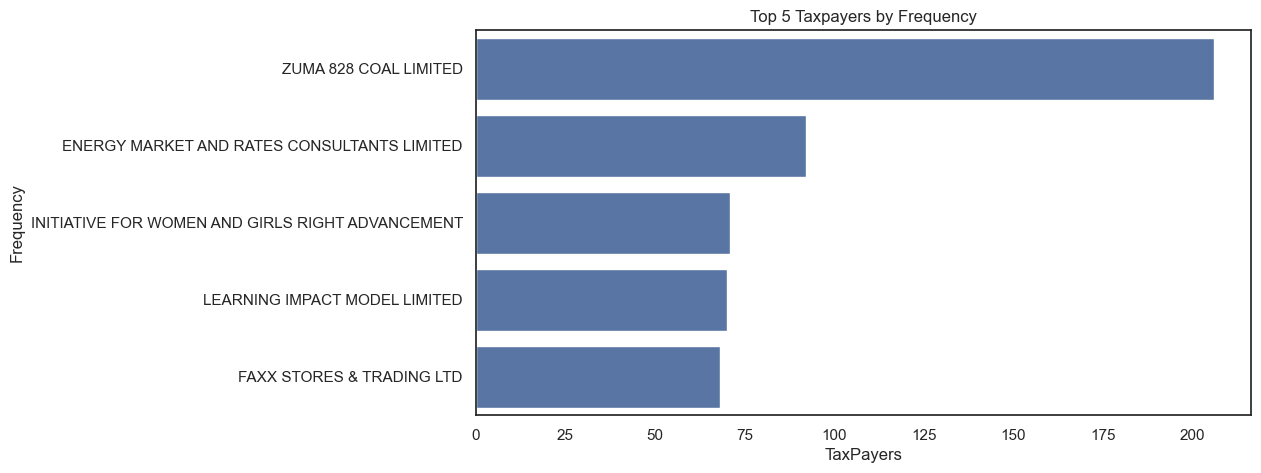

In [170]:
plt.figure(figsize=[10,5])
sns.barplot(data=df['taxpayer'].value_counts().head().reset_index(),
            y='taxpayer',
            x='count'
              ).set(title='Top 5 Taxpayers by Frequency',
                    xlabel='TaxPayers',
                    ylabel='Frequency')
plt.savefig('taxpayer_count.jpg', dpi=300)
plt.show();

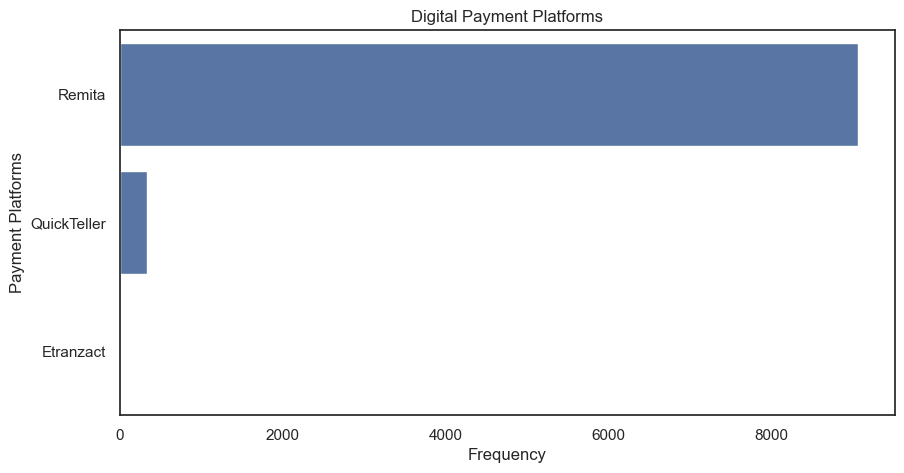

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(df['payment_gateway']).set(title='Digital Payment Platforms',
                                        xlabel='Frequency',
                                        ylabel='Payment Platforms')
plt.savefig('payment_gateway.jpg', dpi=300)
plt.show();

C:\Users\Dell\AppData\Local\Temp\ipykernel_18708\2212598665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pre_2020, x='tax_compliance', palette='viridis')


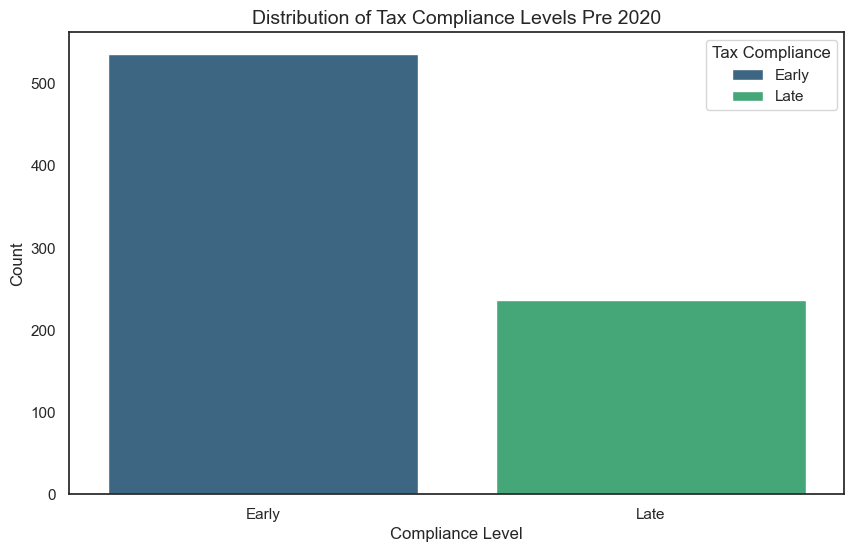

In [52]:
## tax compliance plot of pre 2020
pre_2020 = df[df['payment_date'] < '2020-01-01']

# Plotting the distribution of tax compliance levels
plt.figure(figsize=(10, 6))
sns.countplot(data=pre_2020, x='tax_compliance', palette='viridis')
plt.title('Distribution of Tax Compliance Levels Pre 2020', fontsize=14)
plt.xlabel('Compliance Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.show();

C:\Users\Dell\AppData\Local\Temp\ipykernel_18708\2381291597.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=post_2020, x='tax_compliance', palette='viridis')


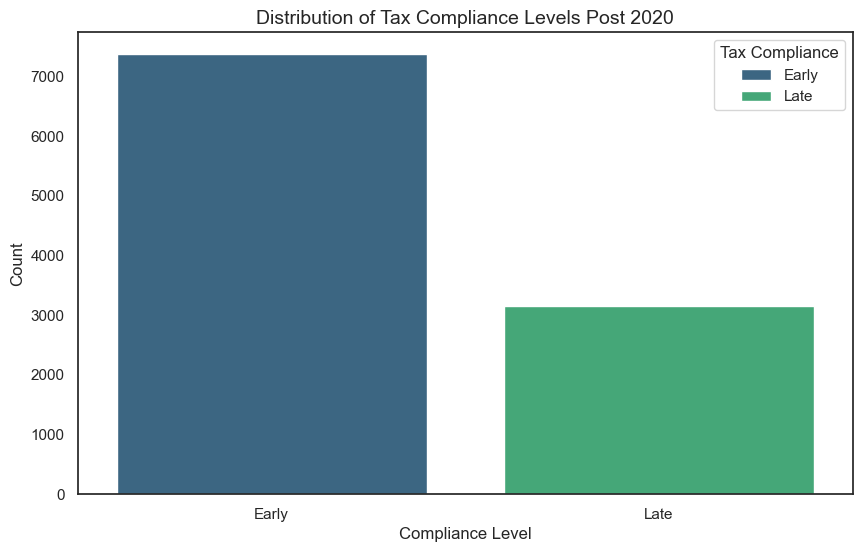

In [53]:
## tax compliance plot of post 2020
post_2020 = df[df['payment_date'] >= '2020-01-01']

# Plotting the distribution of tax compliance levels
plt.figure(figsize=(10, 6))
sns.countplot(data=post_2020, x='tax_compliance', palette='viridis')
plt.title('Distribution of Tax Compliance Levels Post 2020', fontsize=14)
plt.xlabel('Compliance Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.show();

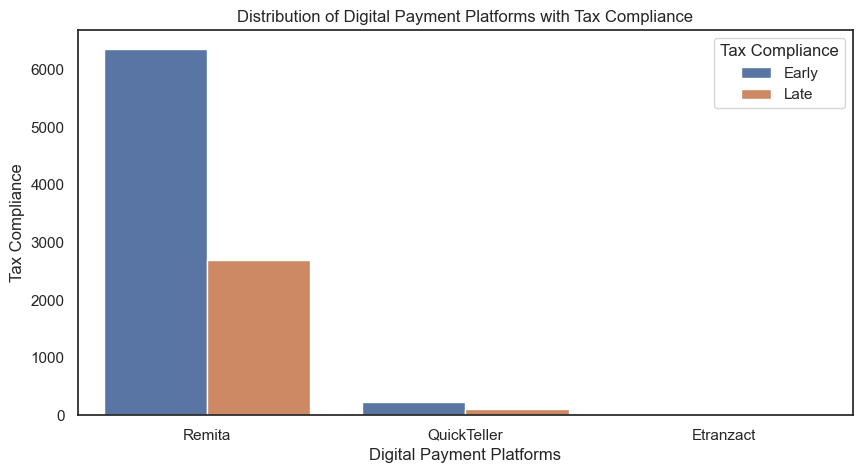

In [54]:
plt.figure(figsize=[10, 5])
sns.countplot(data=df, x='payment_gateway', hue='tax_compliance').set(
    title='Distribution of Digital Payment Platforms with Tax Compliance',
    xlabel='Digital Payment Platforms',
    ylabel='Tax Compliance'
)

plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.savefig('digital_compliance.jpg', dpi=300)
plt.show();

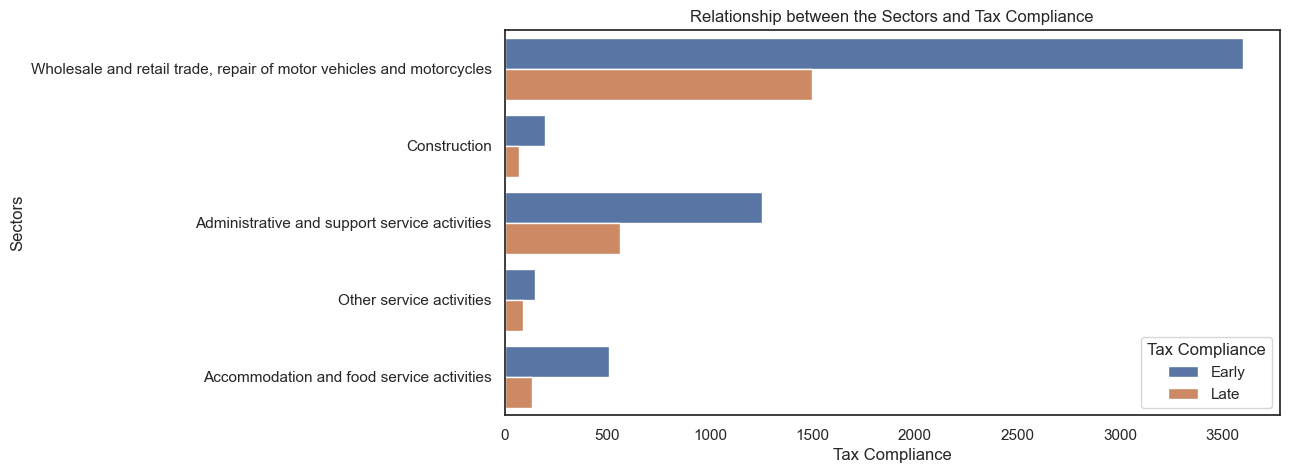

In [55]:
# Identify the top 5 sectors
top_5_sectors = df['sector'].value_counts().head(5).index
df_top_5_sectors = df[df['sector'].isin(top_5_sectors)]

plt.figure(figsize=[10, 5])
sns.countplot(data=df_top_5_sectors, y='sector', hue='tax_compliance')
plt.title('Relationship between the Sectors and Tax Compliance')
plt.xlabel('Tax Compliance')
plt.ylabel('Sectors')
plt.legend(title='Tax Compliance', labels=['Early', 'Late'])
plt.savefig('sector_compliance.jpg', dpi=300)
plt.show();

C:\Users\Dell\AppData\Local\Temp\ipykernel_18708\1324285272.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(df['tax_compliance'].value_counts().index,


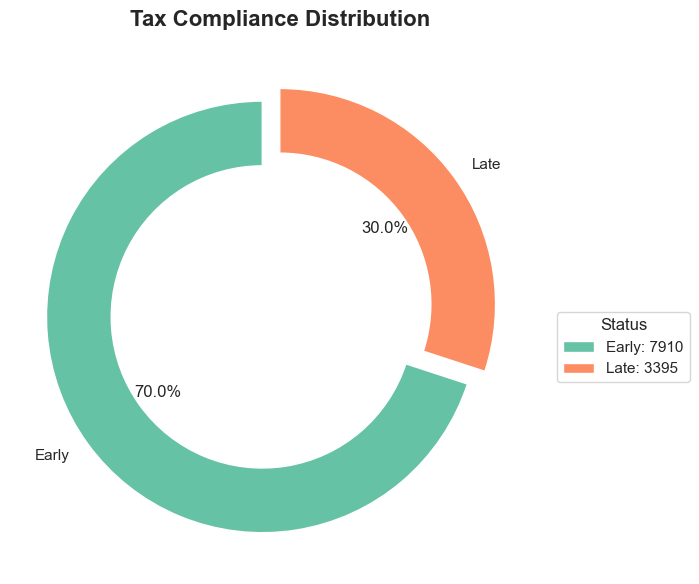

In [56]:
# Plotting
plt.figure(figsize=(8, 6))
explode = [0.1, 0]
plt.pie(df['tax_compliance'].value_counts(), labels=df['tax_compliance'].value_counts().index, autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5', '#fc8d62'], wedgeprops=dict(width=0.3), explode=explode)
plt.title('Tax Compliance Distribution', fontsize=16, fontweight='bold')

# Legend with value counts
plt.legend(df['tax_compliance'].value_counts().index,
           title='Status', loc='best', bbox_to_anchor=(1, 0.5),
           labels=[f"{x}: {y}" for x, y in df['tax_compliance'].value_counts().items()])
plt.tight_layout()
plt.show();

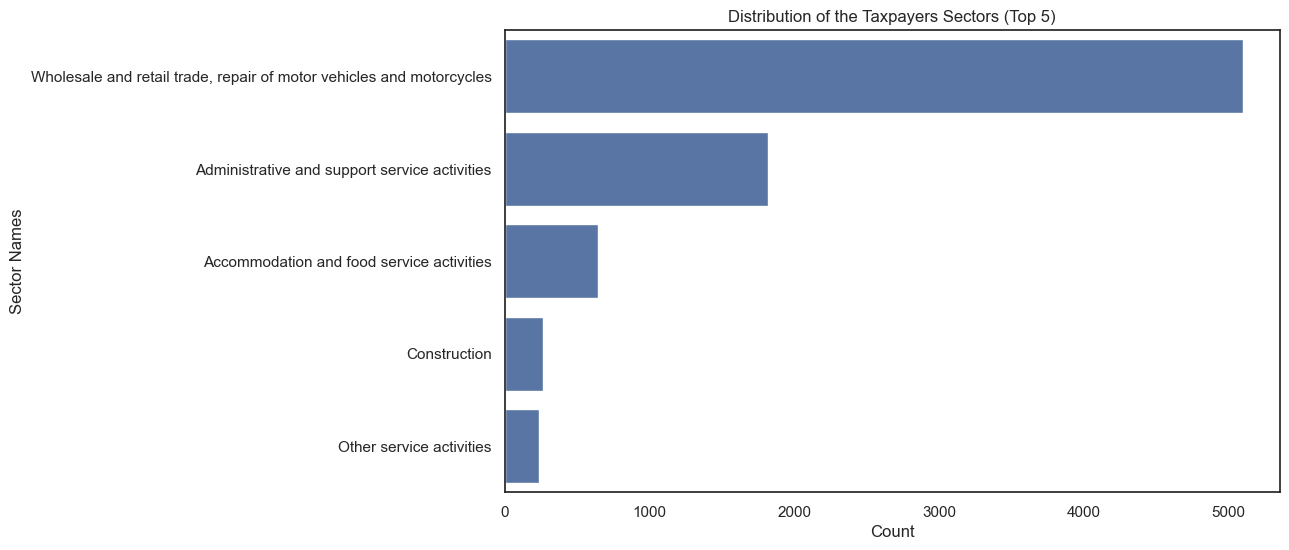

In [80]:
plt.figure(figsize=[10,6])
sns.barplot(x=df['sector'].value_counts().head().values, y=df['sector'].value_counts().head().index)
plt.title('Distribution of the Taxpayers Sectors (Top 5)')
plt.xlabel('Count')
plt.ylabel('Sector Names')
plt.savefig('sector_dist.jpg', dpi=500)
plt.show();

# Model Training

In [57]:
# Importing required libraries for model development
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (accuracy_score, f1_score, fbeta_score, recall_score, precision_score,
                            classification_report, roc_auc_score, confusion_matrix, auc, roc_curve, make_scorer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Tuning the machine learning model
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, rand  # Hyperopt for hyperparameter optimization
import logging  # Logging for tracking events that happen when some software runs
from typing import Dict, Union, Any, Tuple  # Typing for type hints
import random  # Random for generating random numbers
import sys  # Sys for system-specific parameters and functions
from tqdm import tqdm  # Tqdm for progress bar visualization

import shap  # SHAP for model interpretability
import warnings; warnings.filterwarnings(action='ignore')  # Ignore warnings to keep the output clean

In [58]:
# Encode target column
target_encoder = LabelEncoder()
df['tax_compliance'] = target_encoder.fit_transform(df['tax_compliance'])

In [59]:
# creating features X
X = df.drop(['filing_date', 'payment_date', 'tax_compliance',
             'vat_compliance', 'cit_compliance'], axis=1)
y = df['tax_compliance']

In [60]:
from category_encoders import TargetEncoder

# creating pipeline

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['O', 'category']).columns

numerical_cols = X.select_dtypes(include=np.number).columns

# Create preprocessors for each type of column
categorical_transformer = TargetEncoder(cols=categorical_cols)
numerical_transformer = StandardScaler()

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform
X_transformed = pipeline.fit_transform(X, y)
X_transformed = pd.DataFrame(X_transformed, columns=list(categorical_cols) + list(numerical_cols))
X_transformed.tail()

,taxpayer,payment_gateway,office,state,region,segment,department,sector,value_added_tax,pay_as_you_earn,capital_gains_tax,stamp_duties,company_income_tax,education_tax,national_information_technology_levy,naseni,petroleum_trust_fund,cit_group,withholding_tax,electronic_money_transfer_levy,withholding_value_added_tax
11300,0.255410,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.391345,0.300159,0.300133,0.309586,-0.089673,-0.183514,NaN,NaN,NaN,NaN,-0.052385,NaN,NaN
11301,0.235159,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.391345,0.300159,0.300133,0.309586,-0.089673,-0.183514,NaN,NaN,NaN,NaN,-0.052385,NaN,NaN
11302,0.391345,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.391345,0.300159,0.300133,0.309586,-0.089673,-0.183514,NaN,NaN,NaN,NaN,-0.052385,NaN,NaN
11303,0.391345,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.399561,0.300159,0.300133,0.309586,-0.089673,-0.183514,NaN,NaN,NaN,NaN,-0.052385,NaN,NaN
11304,0.328636,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.309586,0.391345,0.300159,0.300133,0.309586,-0.089673,-0.183514,NaN,NaN,NaN,NaN,-0.052385,NaN,NaN


In [61]:
y.value_counts()

tax_compliance
0    7910
1    3395
Name: count, dtype: int64

In [62]:
# split dataset into train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=.25, stratify=y, random_state=101)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8478, 21) (8478,) (2827, 21) (2827,)


## Decision Tree Classifier Model

In [63]:
# Instantiate the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
# X_train: training features
# y_train: training labels
dt_model.fit(X_train, y_train)

# Predict the labels for the test data
# X_test: test features
y_pred_dt = dt_model.predict(X_test)

In [81]:
# Perform cross-validation on the data using the DecisionTreeClassifier model
# cross_val_score: Evaluate a score by cross-validation
# dt_model: the model to be evaluated
# X_train: training features
# y_train: training labels
# cv: cross-validation splitting strategy (StratifiedKFold in this case)
# scoring: scoring metric (ROC-AUC in this case)
scores_dt = cross_val_score(dt_model,
                            X_train,
                            y_train,
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),
                            scoring=make_scorer(roc_auc_score))

# Print the cross-validation scores
print("Cross-validation scores:", scores_dt)

# Print the mean accuracy (mean of the cross-validation scores)
print("Mean accuracy:", scores_dt.mean())

# Print the standard deviation of the cross-validation scores
print("Standard deviation:", scores_dt.std())

Cross-validation scores: [0.77248863 0.77094357 0.79966439 0.77117616 0.78955363]
Mean accuracy: 0.7807652776322312
Standard deviation: 0.011758667391326413


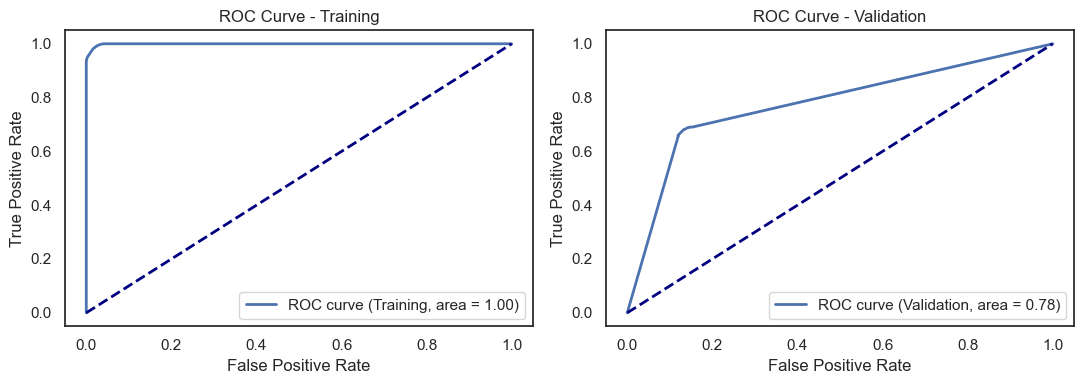

In [82]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(dt_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(dt_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [64]:
# Evaluation Metrics

print('------------------------ Model Evaluation Metrics Scores for DecisionTreeClassifier Algorithm------------------------')
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_dt, beta=1.5):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

------------------------ Model Evaluation Metrics Scores for DecisionTreeClassifier Algorithm------------------------
Accuracy: 0.8125
Precision: 0.7022
Recall: 0.6525
F1-score: 0.6764
F-beta score: 0.6670
ROC-AUC: 0.7737
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1978
           1       0.70      0.65      0.68       849

    accuracy                           0.81      2827
   macro avg       0.78      0.77      0.77      2827
weighted avg       0.81      0.81      0.81      2827

Confusion Matrix:
 [[1743  235]
 [ 295  554]]


## Random Forest Algorithm

In [65]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [66]:
# Lets's perform Cross-validation on the data

scores_rf = cross_val_score(rf_model,
                         X_train,
                         y_train,
                         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),
                         scoring=make_scorer(roc_auc_score))
print("Cross-validation scores:", scores_rf)
print("Mean accuracy:", scores_rf.mean())
print("Standard deviation:", scores_rf.std())

Cross-validation scores: [0.77740519 0.77964623 0.80039017 0.79925009 0.79743289]
Mean accuracy: 0.7908249147985543
Standard deviation: 0.010111330199523769


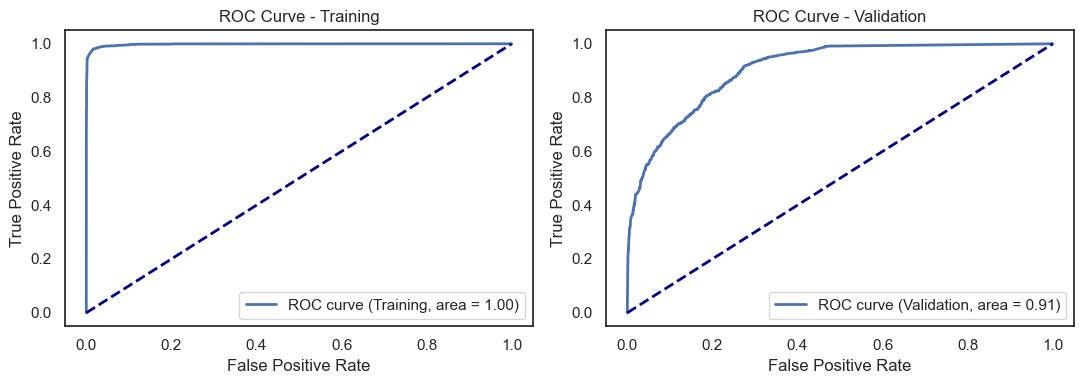

In [67]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(rf_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(rf_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [68]:
# Evaluation Metrics

print('------------------------ Model Evaluation Metrics Scores for RandomForestClassifier Algorithm------------------------')
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_rf, beta=1.5):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

------------------------ Model Evaluation Metrics Scores for RandomForestClassifier Algorithm------------------------
Accuracy: 0.8299
Precision: 0.7408
Recall: 0.6667
F1-score: 0.7018
F-beta score: 0.6879
ROC-AUC: 0.9059
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1978
           1       0.74      0.67      0.70       849

    accuracy                           0.83      2827
   macro avg       0.80      0.78      0.79      2827
weighted avg       0.83      0.83      0.83      2827

Confusion Matrix:
 [[1780  198]
 [ 283  566]]


## XGBoost Algorithm

## Default Model

In [69]:
X_train.isnull().sum().sum()

8526

In [70]:
# Instantiate the XGBoost classifier
# missing=np.nan: Handle missing values as NaN
default_model = xgb.XGBClassifier(missing=np.nan)

# Fit the model to the training data
# X_train: training features
# y_train: training labels
# eval_set: list containing a tuple of the validation data (X_test, y_test) used for early stopping
# early_stopping_rounds: stop training if the validation score doesn't improve for 10 consecutive rounds
default_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)

# Predict the labels for the test data
# X_test: test features
y_pred_default = default_model.predict(X_test)

[0]	validation_0-logloss:0.48269
[1]	validation_0-logloss:0.41857
[2]	validation_0-logloss:0.38080
[3]	validation_0-logloss:0.35544
[4]	validation_0-logloss:0.33955
[5]	validation_0-logloss:0.32690
[6]	validation_0-logloss:0.31715


[7]	validation_0-logloss:0.31106
[8]	validation_0-logloss:0.30775
[9]	validation_0-logloss:0.30428
[10]	validation_0-logloss:0.30212
[11]	validation_0-logloss:0.29976
[12]	validation_0-logloss:0.29863
[13]	validation_0-logloss:0.29833
[14]	validation_0-logloss:0.29776
[15]	validation_0-logloss:0.29729
[16]	validation_0-logloss:0.29623
[17]	validation_0-logloss:0.29626
[18]	validation_0-logloss:0.29647
[19]	validation_0-logloss:0.29568
[20]	validation_0-logloss:0.29560
[21]	validation_0-logloss:0.29530
[22]	validation_0-logloss:0.29511
[23]	validation_0-logloss:0.29524
[24]	validation_0-logloss:0.29638
[25]	validation_0-logloss:0.29597
[26]	validation_0-logloss:0.29663
[27]	validation_0-logloss:0.29749
[28]	validation_0-logloss:0.29771
[29]	validation_0-logloss:0.29835
[30]	validation_0-logloss:0.29930
[31]	validation_0-logloss:0.29910


In [71]:
# Evaluation Metrics

print('------------------------ Model Evaluation Metrics Scores for Default XGBoost Algorithm------------------------')
print(f"Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_default):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_default):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_default):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_default, beta=3):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, default_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))

------------------------ Model Evaluation Metrics Scores for Default XGBoost Algorithm------------------------
Accuracy: 0.8486
Precision: 0.7895
Recall: 0.6761
F1-score: 0.7284
F-beta score: 0.6859
ROC-AUC: 0.9291
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      1978
           1       0.79      0.68      0.73       849

    accuracy                           0.85      2827
   macro avg       0.83      0.80      0.81      2827
weighted avg       0.85      0.85      0.85      2827

Confusion Matrix:
 [[1825  153]
 [ 275  574]]


Selecting the Right Beta: The ideal beta value will depend on the specific costs associated with false positives and false negatives in the tax compliance context. <br>

β = 1: Equivalent to the F1 score (equal weight to precision and recall). <br>
β > 1: Puts more emphasis on recall (minimizing false negatives). <br>
β < 1: Puts more emphasis on precision (minimizing false positives). <br>

If failing to identify a late payment is very costly (e.g., leading to missed deadlines, penalties), then a higher beta (e.g., β = 3) might be appropriate. <br>

If incorrectly flagging an early payment as late is costly (e.g., causing unnecessary investigations), then a lower beta (e.g., β = 1.5) might be better. <br>

In [94]:
# Lets's perform Cross-validation on the data

scores_default = cross_val_score(default_model,
                         X_train,
                         y_train,
                         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),
                         scoring=make_scorer(roc_auc_score))
print("Cross-validation scores:", scores_default)
print("Mean accuracy:", scores_default.mean())
print("Standard deviation:", scores_default.std())

Cross-validation scores: [0.78021725 0.79003547 0.79340013 0.81160693 0.81134105]
Mean accuracy: 0.7973201657900673
Standard deviation: 0.012342123404167385


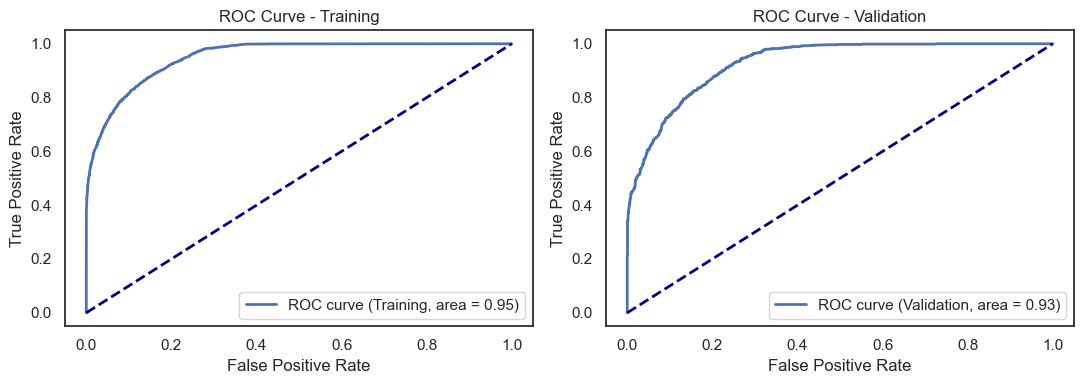

In [95]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(default_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(default_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [96]:
# save default model
import joblib;joblib.dump(default_model, 'default_xgboost_model.joblib')

['default_xgboost_model.joblib']

## Tuned Model

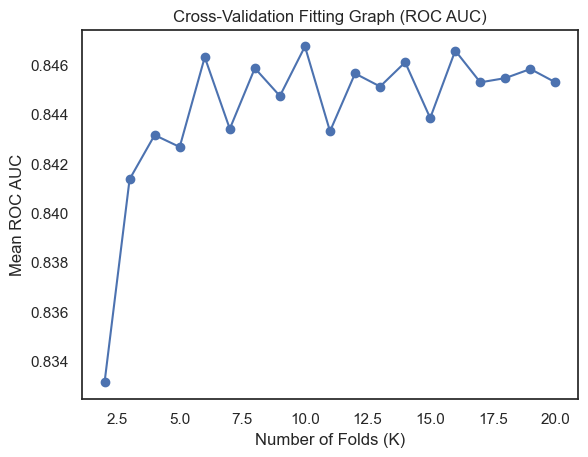

Best K value based on ROC AUC: 10


In [108]:
# Function to find the optimal number of cross-validation folds (k)
def find_optimal_k(X, y, k_range, model):
    # Calculate mean ROC AUC scores for different values of k
    scores = [
        np.mean(cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=k, shuffle=True, random_state=101), scoring='roc_auc'))
        for k in k_range
    ]
    # Find the best k and corresponding score
    best_k, best_score = k_range[np.argmax(scores)], np.max(scores)
    return best_k, best_score, scores

# Range of k values to test
k_range = range(2, 21)

# Default parameters for the XGBoost classifier
def_params = {
    'eval_metric': 'auc',  # Evaluation metric
    'objective': 'binary:logistic',  # Objective function
    'random_state': 101,  # Random seed for reproducibility
    'missing': np.nan  # Handle missing values as NaN
}

# Instantiate the XGBoost classifier with default parameters
model = xgb.XGBClassifier(**def_params)

# Find the optimal k value for cross-validation
best_k, best_score, all_scores = find_optimal_k(X_train, y_train, k_range, model)

# Plot the mean ROC AUC scores for different k values
plt.plot(k_range, all_scores, marker='o')
plt.title('Cross-Validation Fitting Graph (ROC AUC)')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean ROC AUC')
plt.show()

# Print the best k value based on ROC AUC
print("Best K value based on ROC AUC:", best_k)

In [111]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_ratio = class_weights[0] / class_weights[1]

print("Ratio of negative to positive samples in training data:", class_ratio)

Ratio of negative to positive samples in training data: 0.42919757248819956


In [112]:
# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# ----------------------------------------------------------------------------------------------------------------------------------------------------- #
class ClassifierObjective:
    def __init__(self, dtrain, const_params, fold_count=best_k, have_gpu=False):
        self._dtrain = dtrain
        self._const_params = const_params.copy()
        self._fold_count = fold_count
        self._have_gpu = have_gpu
        self._evaluated_count = 0

    def _to_xgb_params(self, hyper_params):
        return {
            'n_estimators': int(hyper_params['n_estimators']),
            'max_depth': int(hyper_params['max_depth']),
            'learning_rate': hyper_params['learning_rate'],
            'subsample': hyper_params['subsample'],
            'colsample_bytree': hyper_params['colsample_bytree'],
            'gamma': int(hyper_params['gamma']),
            'min_child_weight': int(hyper_params['min_child_weight']),
            'reg_lambda': hyper_params['reg_lambda'],
            'reg_alpha': hyper_params['reg_alpha'],
            'scale_pos_weight': hyper_params['scale_pos_weight'],
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'tree_method': 'gpu_hist' if self._have_gpu else 'hist',
            'seed': 101,
        }

    def __call__(self, hyper_params):
        params = self._to_xgb_params(hyper_params)
        params.update(self._const_params)
        params['tree_method'] = 'gpu_hist' if self._have_gpu else 'hist'

        logger.info(f'Evaluating params={params}')

        mean_aucs = []

        with tqdm(total=self._fold_count) as pbar:
            for _ in range(self._fold_count):
                cv_result = xgb.cv(
                    params=params,
                    dtrain=self._dtrain,
                    nfold=self._fold_count,
                    seed=101,
                    metrics='auc',
                    maximize=True,
                    stratified=True
                )
                mean_aucs.append(cv_result['test-auc-mean'].max())
                pbar.update()

        max_mean_auc = np.mean(mean_aucs)
        logger.info(f'Evaluated mean score={max_mean_auc}')

        self._evaluated_count += 1
        logger.info(f'Evaluated {self._evaluated_count} times')

        return {'loss': -max_mean_auc, 'status': STATUS_OK}

# ----------------------------------------------------------------------------------------------------------------------------------------------------- #

options = {
        'n_estimators': hp.quniform('n_estimators', 100, 2500, 50),
        'max_depth': hp.quniform('max_depth', 3, 12, 1),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.1)),
        'subsample': hp.uniform('subsample', 0.4, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
        'gamma': hp.quniform('gamma', 0, 20, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 300, 1),
        'reg_lambda': hp.loguniform('reg_lambda', np.log(1e-3), np.log(10.0)),
        'reg_alpha': hp.loguniform('reg_alpha', np.log(1e-3), np.log(10.0))
    }

int_vals = ['max_depth', 'n_estimators', 'min_child_weight', 'gamma']

space = {k: (int(val) if isinstance(val, (int, float)) and k in int_vals else val)
             for k, val in options.items()}

# ----------------------------------------------------------------------------------------------------------------------------------------------------- #
def optimize_hyperparameters(space: Dict[str, Union[float, int]],
                             dtrain, const_params, num_folds, have_gpu,
                             max_evals=100, skf_seed=101):

    # constant parameters
    const_params = {
            'tree_method': 'gpu_hist' if have_gpu else 'hist',
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'seed': skf_seed,
    }

    np.random.seed(seed=101)

    # Calculate class ratio
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_ratio = class_weights[0] / class_weights[1]

    # Update the options dictionary
    space['scale_pos_weight'] = hp.uniform('scale_pos_weight', class_ratio * 0.8, class_ratio * 1.2)
    # space['scale_pos_weight'] = hp.loguniform('scale_pos_weight', np.log(class_ratio * 0.8), np.log(class_ratio * 1.2))

    objective = ClassifierObjective(dtrain=dtrain, const_params=const_params, fold_count=num_folds, have_gpu=have_gpu)
    trials = Trials()

    best = fmin(fn=lambda space: objective(space),
                space=options,
                algo=tpe.suggest,
                max_evals=max_evals,
                rstate=np.random.seed(seed=skf_seed))

    return best

# ----------------------------------------------------------------------------------------------------------------------------------------------------- #
def train_model(X: pd.DataFrame, y: pd.Series, const_params: Dict[str, Any],
                max_evals: int = 100, use_default: bool = False) -> Tuple[xgb.Booster, Dict[str, Any]]:
    # Create DMatrix for training and validation
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_test, label=y_test)

    if use_default:
        hyper_params = const_params # Use default hyperparameters
    else:
        # Find best hyperparameters
        best = optimize_hyperparameters(space=options, dtrain=dtrain, const_params=const_params, 
                                        num_folds=best_k, have_gpu=False, max_evals=max_evals)
        hyper_params = best.copy()
        hyper_params.update(const_params)

        hyper_params['n_estimators'] = int(hyper_params['n_estimators'])
        hyper_params['max_depth'] = int(hyper_params['max_depth'])
        hyper_params['min_child_weight'] = int(hyper_params['min_child_weight'])
        hyper_params['gamma'] = int(hyper_params['gamma'])

        logger.info("\n\nThe Best Hyperparameters: %s", hyper_params)

    model = xgb.train(hyper_params, dtrain, evals=[(dval, 'validation')])

    return model, hyper_params

# ----------------------------------------------------------------------------------------------------------------------------------------------------- #
# Set GPU usage and hyperparameter optimization iterations
have_gpu = False
hyperopt_iterations = 100

# constant parameters
const_params = {
        'tree_method': 'gpu_hist' if have_gpu else 'hist',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'seed': 101,
}

# DMatrix for training
dtrain = xgb.DMatrix(X_train, y_train)

# hyperparameter tuning
best_hyperparams = optimize_hyperparameters(space=options,
                                            dtrain=dtrain,
                                            const_params=const_params,
                                            num_folds=best_k,
                                            have_gpu=have_gpu,
                                            max_evals=hyperopt_iterations,
                                            skf_seed=101)

best_model, best_hyperparams = train_model(X_train, y_train, const_params, max_evals=hyperopt_iterations, use_default=False)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.292827 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:__main__:Evaluating params={'n_estimators': 700, 'max_depth': 8, 'learning_rate': 0.010902537938473277, 'subsample': 0.7336287687261697, 'colsample_bytree': 0.833733618956217, 'gamma': 17, 'min_child_weight': 128, 'reg_lambda': 0.001858585645801688, 'reg_alpha': 0.011704802616870884, 'scale_pos_weight': 0.44549826434810585, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.33it/s]
INFO:__main__:Evaluated mean score=0.8295454329607004
INFO:__main__:Evaluated 1 times


  1%|          | 1/100 [00:04<07:35,  4.60s/trial, best loss: -0.8295454329607004]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009020 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.829545
INFO:__main__:Evaluating params={'n_estimators': 1150, 'max_depth': 9, 'learning_rate': 0.001508635852968716, 'subsample': 0.5634362001137876, 'colsample_bytree': 0.7456290047340439, 'gamma': 15, 'min_child_weight': 173, 'reg_lambda': 0.0040471117654957865, 'reg_alpha': 1.1675097097864364, 'scale_pos_weight': 0.4063149974674031, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.48it/s]
INFO:__main__:Evaluated mean score=0.7952594444647341
INFO:__main__:Evaluated 2 times


  2%|▏         | 2/100 [00:08<06:59,  4.29s/trial, best loss: -0.8295454329607004]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006016 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.829545
INFO:__main__:Evaluating params={'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.00477470149023548, 'subsample': 0.873631654129096, 'colsample_bytree': 0.7935978118895357, 'gamma': 17, 'min_child_weight': 250, 'reg_lambda': 0.06635531273374737, 'reg_alpha': 0.002370660476250533, 'scale_pos_weight': 0.4493425942144571, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.70it/s]
INFO:__main__:Evaluated mean score=0.8059526636703005
INFO:__main__:Evaluated 3 times


  3%|▎         | 3/100 [00:12<06:31,  4.04s/trial, best loss: -0.8295454329607004]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009111 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.829545
INFO:__main__:Evaluating params={'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.00386655291256485, 'subsample': 0.6848705882366255, 'colsample_bytree': 0.7695877978585298, 'gamma': 3, 'min_child_weight': 106, 'reg_lambda': 1.2743983495000424, 'reg_alpha': 0.025710167434938987, 'scale_pos_weight': 0.4514610728125453, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.52it/s]
INFO:__main__:Evaluated mean score=0.8367158858496582
INFO:__main__:Evaluated 4 times


  4%|▍         | 4/100 [00:16<06:25,  4.02s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004073 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 2350, 'max_depth': 4, 'learning_rate': 0.0020875253978455345, 'subsample': 0.8269631558689505, 'colsample_bytree': 0.9421827639384646, 'gamma': 8, 'min_child_weight': 229, 'reg_lambda': 0.007392090154340046, 'reg_alpha': 0.829660342296157, 'scale_pos_weight': 0.3582546230550449, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.76it/s]
INFO:__main__:Evaluated mean score=0.7926997447034438
INFO:__main__:Evaluated 5 times


  5%|▌         | 5/100 [00:20<06:08,  3.88s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013263 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 2100, 'max_depth': 9, 'learning_rate': 0.006740991893598889, 'subsample': 0.8051239040126752, 'colsample_bytree': 0.5645691011441633, 'gamma': 9, 'min_child_weight': 133, 'reg_lambda': 0.007430024809798933, 'reg_alpha': 0.10266649253223806, 'scale_pos_weight': 0.46616466489849206, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.87it/s]
INFO:__main__:Evaluated mean score=0.8246412029369289
INFO:__main__:Evaluated 6 times


  6%|▌         | 6/100 [00:23<05:52,  3.75s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007995 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 2050, 'max_depth': 4, 'learning_rate': 0.0178249565995074, 'subsample': 0.6628395694559461, 'colsample_bytree': 0.5778406503958217, 'gamma': 20, 'min_child_weight': 281, 'reg_lambda': 0.24001878854053516, 'reg_alpha': 0.012208072878533973, 'scale_pos_weight': 0.41510126686422416, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.74it/s]
INFO:__main__:Evaluated mean score=0.7892943882855559
INFO:__main__:Evaluated 7 times


  7%|▋         | 7/100 [00:27<05:46,  3.73s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007995 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.0047017898728744624, 'subsample': 0.6028227037976233, 'colsample_bytree': 0.4221085490875618, 'gamma': 18, 'min_child_weight': 90, 'reg_lambda': 2.2872274881564425, 'reg_alpha': 1.8203222137890305, 'scale_pos_weight': 0.447850655777393, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.63it/s]
INFO:__main__:Evaluated mean score=0.8186466252638602
INFO:__main__:Evaluated 8 times


  8%|▊         | 8/100 [00:31<05:45,  3.76s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012293 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 1750, 'max_depth': 5, 'learning_rate': 0.005309257435668078, 'subsample': 0.9185582280122904, 'colsample_bytree': 0.779317463724703, 'gamma': 17, 'min_child_weight': 73, 'reg_lambda': 1.4128376128646218, 'reg_alpha': 0.06641756863742553, 'scale_pos_weight': 0.4194478624440375, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.48it/s]
INFO:__main__:Evaluated mean score=0.8307938405180136
INFO:__main__:Evaluated 9 times


  9%|▉         | 9/100 [00:35<05:50,  3.85s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012689 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.067770189119727, 'subsample': 0.9379615284176872, 'colsample_bytree': 0.7916596836721381, 'gamma': 8, 'min_child_weight': 139, 'reg_lambda': 0.008699435563863227, 'reg_alpha': 2.807637201345748, 'scale_pos_weight': 0.43335689967190805, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.11it/s]
INFO:__main__:Evaluated mean score=0.8343364841380698
INFO:__main__:Evaluated 10 times


 10%|█         | 10/100 [00:39<06:11,  4.13s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009062 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 1800, 'max_depth': 11, 'learning_rate': 0.02790845642549705, 'subsample': 0.5161750414387666, 'colsample_bytree': 0.47573835184736163, 'gamma': 19, 'min_child_weight': 26, 'reg_lambda': 0.05472780959418314, 'reg_alpha': 1.4839882738923393, 'scale_pos_weight': 0.4898971420306822, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.53it/s]
INFO:__main__:Evaluated mean score=0.8321195082602992
INFO:__main__:Evaluated 11 times


 11%|█         | 11/100 [00:43<06:03,  4.08s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006504 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 2400, 'max_depth': 7, 'learning_rate': 0.007487842335060821, 'subsample': 0.9522540736946379, 'colsample_bytree': 0.8177529923161206, 'gamma': 19, 'min_child_weight': 162, 'reg_lambda': 0.004985737354460033, 'reg_alpha': 2.0141924208344646, 'scale_pos_weight': 0.3554615671641528, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.94it/s]
INFO:__main__:Evaluated mean score=0.8207804492523836
INFO:__main__:Evaluated 12 times


 12%|█▏        | 12/100 [00:47<05:41,  3.88s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010359 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 550, 'max_depth': 6, 'learning_rate': 0.029504430214132, 'subsample': 0.8652802796552188, 'colsample_bytree': 0.3517876663887248, 'gamma': 8, 'min_child_weight': 100, 'reg_lambda': 0.023541186484094798, 'reg_alpha': 0.14758573658422453, 'scale_pos_weight': 0.47492043563602193, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.88it/s]
INFO:__main__:Evaluated mean score=0.8257615641770073
INFO:__main__:Evaluated 13 times


 13%|█▎        | 13/100 [00:50<05:27,  3.76s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012844 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 1350, 'max_depth': 11, 'learning_rate': 0.0016004837285523766, 'subsample': 0.9997226761184328, 'colsample_bytree': 0.5411723978746906, 'gamma': 12, 'min_child_weight': 157, 'reg_lambda': 0.0022758578298225887, 'reg_alpha': 0.03592570719950409, 'scale_pos_weight': 0.34587292456647456, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.06it/s]
INFO:__main__:Evaluated mean score=0.8187414226440847
INFO:__main__:Evaluated 14 times


 14%|█▍        | 14/100 [00:55<05:52,  4.10s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009321 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 1050, 'max_depth': 5, 'learning_rate': 0.051479663979548486, 'subsample': 0.946823882489181, 'colsample_bytree': 0.8216158974791257, 'gamma': 11, 'min_child_weight': 171, 'reg_lambda': 0.0015235179347751386, 'reg_alpha': 1.2974745137059251, 'scale_pos_weight': 0.5121834624092538, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.11it/s]
INFO:__main__:Evaluated mean score=0.8345170147416363
INFO:__main__:Evaluated 15 times


 15%|█▌        | 15/100 [01:00<06:06,  4.31s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012745 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 1600, 'max_depth': 12, 'learning_rate': 0.02158241240426634, 'subsample': 0.6111871881168371, 'colsample_bytree': 0.729825230595964, 'gamma': 15, 'min_child_weight': 150, 'reg_lambda': 0.04965031883607054, 'reg_alpha': 9.857075009075338, 'scale_pos_weight': 0.3549579465900855, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.15it/s]
INFO:__main__:Evaluated mean score=0.7959565044284486
INFO:__main__:Evaluated 16 times


 16%|█▌        | 16/100 [01:05<06:11,  4.42s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009176 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.0034783310451750034, 'subsample': 0.5766336025867103, 'colsample_bytree': 0.6580770839693955, 'gamma': 16, 'min_child_weight': 100, 'reg_lambda': 3.5295523443253005, 'reg_alpha': 0.47899919897509313, 'scale_pos_weight': 0.42862884623060893, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.15it/s]
INFO:__main__:Evaluated mean score=0.8272047818855135
INFO:__main__:Evaluated 17 times


 17%|█▋        | 17/100 [01:09<06:13,  4.50s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009606 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 2400, 'max_depth': 9, 'learning_rate': 0.024891813444601157, 'subsample': 0.822047241439682, 'colsample_bytree': 0.7834339392396521, 'gamma': 10, 'min_child_weight': 78, 'reg_lambda': 0.013824052393979729, 'reg_alpha': 0.04723530686290579, 'scale_pos_weight': 0.3993886546733823, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.21it/s]
INFO:__main__:Evaluated mean score=0.8361311018873796
INFO:__main__:Evaluated 18 times


 18%|█▊        | 18/100 [01:14<06:10,  4.52s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008470 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.00189248868899353, 'subsample': 0.9227511766883552, 'colsample_bytree': 0.8736321381349532, 'gamma': 10, 'min_child_weight': 80, 'reg_lambda': 0.00140646690736174, 'reg_alpha': 0.70571427599495, 'scale_pos_weight': 0.4313996289926538, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.10it/s]
INFO:__main__:Evaluated mean score=0.833821877017637
INFO:__main__:Evaluated 19 times


 19%|█▉        | 19/100 [01:19<06:13,  4.61s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008275 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.002394830880845001, 'subsample': 0.8299813735161667, 'colsample_bytree': 0.7790943114238891, 'gamma': 6, 'min_child_weight': 65, 'reg_lambda': 1.8540614174968972, 'reg_alpha': 3.4678888425164587, 'scale_pos_weight': 0.4564172466755939, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.28it/s]
INFO:__main__:Evaluated mean score=0.8356258284275322
INFO:__main__:Evaluated 20 times


 20%|██        | 20/100 [01:23<06:03,  4.55s/trial, best loss: -0.8367158858496582]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009397 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.836716
INFO:__main__:Evaluating params={'n_estimators': 1400, 'max_depth': 7, 'learning_rate': 0.0010272642903935054, 'subsample': 0.4292163862775418, 'colsample_bytree': 0.9716024039869626, 'gamma': 1, 'min_child_weight': 8, 'reg_lambda': 0.31683866460094634, 'reg_alpha': 0.001179876019014419, 'scale_pos_weight': 0.38639748398082086, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.95it/s]
INFO:__main__:Evaluated mean score=0.8402468512827322
INFO:__main__:Evaluated 21 times


 21%|██        | 21/100 [01:28<06:14,  4.75s/trial, best loss: -0.8402468512827322]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009263 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.840247
INFO:__main__:Evaluating params={'n_estimators': 1400, 'max_depth': 7, 'learning_rate': 0.0010975141549617047, 'subsample': 0.4155023709020337, 'colsample_bytree': 0.9961742728019971, 'gamma': 0, 'min_child_weight': 22, 'reg_lambda': 0.4356151228155755, 'reg_alpha': 0.0011660931060781228, 'scale_pos_weight': 0.3779401790908982, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.84it/s]
INFO:__main__:Evaluated mean score=0.8415830138704248
INFO:__main__:Evaluated 22 times


 22%|██▏       | 22/100 [01:34<06:27,  4.97s/trial, best loss: -0.8415830138704248]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009578 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.841583
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 8, 'learning_rate': 0.001199457800745236, 'subsample': 0.4075349187667175, 'colsample_bytree': 0.9711542009168457, 'gamma': 0, 'min_child_weight': 6, 'reg_lambda': 0.3360353377222048, 'reg_alpha': 0.00149789172741863, 'scale_pos_weight': 0.3788683537594408, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:07<00:00,  1.41it/s]
INFO:__main__:Evaluated mean score=0.8460360702307176
INFO:__main__:Evaluated 23 times


 23%|██▎       | 23/100 [01:41<07:14,  5.65s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009984 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1500, 'max_depth': 8, 'learning_rate': 0.0010557888436783154, 'subsample': 0.41633758999530407, 'colsample_bytree': 0.9911219350143322, 'gamma': 0, 'min_child_weight': 39, 'reg_lambda': 0.4917127177340829, 'reg_alpha': 0.0036211455232096172, 'scale_pos_weight': 0.38299441464963085, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.93it/s]
INFO:__main__:Evaluated mean score=0.8384612308650103
INFO:__main__:Evaluated 24 times


 24%|██▍       | 24/100 [01:46<07:00,  5.53s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008030 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1150, 'max_depth': 6, 'learning_rate': 0.001161519919512984, 'subsample': 0.4811287017576781, 'colsample_bytree': 0.9107826840350807, 'gamma': 3, 'min_child_weight': 9, 'reg_lambda': 9.58012635822776, 'reg_alpha': 0.0010060648362102576, 'scale_pos_weight': 0.37554307809892845, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.97it/s]
INFO:__main__:Evaluated mean score=0.8363722475694167
INFO:__main__:Evaluated 25 times


 25%|██▌       | 25/100 [01:51<06:46,  5.41s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015369 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 850, 'max_depth': 8, 'learning_rate': 0.0026824677829648943, 'subsample': 0.46740050965239427, 'colsample_bytree': 0.88775403571083, 'gamma': 3, 'min_child_weight': 42, 'reg_lambda': 0.16139559879947785, 'reg_alpha': 0.004118380821109259, 'scale_pos_weight': 0.3947042232260981, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.02it/s]
INFO:__main__:Evaluated mean score=0.8363720802563421
INFO:__main__:Evaluated 26 times


 26%|██▌       | 26/100 [01:56<06:31,  5.29s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008906 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1950, 'max_depth': 7, 'learning_rate': 0.012427287178790377, 'subsample': 0.40785323553326003, 'colsample_bytree': 0.6753579487174097, 'gamma': 1, 'min_child_weight': 4, 'reg_lambda': 0.632361779655875, 'reg_alpha': 0.008225299043102662, 'scale_pos_weight': 0.3711936911034086, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.57it/s]
INFO:__main__:Evaluated mean score=0.838809387249159
INFO:__main__:Evaluated 27 times


 27%|██▋       | 27/100 [02:03<06:51,  5.63s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007995 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1650, 'max_depth': 10, 'learning_rate': 0.0012694961792849475, 'subsample': 0.5352507207129895, 'colsample_bytree': 0.996820623959446, 'gamma': 5, 'min_child_weight': 56, 'reg_lambda': 9.620973837863358, 'reg_alpha': 0.0016705983752823383, 'scale_pos_weight': 0.3698558283867819, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.19it/s]
INFO:__main__:Evaluated mean score=0.8338734019165457
INFO:__main__:Evaluated 28 times


 28%|██▊       | 28/100 [02:07<06:24,  5.34s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 750, 'max_depth': 3, 'learning_rate': 0.009527823057794127, 'subsample': 0.7291958619249901, 'colsample_bytree': 0.9474010921718352, 'gamma': 5, 'min_child_weight': 191, 'reg_lambda': 0.11973522469185507, 'reg_alpha': 0.01181600108075493, 'scale_pos_weight': 0.3465331157533579, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.24it/s]
INFO:__main__:Evaluated mean score=0.7989509230120826
INFO:__main__:Evaluated 29 times


 29%|██▉       | 29/100 [02:12<06:01,  5.10s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008050 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1200, 'max_depth': 8, 'learning_rate': 0.00313139176923946, 'subsample': 0.4590317755605806, 'colsample_bytree': 0.8539897131012204, 'gamma': 1, 'min_child_weight': 24, 'reg_lambda': 0.8098462846732276, 'reg_alpha': 0.006058592365550585, 'scale_pos_weight': 0.4084555781166666, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.91it/s]
INFO:__main__:Evaluated mean score=0.839760269457312
INFO:__main__:Evaluated 30 times


 30%|███       | 30/100 [02:17<06:01,  5.16s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 950, 'max_depth': 8, 'learning_rate': 0.0015723437850861928, 'subsample': 0.516517040054036, 'colsample_bytree': 0.6987360220632143, 'gamma': 13, 'min_child_weight': 205, 'reg_lambda': 3.839018995085119, 'reg_alpha': 0.2260086856074739, 'scale_pos_weight': 0.39113445365679367, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.43it/s]
INFO:__main__:Evaluated mean score=0.7828143420488691
INFO:__main__:Evaluated 31 times


 31%|███       | 31/100 [02:22<05:36,  4.87s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1250, 'max_depth': 6, 'learning_rate': 0.038825883212391506, 'subsample': 0.6565068510252556, 'colsample_bytree': 0.9188229599750756, 'gamma': 0, 'min_child_weight': 44, 'reg_lambda': 0.030052109881292328, 'reg_alpha': 0.019599797450258225, 'scale_pos_weight': 0.3671027588448937, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.82it/s]
INFO:__main__:Evaluated mean score=0.8435528202694998
INFO:__main__:Evaluated 32 times


 32%|███▏      | 32/100 [02:27<05:45,  5.08s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008765 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2200, 'max_depth': 6, 'learning_rate': 0.04620219953711944, 'subsample': 0.7707865464741734, 'colsample_bytree': 0.6124997916092585, 'gamma': 2, 'min_child_weight': 52, 'reg_lambda': 0.03577521228641053, 'reg_alpha': 0.020044066235447768, 'scale_pos_weight': 0.3652286551946794, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.09it/s]
INFO:__main__:Evaluated mean score=0.8344649813287998
INFO:__main__:Evaluated 33 times


 33%|███▎      | 33/100 [02:32<05:35,  5.01s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013195 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1200, 'max_depth': 4, 'learning_rate': 0.08181706231186538, 'subsample': 0.6563027228233952, 'colsample_bytree': 0.9245599010633571, 'gamma': 6, 'min_child_weight': 113, 'reg_lambda': 0.08626421949908206, 'reg_alpha': 0.002569221814095562, 'scale_pos_weight': 0.40114498359530737, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.35it/s]
INFO:__main__:Evaluated mean score=0.8350738577952319
INFO:__main__:Evaluated 34 times


 34%|███▍      | 34/100 [02:36<05:16,  4.80s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1850, 'max_depth': 3, 'learning_rate': 0.03674907404701468, 'subsample': 0.7215094417211274, 'colsample_bytree': 0.3053934641325046, 'gamma': 4, 'min_child_weight': 2, 'reg_lambda': 0.02344519058038852, 'reg_alpha': 0.01868630531556137, 'scale_pos_weight': 0.3468791157311215, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.87it/s]
INFO:__main__:Evaluated mean score=0.8264176936019441
INFO:__main__:Evaluated 35 times


 35%|███▌      | 35/100 [02:42<05:24,  4.99s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009259 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1550, 'max_depth': 9, 'learning_rate': 0.014710869920651813, 'subsample': 0.7777294642313461, 'colsample_bytree': 0.8912218340758462, 'gamma': 2, 'min_child_weight': 128, 'reg_lambda': 0.18882102009329763, 'reg_alpha': 0.2805237783836704, 'scale_pos_weight': 0.36178618982200067, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.94it/s]
INFO:__main__:Evaluated mean score=0.8326560940582874
INFO:__main__:Evaluated 36 times


 36%|███▌      | 36/100 [02:47<05:24,  5.07s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010262 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.0913862849540598, 'subsample': 0.6223858955383113, 'colsample_bytree': 0.7213921349537644, 'gamma': 7, 'min_child_weight': 278, 'reg_lambda': 0.015459397071226049, 'reg_alpha': 0.006469939379118167, 'scale_pos_weight': 0.4103053232500934, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.27it/s]
INFO:__main__:Evaluated mean score=0.7845706008958075
INFO:__main__:Evaluated 37 times


 37%|███▋      | 37/100 [02:51<05:08,  4.89s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005583 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2200, 'max_depth': 6, 'learning_rate': 0.00953130397174223, 'subsample': 0.6935475262627372, 'colsample_bytree': 0.9503970397049177, 'gamma': 4, 'min_child_weight': 299, 'reg_lambda': 0.002918562445745589, 'reg_alpha': 0.08268056347735814, 'scale_pos_weight': 0.34345109767454685, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.31it/s]
INFO:__main__:Evaluated mean score=0.7557289013157111
INFO:__main__:Evaluated 38 times


 38%|███▊      | 38/100 [02:56<04:54,  4.74s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008949 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1050, 'max_depth': 11, 'learning_rate': 0.06371085902671848, 'subsample': 0.6510677326709113, 'colsample_bytree': 0.8466679166412934, 'gamma': 2, 'min_child_weight': 253, 'reg_lambda': 0.10714328387037007, 'reg_alpha': 0.0020671294185371438, 'scale_pos_weight': 0.4206427455762899, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.04it/s]
INFO:__main__:Evaluated mean score=0.7946355374813778
INFO:__main__:Evaluated 39 times


 39%|███▉      | 39/100 [03:01<04:54,  4.84s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010299 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1700, 'max_depth': 10, 'learning_rate': 0.01892271514566157, 'subsample': 0.5394668060428615, 'colsample_bytree': 0.6186609650833321, 'gamma': 14, 'min_child_weight': 122, 'reg_lambda': 0.9805010094212476, 'reg_alpha': 0.030764833505621987, 'scale_pos_weight': 0.4406363460313712, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.49it/s]
INFO:__main__:Evaluated mean score=0.8186080114339053
INFO:__main__:Evaluated 40 times


 40%|████      | 40/100 [03:05<04:36,  4.61s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006513 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 750, 'max_depth': 8, 'learning_rate': 0.0068515719149899465, 'subsample': 0.5788946387840488, 'colsample_bytree': 0.46995027080857127, 'gamma': 0, 'min_child_weight': 40, 'reg_lambda': 0.2899979957205868, 'reg_alpha': 0.017428383171300164, 'scale_pos_weight': 0.38100132740544007, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.05it/s]
INFO:__main__:Evaluated mean score=0.8339317521803343
INFO:__main__:Evaluated 41 times


 41%|████      | 41/100 [03:10<04:37,  4.70s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007904 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1950, 'max_depth': 9, 'learning_rate': 0.03632086470169601, 'subsample': 0.991314643323969, 'colsample_bytree': 0.9679525156252897, 'gamma': 4, 'min_child_weight': 89, 'reg_lambda': 0.03556596703523337, 'reg_alpha': 0.0042731999994211215, 'scale_pos_weight': 0.3572724904630633, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  2.00it/s]
INFO:__main__:Evaluated mean score=0.8370579873059238
INFO:__main__:Evaluated 42 times


 42%|████▏     | 42/100 [03:15<04:39,  4.82s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007771 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1250, 'max_depth': 7, 'learning_rate': 0.005329431408940809, 'subsample': 0.5012872117125913, 'colsample_bytree': 0.9178572987394259, 'gamma': 9, 'min_child_weight': 195, 'reg_lambda': 0.010249509720733989, 'reg_alpha': 0.009324464299139242, 'scale_pos_weight': 0.49785285053215894, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.42it/s]
INFO:__main__:Evaluated mean score=0.7908547304322724
INFO:__main__:Evaluated 43 times


 43%|████▎     | 43/100 [03:19<04:24,  4.64s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009112 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.015394589110541534, 'subsample': 0.7636250570219298, 'colsample_bytree': 0.7513380141624688, 'gamma': 7, 'min_child_weight': 221, 'reg_lambda': 0.00100613229314699, 'reg_alpha': 0.06488175520473291, 'scale_pos_weight': 0.42220264625454557, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.26it/s]
INFO:__main__:Evaluated mean score=0.8034526213357797
INFO:__main__:Evaluated 44 times


 44%|████▍     | 44/100 [03:24<04:17,  4.60s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006199 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1500, 'max_depth': 12, 'learning_rate': 0.004083200924019241, 'subsample': 0.44546107374119004, 'colsample_bytree': 0.8078376180628025, 'gamma': 1, 'min_child_weight': 60, 'reg_lambda': 0.06452439197688509, 'reg_alpha': 0.1049004477338404, 'scale_pos_weight': 0.39124756458790544, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.98it/s]
INFO:__main__:Evaluated mean score=0.8361882120698952
INFO:__main__:Evaluated 45 times


 45%|████▌     | 45/100 [03:29<04:21,  4.75s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008367 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1050, 'max_depth': 4, 'learning_rate': 0.051029704798254395, 'subsample': 0.8612615144146194, 'colsample_bytree': 0.5261676614144104, 'gamma': 3, 'min_child_weight': 19, 'reg_lambda': 0.003721904780996648, 'reg_alpha': 8.059828084613692, 'scale_pos_weight': 0.40137245758917733, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.09it/s]
INFO:__main__:Evaluated mean score=0.8290236127585018
INFO:__main__:Evaluated 46 times


 46%|████▌     | 46/100 [03:34<04:18,  4.79s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007782 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1300, 'max_depth': 6, 'learning_rate': 0.07007770917642778, 'subsample': 0.8978539706819558, 'colsample_bytree': 0.8614552290713345, 'gamma': 5, 'min_child_weight': 145, 'reg_lambda': 0.006185716738607681, 'reg_alpha': 0.002805578563894814, 'scale_pos_weight': 0.41388781782645206, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.18it/s]
INFO:__main__:Evaluated mean score=0.8367455862215278
INFO:__main__:Evaluated 47 times


 47%|████▋     | 47/100 [03:38<04:11,  4.75s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012326 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2500, 'max_depth': 5, 'learning_rate': 0.00808373525687388, 'subsample': 0.67980089791048, 'colsample_bytree': 0.8251161870160036, 'gamma': 12, 'min_child_weight': 116, 'reg_lambda': 4.813410349733013, 'reg_alpha': 0.04555112346419902, 'scale_pos_weight': 0.47111233227379906, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.24it/s]
INFO:__main__:Evaluated mean score=0.829493605040246
INFO:__main__:Evaluated 48 times


 48%|████▊     | 48/100 [03:43<04:04,  4.69s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009602 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1800, 'max_depth': 10, 'learning_rate': 0.032510538657446124, 'subsample': 0.5612588163936264, 'colsample_bytree': 0.3817855682102572, 'gamma': 7, 'min_child_weight': 37, 'reg_lambda': 0.02406498265191651, 'reg_alpha': 0.16546045585099045, 'scale_pos_weight': 0.43987019557555107, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.26it/s]
INFO:__main__:Evaluated mean score=0.8238212669442522
INFO:__main__:Evaluated 49 times


 49%|████▉     | 49/100 [03:47<03:57,  4.66s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006489 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.04157807643378844, 'subsample': 0.6392259128665073, 'colsample_bytree': 0.7492908416690529, 'gamma': 9, 'min_child_weight': 70, 'reg_lambda': 0.16757381936011911, 'reg_alpha': 0.001641339506944127, 'scale_pos_weight': 0.35024025856741475, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.56it/s]
INFO:__main__:Evaluated mean score=0.8347655567292982
INFO:__main__:Evaluated 50 times


 50%|█████     | 50/100 [03:51<03:42,  4.45s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007156 seconds
INFO:hyperopt.tpe:TPE using 50/50 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 950, 'max_depth': 7, 'learning_rate': 0.011915304122170692, 'subsample': 0.7110405483035764, 'colsample_bytree': 0.6373499101691806, 'gamma': 20, 'min_child_weight': 85, 'reg_lambda': 1.4055781446501447, 'reg_alpha': 0.5865089624662242, 'scale_pos_weight': 0.46123976434416064, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.13it/s]
INFO:__main__:Evaluated mean score=0.8330933821172708
INFO:__main__:Evaluated 51 times


 51%|█████     | 51/100 [03:56<03:42,  4.55s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008074 seconds
INFO:hyperopt.tpe:TPE using 51/51 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 650, 'max_depth': 8, 'learning_rate': 0.02201090750252021, 'subsample': 0.9692704707785673, 'colsample_bytree': 0.6995690678876623, 'gamma': 11, 'min_child_weight': 98, 'reg_lambda': 0.04268460304104012, 'reg_alpha': 0.4266803383324878, 'scale_pos_weight': 0.3679949775723618, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.35it/s]
INFO:__main__:Evaluated mean score=0.8342171329001177
INFO:__main__:Evaluated 52 times


 52%|█████▏    | 52/100 [04:01<03:35,  4.49s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015143 seconds
INFO:hyperopt.tpe:TPE using 52/52 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 11, 'learning_rate': 0.027327649684581026, 'subsample': 0.5803407008641631, 'colsample_bytree': 0.9767010096075679, 'gamma': 17, 'min_child_weight': 47, 'reg_lambda': 0.37498458575179877, 'reg_alpha': 0.014481559050824232, 'scale_pos_weight': 0.37528650615526626, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.14it/s]
INFO:__main__:Evaluated mean score=0.835398161125957
INFO:__main__:Evaluated 53 times


 53%|█████▎    | 53/100 [04:05<03:35,  4.58s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008486 seconds
INFO:hyperopt.tpe:TPE using 53/53 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 850, 'max_depth': 6, 'learning_rate': 0.09904274356685885, 'subsample': 0.853137723355724, 'colsample_bytree': 0.8916933012409236, 'gamma': 6, 'min_child_weight': 28, 'reg_lambda': 2.3682965289451836, 'reg_alpha': 0.024568233356954367, 'scale_pos_weight': 0.35201403666771663, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.01it/s]
INFO:__main__:Evaluated mean score=0.8389063565237697
INFO:__main__:Evaluated 54 times


 54%|█████▍    | 54/100 [04:10<03:37,  4.72s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007847 seconds
INFO:hyperopt.tpe:TPE using 54/54 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2050, 'max_depth': 5, 'learning_rate': 0.002052742191868171, 'subsample': 0.7999509068884998, 'colsample_bytree': 0.5112106154625825, 'gamma': 0, 'min_child_weight': 139, 'reg_lambda': 0.07930179664096497, 'reg_alpha': 0.005137872152660179, 'scale_pos_weight': 0.3855552117089924, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.12it/s]
INFO:__main__:Evaluated mean score=0.8265652028190154
INFO:__main__:Evaluated 55 times


 55%|█████▌    | 55/100 [04:15<03:33,  4.74s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001019 seconds
INFO:hyperopt.tpe:TPE using 55/55 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1100, 'max_depth': 12, 'learning_rate': 0.005501556732701719, 'subsample': 0.5957910258591558, 'colsample_bytree': 0.5872531934023413, 'gamma': 2, 'min_child_weight': 15, 'reg_lambda': 0.2466202016072609, 'reg_alpha': 1.0094953496163428, 'scale_pos_weight': 0.3598747787540484, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.18it/s]
INFO:__main__:Evaluated mean score=0.8274041337306526
INFO:__main__:Evaluated 56 times


 56%|█████▌    | 56/100 [04:20<03:27,  4.72s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011300 seconds
INFO:hyperopt.tpe:TPE using 56/56 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1600, 'max_depth': 3, 'learning_rate': 0.059950077300950554, 'subsample': 0.7551608993190514, 'colsample_bytree': 0.9353470974696436, 'gamma': 8, 'min_child_weight': 180, 'reg_lambda': 0.010987038932077697, 'reg_alpha': 4.5011196993205616, 'scale_pos_weight': 0.4814237148659899, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.29it/s]
INFO:__main__:Evaluated mean score=0.8291876622418407
INFO:__main__:Evaluated 57 times


 57%|█████▋    | 57/100 [04:24<03:19,  4.64s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007885 seconds
INFO:hyperopt.tpe:TPE using 57/57 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.004400146920143721, 'subsample': 0.48909481451695913, 'colsample_bytree': 0.7999325899481521, 'gamma': 15, 'min_child_weight': 244, 'reg_lambda': 7.012300475895179, 'reg_alpha': 0.008450478649627892, 'scale_pos_weight': 0.4291755886228502, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.55it/s]
INFO:__main__:Evaluated mean score=0.7215988965873679
INFO:__main__:Evaluated 58 times


 58%|█████▊    | 58/100 [04:28<03:06,  4.45s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007676 seconds
INFO:hyperopt.tpe:TPE using 58/58 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1350, 'max_depth': 10, 'learning_rate': 0.0029901106895086423, 'subsample': 0.4001474302084537, 'colsample_bytree': 0.8351329873743515, 'gamma': 18, 'min_child_weight': 31, 'reg_lambda': 0.5996422486891616, 'reg_alpha': 0.0014387368197757847, 'scale_pos_weight': 0.45195053999715934, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.39it/s]
INFO:__main__:Evaluated mean score=0.8330597535305365
INFO:__main__:Evaluated 59 times


 59%|█████▉    | 59/100 [04:33<03:00,  4.39s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008448 seconds
INFO:hyperopt.tpe:TPE using 59/59 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2250, 'max_depth': 4, 'learning_rate': 0.015341223560493797, 'subsample': 0.8962731773265189, 'colsample_bytree': 0.43624234770541104, 'gamma': 1, 'min_child_weight': 65, 'reg_lambda': 0.0186270768202832, 'reg_alpha': 0.0032029418660101936, 'scale_pos_weight': 0.39652132542941604, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.12it/s]
INFO:__main__:Evaluated mean score=0.8323396451651561
INFO:__main__:Evaluated 60 times


 60%|██████    | 60/100 [04:37<03:00,  4.52s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009660 seconds
INFO:hyperopt.tpe:TPE using 60/60 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1950, 'max_depth': 9, 'learning_rate': 0.0013416330312980053, 'subsample': 0.4349333243897803, 'colsample_bytree': 0.9568010841801264, 'gamma': 3, 'min_child_weight': 106, 'reg_lambda': 0.005129209393200384, 'reg_alpha': 0.04612658454202561, 'scale_pos_weight': 0.40581017501397454, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.44it/s]
INFO:__main__:Evaluated mean score=0.8151807160956984
INFO:__main__:Evaluated 61 times


 61%|██████    | 61/100 [04:42<02:52,  4.42s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008275 seconds
INFO:hyperopt.tpe:TPE using 61/61 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1700, 'max_depth': 7, 'learning_rate': 0.022691665864175797, 'subsample': 0.743658174522845, 'colsample_bytree': 0.7589913406465095, 'gamma': 4, 'min_child_weight': 1, 'reg_lambda': 0.14216823406181478, 'reg_alpha': 0.12960354925053938, 'scale_pos_weight': 0.3634280229194221, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.70it/s]
INFO:__main__:Evaluated mean score=0.8439344346333815
INFO:__main__:Evaluated 62 times


 62%|██████▏   | 62/100 [04:48<03:05,  4.88s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011857 seconds
INFO:hyperopt.tpe:TPE using 62/62 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1850, 'max_depth': 8, 'learning_rate': 0.008084286020079018, 'subsample': 0.805068403181269, 'colsample_bytree': 0.6766554443039359, 'gamma': 5, 'min_child_weight': 76, 'reg_lambda': 2.1493364350425113, 'reg_alpha': 1.9820961838800872, 'scale_pos_weight': 0.38892671809335183, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.10it/s]
INFO:__main__:Evaluated mean score=0.8341595752629528
INFO:__main__:Evaluated 63 times


 63%|██████▎   | 63/100 [04:52<03:00,  4.87s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013755 seconds
INFO:hyperopt.tpe:TPE using 63/63 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1700, 'max_depth': 7, 'learning_rate': 0.006014421092568378, 'subsample': 0.8392362048669909, 'colsample_bytree': 0.7671797695779531, 'gamma': 9, 'min_child_weight': 160, 'reg_lambda': 0.9539524777251811, 'reg_alpha': 0.1546327227549435, 'scale_pos_weight': 0.3751814295471357, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.11it/s]
INFO:__main__:Evaluated mean score=0.8226357544413592
INFO:__main__:Evaluated 64 times


 64%|██████▍   | 64/100 [04:57<02:54,  4.86s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009911 seconds
INFO:hyperopt.tpe:TPE using 64/64 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2100, 'max_depth': 11, 'learning_rate': 0.0176136818325034, 'subsample': 0.7439030526227655, 'colsample_bytree': 0.7299566345757563, 'gamma': 11, 'min_child_weight': 14, 'reg_lambda': 0.14704504475092264, 'reg_alpha': 0.33486823903361096, 'scale_pos_weight': 0.41688178638475204, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.91it/s]
INFO:__main__:Evaluated mean score=0.8359703927943197
INFO:__main__:Evaluated 65 times


 65%|██████▌   | 65/100 [05:03<02:55,  5.00s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007995 seconds
INFO:hyperopt.tpe:TPE using 65/65 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1400, 'max_depth': 6, 'learning_rate': 0.023570898088144727, 'subsample': 0.7848351842019741, 'colsample_bytree': 0.8733256541014462, 'gamma': 0, 'min_child_weight': 1, 'reg_lambda': 0.22667070400064407, 'reg_alpha': 0.21726790740454746, 'scale_pos_weight': 0.3618885421168031, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.58it/s]
INFO:__main__:Evaluated mean score=0.8441999670967609
INFO:__main__:Evaluated 66 times


 66%|██████▌   | 66/100 [05:09<03:05,  5.46s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006325 seconds
INFO:hyperopt.tpe:TPE using 66/66 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 7, 'learning_rate': 0.024403104911693348, 'subsample': 0.7873227018365964, 'colsample_bytree': 0.8762263851446916, 'gamma': 2, 'min_child_weight': 4, 'reg_lambda': 0.20609943420639276, 'reg_alpha': 0.12944852779472804, 'scale_pos_weight': 0.3434678265095745, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.35it/s]
INFO:__main__:Evaluated mean score=0.844917063307399
INFO:__main__:Evaluated 67 times


 67%|██████▋   | 67/100 [05:13<02:48,  5.11s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007995 seconds
INFO:hyperopt.tpe:TPE using 67/67 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1400, 'max_depth': 6, 'learning_rate': 0.030388001177772114, 'subsample': 0.792727980465957, 'colsample_bytree': 0.9995084539813349, 'gamma': 1, 'min_child_weight': 8, 'reg_lambda': 0.22836185489418886, 'reg_alpha': 0.22684364812045857, 'scale_pos_weight': 0.3529168271239598, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.50it/s]
INFO:__main__:Evaluated mean score=0.8442108795476594
INFO:__main__:Evaluated 68 times


 68%|██████▊   | 68/100 [05:20<02:59,  5.59s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 68/68 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1550, 'max_depth': 8, 'learning_rate': 0.030212821354035725, 'subsample': 0.9169890643279524, 'colsample_bytree': 0.9915307616763223, 'gamma': 3, 'min_child_weight': 32, 'reg_lambda': 0.6466945452230093, 'reg_alpha': 0.07266683164577743, 'scale_pos_weight': 0.3493870914651968, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.70it/s]
INFO:__main__:Evaluated mean score=0.8394336463868257
INFO:__main__:Evaluated 69 times


 69%|██████▉   | 69/100 [05:26<02:57,  5.72s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007995 seconds
INFO:hyperopt.tpe:TPE using 69/69 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1300, 'max_depth': 7, 'learning_rate': 0.019280143242596907, 'subsample': 0.888237242799153, 'colsample_bytree': 0.9804093001585215, 'gamma': 1, 'min_child_weight': 52, 'reg_lambda': 0.3991323760334954, 'reg_alpha': 0.6323742248816698, 'scale_pos_weight': 0.3548733262622089, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.71it/s]
INFO:__main__:Evaluated mean score=0.8393101534270624
INFO:__main__:Evaluated 70 times


 70%|███████   | 70/100 [05:32<02:54,  5.81s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 70/70 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1100, 'max_depth': 6, 'learning_rate': 0.010717026089816523, 'subsample': 0.6796739694988377, 'colsample_bytree': 0.8964722365434112, 'gamma': 2, 'min_child_weight': 11, 'reg_lambda': 0.06970078538909961, 'reg_alpha': 1.0032831278802135, 'scale_pos_weight': 0.3450330080143429, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.72it/s]
INFO:__main__:Evaluated mean score=0.8404045572941415
INFO:__main__:Evaluated 71 times


 71%|███████   | 71/100 [05:38<02:49,  5.85s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010207 seconds
INFO:hyperopt.tpe:TPE using 71/71 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1500, 'max_depth': 8, 'learning_rate': 0.0445301920215687, 'subsample': 0.8156881587823996, 'colsample_bytree': 0.999943140094777, 'gamma': 2, 'min_child_weight': 23, 'reg_lambda': 1.1276535165126367, 'reg_alpha': 3.0100726967195093, 'scale_pos_weight': 0.3804859630674082, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.65it/s]
INFO:__main__:Evaluated mean score=0.8392294794320883
INFO:__main__:Evaluated 72 times


 72%|███████▏  | 72/100 [05:44<02:46,  5.95s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015989 seconds
INFO:hyperopt.tpe:TPE using 72/72 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 950, 'max_depth': 5, 'learning_rate': 0.026513236601369693, 'subsample': 0.70584453433094, 'colsample_bytree': 0.9612360901768351, 'gamma': 6, 'min_child_weight': 59, 'reg_lambda': 0.052317455646131314, 'reg_alpha': 1.541811687332837, 'scale_pos_weight': 0.3714031887112436, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.87it/s]
INFO:__main__:Evaluated mean score=0.83665960089115
INFO:__main__:Evaluated 73 times


 73%|███████▎  | 73/100 [05:50<02:36,  5.80s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 73/73 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1600, 'max_depth': 9, 'learning_rate': 0.01292771708967913, 'subsample': 0.783196032066843, 'colsample_bytree': 0.9035073793568025, 'gamma': 1, 'min_child_weight': 94, 'reg_lambda': 0.1026920795793535, 'reg_alpha': 0.20871388826595888, 'scale_pos_weight': 0.3520609728087768, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.79it/s]
INFO:__main__:Evaluated mean score=0.8369240869969184
INFO:__main__:Evaluated 74 times


 74%|███████▍  | 74/100 [05:55<02:29,  5.77s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007995 seconds
INFO:hyperopt.tpe:TPE using 74/74 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1200, 'max_depth': 7, 'learning_rate': 0.0758288165382336, 'subsample': 0.8446595390356323, 'colsample_bytree': 0.9360953193559856, 'gamma': 5, 'min_child_weight': 1, 'reg_lambda': 2.815856174533368, 'reg_alpha': 0.38967368364098504, 'scale_pos_weight': 0.34376429449508733, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.64it/s]
INFO:__main__:Evaluated mean score=0.8423638602546711
INFO:__main__:Evaluated 75 times


 75%|███████▌  | 75/100 [06:02<02:27,  5.90s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008550 seconds
INFO:hyperopt.tpe:TPE using 75/75 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1850, 'max_depth': 5, 'learning_rate': 0.0322475344458218, 'subsample': 0.8773965071672969, 'colsample_bytree': 0.8644604252128085, 'gamma': 16, 'min_child_weight': 83, 'reg_lambda': 0.4979212413827241, 'reg_alpha': 0.2933685177648697, 'scale_pos_weight': 0.357306221290932, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.01it/s]
INFO:__main__:Evaluated mean score=0.8337744347536722
INFO:__main__:Evaluated 76 times


 76%|███████▌  | 76/100 [06:07<02:16,  5.67s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011284 seconds
INFO:hyperopt.tpe:TPE using 76/76 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 800, 'max_depth': 6, 'learning_rate': 0.05993274336857309, 'subsample': 0.624192227763293, 'colsample_bytree': 0.8363654456097682, 'gamma': 4, 'min_child_weight': 8, 'reg_lambda': 0.3117078512679307, 'reg_alpha': 0.10480354164375108, 'scale_pos_weight': 0.40391173763030463, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.68it/s]
INFO:__main__:Evaluated mean score=0.8423404602378204
INFO:__main__:Evaluated 77 times


 77%|███████▋  | 77/100 [06:13<02:13,  5.79s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 77/77 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1750, 'max_depth': 8, 'learning_rate': 0.05250389972377358, 'subsample': 0.955769677610057, 'colsample_bytree': 0.9289898870579644, 'gamma': 3, 'min_child_weight': 70, 'reg_lambda': 0.8407597116757584, 'reg_alpha': 0.0591347656882927, 'scale_pos_weight': 0.5000606100794004, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.73it/s]
INFO:__main__:Evaluated mean score=0.8406379152389597
INFO:__main__:Evaluated 78 times


 78%|███████▊  | 78/100 [06:19<02:07,  5.82s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 78/78 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 9, 'learning_rate': 0.01668376815236221, 'subsample': 0.9210565847232722, 'colsample_bytree': 0.8779914452637387, 'gamma': 0, 'min_child_weight': 35, 'reg_lambda': 0.21504779355017975, 'reg_alpha': 5.920494825605842, 'scale_pos_weight': 0.3717452682472567, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.67it/s]
INFO:__main__:Evaluated mean score=0.8374328754843396
INFO:__main__:Evaluated 79 times


 79%|███████▉  | 79/100 [06:25<02:03,  5.90s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 79/79 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.013526995825438202, 'subsample': 0.8169789577870185, 'colsample_bytree': 0.7870328755833454, 'gamma': 0, 'min_child_weight': 170, 'reg_lambda': 1.5152552515951532, 'reg_alpha': 0.8663117837518951, 'scale_pos_weight': 0.3782181914183548, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.98it/s]
INFO:__main__:Evaluated mean score=0.8267978617478494
INFO:__main__:Evaluated 80 times


 80%|████████  | 80/100 [06:30<01:53,  5.68s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008868 seconds
INFO:hyperopt.tpe:TPE using 80/80 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1350, 'max_depth': 7, 'learning_rate': 0.020124734503039317, 'subsample': 0.7213349322079812, 'colsample_bytree': 0.9094810929091756, 'gamma': 1, 'min_child_weight': 270, 'reg_lambda': 1.656287319569846, 'reg_alpha': 0.036264887643104954, 'scale_pos_weight': 0.42516241951014183, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.12it/s]
INFO:__main__:Evaluated mean score=0.7899317311965082
INFO:__main__:Evaluated 81 times


 81%|████████  | 81/100 [06:35<01:43,  5.43s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015989 seconds
INFO:hyperopt.tpe:TPE using 81/81 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1650, 'max_depth': 10, 'learning_rate': 0.0036371558503131792, 'subsample': 0.8744403272957264, 'colsample_bytree': 0.8155027764989554, 'gamma': 7, 'min_child_weight': 45, 'reg_lambda': 0.1215473293104466, 'reg_alpha': 0.5226426842775056, 'scale_pos_weight': 0.3844290204263943, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.74it/s]
INFO:__main__:Evaluated mean score=0.8365797328102772
INFO:__main__:Evaluated 82 times


 82%|████████▏ | 82/100 [06:41<01:40,  5.57s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015452 seconds
INFO:hyperopt.tpe:TPE using 82/82 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.008932365335265736, 'subsample': 0.6668020639912793, 'colsample_bytree': 0.9747303312177114, 'gamma': 4, 'min_child_weight': 214, 'reg_lambda': 0.6958959652459119, 'reg_alpha': 0.09105578106317301, 'scale_pos_weight': 0.3657974578948998, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.13it/s]
INFO:__main__:Evaluated mean score=0.7911496611072624
INFO:__main__:Evaluated 83 times


 83%|████████▎ | 83/100 [06:46<01:31,  5.35s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 83/83 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1250, 'max_depth': 8, 'learning_rate': 0.08508686535933907, 'subsample': 0.8326400547140058, 'colsample_bytree': 0.3185341046730142, 'gamma': 13, 'min_child_weight': 52, 'reg_lambda': 0.520248843674641, 'reg_alpha': 0.024894737021830565, 'scale_pos_weight': 0.3964429572820315, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.01it/s]
INFO:__main__:Evaluated mean score=0.8255922110835424
INFO:__main__:Evaluated 84 times


 84%|████████▍ | 84/100 [06:51<01:24,  5.27s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008492 seconds
INFO:hyperopt.tpe:TPE using 84/84 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1150, 'max_depth': 6, 'learning_rate': 0.0023966777054382164, 'subsample': 0.7968078728504799, 'colsample_bytree': 0.8450740796134351, 'gamma': 8, 'min_child_weight': 19, 'reg_lambda': 0.08467255508239738, 'reg_alpha': 0.12941881531683375, 'scale_pos_weight': 0.39181272401039824, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.74it/s]
INFO:__main__:Evaluated mean score=0.8379829745415959
INFO:__main__:Evaluated 85 times


 85%|████████▌ | 85/100 [06:56<01:21,  5.45s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000997 seconds
INFO:hyperopt.tpe:TPE using 85/85 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2350, 'max_depth': 7, 'learning_rate': 0.011299226499837901, 'subsample': 0.9910757529583933, 'colsample_bytree': 0.9481512699059348, 'gamma': 2, 'min_child_weight': 296, 'reg_lambda': 0.34392703744467884, 'reg_alpha': 0.18282740605215875, 'scale_pos_weight': 0.4358038612522927, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.90it/s]
INFO:__main__:Evaluated mean score=0.7980151654969178
INFO:__main__:Evaluated 86 times


 86%|████████▌ | 86/100 [07:00<01:08,  4.88s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008901 seconds
INFO:hyperopt.tpe:TPE using 86/86 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 9, 'learning_rate': 0.03488257557376337, 'subsample': 0.7564578316845311, 'colsample_bytree': 0.5518649274143402, 'gamma': 10, 'min_child_weight': 107, 'reg_lambda': 0.039404371965485414, 'reg_alpha': 0.05648860200730735, 'scale_pos_weight': 0.41123349358131306, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.79it/s]
INFO:__main__:Evaluated mean score=0.8283698962171622
INFO:__main__:Evaluated 87 times


 87%|████████▋ | 87/100 [07:06<01:06,  5.12s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015989 seconds
INFO:hyperopt.tpe:TPE using 87/87 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1800, 'max_depth': 5, 'learning_rate': 0.04124618827280731, 'subsample': 0.690126398430716, 'colsample_bytree': 0.6520618441450718, 'gamma': 3, 'min_child_weight': 127, 'reg_lambda': 0.2674736772094634, 'reg_alpha': 0.7914328339909565, 'scale_pos_weight': 0.3549042431062126, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.70it/s]
INFO:__main__:Evaluated mean score=0.8291859444688537
INFO:__main__:Evaluated 88 times


 88%|████████▊ | 88/100 [07:12<01:04,  5.39s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 88/88 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1900, 'max_depth': 6, 'learning_rate': 0.049724096889772404, 'subsample': 0.9359007375896464, 'colsample_bytree': 0.999257510336922, 'gamma': 5, 'min_child_weight': 65, 'reg_lambda': 4.866058486329199, 'reg_alpha': 0.0345727664362285, 'scale_pos_weight': 0.34842274589098843, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.58it/s]
INFO:__main__:Evaluated mean score=0.8375117794637266
INFO:__main__:Evaluated 89 times


 89%|████████▉ | 89/100 [07:18<01:02,  5.70s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005692 seconds
INFO:hyperopt.tpe:TPE using 89/89 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 700, 'max_depth': 8, 'learning_rate': 0.025082181298693603, 'subsample': 0.53635299014801, 'colsample_bytree': 0.7193105467300449, 'gamma': 6, 'min_child_weight': 27, 'reg_lambda': 0.06183588197145761, 'reg_alpha': 1.3909468776403076, 'scale_pos_weight': 0.37326589020869383, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.71it/s]
INFO:__main__:Evaluated mean score=0.8365676430270834
INFO:__main__:Evaluated 90 times


 90%|█████████ | 90/100 [07:24<00:57,  5.77s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015989 seconds
INFO:hyperopt.tpe:TPE using 90/90 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.006478324319978024, 'subsample': 0.6356114112327103, 'colsample_bytree': 0.5859407694193935, 'gamma': 1, 'min_child_weight': 17, 'reg_lambda': 0.03018881278460274, 'reg_alpha': 0.1276072366781908, 'scale_pos_weight': 0.3601538957913652, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.49it/s]
INFO:__main__:Evaluated mean score=0.8333663527868655
INFO:__main__:Evaluated 91 times


 91%|█████████ | 91/100 [07:31<00:54,  6.09s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008007 seconds
INFO:hyperopt.tpe:TPE using 91/91 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2500, 'max_depth': 7, 'learning_rate': 0.014057413249009562, 'subsample': 0.7405020115282308, 'colsample_bytree': 0.9819711690819006, 'gamma': 2, 'min_child_weight': 151, 'reg_lambda': 0.17761697026934603, 'reg_alpha': 0.01362962496806274, 'scale_pos_weight': 0.3685751433152157, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.74it/s]
INFO:__main__:Evaluated mean score=0.8264355867516858
INFO:__main__:Evaluated 92 times


 92%|█████████▏| 92/100 [07:37<00:48,  6.02s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015989 seconds
INFO:hyperopt.tpe:TPE using 92/92 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 900, 'max_depth': 6, 'learning_rate': 0.020918789288808443, 'subsample': 0.9070644159733495, 'colsample_bytree': 0.9167376292228453, 'gamma': 0, 'min_child_weight': 9, 'reg_lambda': 0.43532329404288106, 'reg_alpha': 0.2607768045192302, 'scale_pos_weight': 0.34399865020901976, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:07<00:00,  1.26it/s]
INFO:__main__:Evaluated mean score=0.8436200033854993
INFO:__main__:Evaluated 93 times


 93%|█████████▎| 93/100 [07:45<00:46,  6.67s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010287 seconds
INFO:hyperopt.tpe:TPE using 93/93 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1550, 'max_depth': 10, 'learning_rate': 0.004833276667563766, 'subsample': 0.7277587431437603, 'colsample_bytree': 0.6771007771863231, 'gamma': 4, 'min_child_weight': 39, 'reg_lambda': 0.04623932391665519, 'reg_alpha': 0.3539465658899691, 'scale_pos_weight': 0.3889432497196791, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.61it/s]
INFO:__main__:Evaluated mean score=0.8368869088193895
INFO:__main__:Evaluated 94 times


 94%|█████████▍| 94/100 [07:51<00:39,  6.56s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007994 seconds
INFO:hyperopt.tpe:TPE using 94/94 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1100, 'max_depth': 8, 'learning_rate': 0.0018850607754348555, 'subsample': 0.6044171143414389, 'colsample_bytree': 0.7752318522139358, 'gamma': 19, 'min_child_weight': 89, 'reg_lambda': 1.2401778210790193, 'reg_alpha': 0.43957162311810494, 'scale_pos_weight': 0.3810400874398802, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.88it/s]
INFO:__main__:Evaluated mean score=0.8290153479344419
INFO:__main__:Evaluated 95 times


 95%|█████████▌| 95/100 [07:57<00:31,  6.23s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007344 seconds
INFO:hyperopt.tpe:TPE using 95/95 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 2150, 'max_depth': 10, 'learning_rate': 0.028850735217306432, 'subsample': 0.5607440572350978, 'colsample_bytree': 0.6972430827963534, 'gamma': 3, 'min_child_weight': 234, 'reg_lambda': 0.13189550629191374, 'reg_alpha': 2.3155941551452157, 'scale_pos_weight': 0.45139312601678366, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.06it/s]
INFO:__main__:Evaluated mean score=0.7933963363115243
INFO:__main__:Evaluated 96 times


 96%|█████████▌| 96/100 [08:02<00:23,  5.84s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004986 seconds
INFO:hyperopt.tpe:TPE using 96/96 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1350, 'max_depth': 9, 'learning_rate': 0.059613781660168494, 'subsample': 0.7941823847760217, 'colsample_bytree': 0.8781066521843278, 'gamma': 1, 'min_child_weight': 49, 'reg_lambda': 0.018488297261892855, 'reg_alpha': 3.9702960996843677, 'scale_pos_weight': 0.4468240701194149, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.54it/s]
INFO:__main__:Evaluated mean score=0.8393949572304835
INFO:__main__:Evaluated 97 times


 97%|█████████▋| 97/100 [08:05<00:14,  4.95s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003857 seconds
INFO:hyperopt.tpe:TPE using 97/97 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.016530806286650174, 'subsample': 0.7708837038190594, 'colsample_bytree': 0.7989547165005764, 'gamma': 6, 'min_child_weight': 77, 'reg_lambda': 0.20435840292567742, 'reg_alpha': 0.010080620415686227, 'scale_pos_weight': 0.36319666380064064, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  4.20it/s]
INFO:__main__:Evaluated mean score=0.8350515857477969
INFO:__main__:Evaluated 98 times


 98%|█████████▊| 98/100 [08:07<00:08,  4.20s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003989 seconds
INFO:hyperopt.tpe:TPE using 98/98 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1650, 'max_depth': 7, 'learning_rate': 0.09946391140608521, 'subsample': 0.8597022490675369, 'colsample_bytree': 0.48577984505881205, 'gamma': 12, 'min_child_weight': 6, 'reg_lambda': 2.774226745518061, 'reg_alpha': 0.04048739952364659, 'scale_pos_weight': 0.35374058148536275, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.09it/s]
INFO:__main__:Evaluated mean score=0.8338880419815066
INFO:__main__:Evaluated 99 times


 99%|█████████▉| 99/100 [08:10<00:03,  3.92s/trial, best loss: -0.8460360702307176]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.029920 seconds
INFO:hyperopt.tpe:TPE using 99/99 trials with best loss -0.846036
INFO:__main__:Evaluating params={'n_estimators': 1250, 'max_depth': 5, 'learning_rate': 0.007684058028562029, 'subsample': 0.9741382165697482, 'colsample_bytree': 0.9595334710913499, 'gamma': 7, 'min_child_weight': 183, 'reg_lambda': 0.7713408324567597, 'reg_alpha': 0.007100483984332294, 'scale_pos_weight': 0.4605713306801568, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.22it/s]
INFO:__main__:Evaluated mean score=0.8250888661619772
INFO:__main__:Evaluated 100 times


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004987 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:__main__:Evaluating params={'n_estimators': 2100, 'max_depth': 10, 'learning_rate': 0.002044009263006642, 'subsample': 0.9808143376808892, 'colsample_bytree': 0.7470977476914735, 'gamma': 17, 'min_child_weight': 104, 'reg_lambda': 0.02103818838720826, 'reg_alpha': 3.142439869933557, 'scale_pos_weight': 0.41325123251004214, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.31it/s]
INFO:__main__:Evaluated mean score=0.8241904794763256
INFO:__main__:Evaluated 1 times


  1%|          | 1/100 [00:03<05:01,  3.04s/trial, best loss: -0.8241904794763256]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004986 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.824190
INFO:__main__:Evaluating params={'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.017063629165015134, 'subsample': 0.6176176996260725, 'colsample_bytree': 0.4970906897239654, 'gamma': 16, 'min_child_weight': 53, 'reg_lambda': 3.548823575237318, 'reg_alpha': 0.00777817630648243, 'scale_pos_weight': 0.4589539561626068, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.29it/s]
INFO:__main__:Evaluated mean score=0.8309258554187972
INFO:__main__:Evaluated 2 times


  2%|▏         | 2/100 [00:06<04:59,  3.05s/trial, best loss: -0.8309258554187972]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006070 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.830926
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 5, 'learning_rate': 0.004795294245078642, 'subsample': 0.9942893979530675, 'colsample_bytree': 0.8779271013725332, 'gamma': 3, 'min_child_weight': 147, 'reg_lambda': 0.510820416599862, 'reg_alpha': 1.5581828966027313, 'scale_pos_weight': 0.4310801551521572, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.78it/s]
INFO:__main__:Evaluated mean score=0.8285196476516568
INFO:__main__:Evaluated 3 times


  3%|▎         | 3/100 [00:08<04:38,  2.88s/trial, best loss: -0.8309258554187972]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004986 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.830926
INFO:__main__:Evaluating params={'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.005014255262757462, 'subsample': 0.82744852877967, 'colsample_bytree': 0.4538610839462793, 'gamma': 7, 'min_child_weight': 36, 'reg_lambda': 6.411319843430999, 'reg_alpha': 0.004158686822076712, 'scale_pos_weight': 0.5099733062821641, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.42it/s]
INFO:__main__:Evaluated mean score=0.8282471836221992
INFO:__main__:Evaluated 4 times


  4%|▍         | 4/100 [00:11<04:38,  2.90s/trial, best loss: -0.8309258554187972]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003995 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.830926
INFO:__main__:Evaluating params={'n_estimators': 1200, 'max_depth': 6, 'learning_rate': 0.09739976887427092, 'subsample': 0.7958811918182374, 'colsample_bytree': 0.5038119165289596, 'gamma': 10, 'min_child_weight': 39, 'reg_lambda': 0.3926291361265837, 'reg_alpha': 0.5971571595027607, 'scale_pos_weight': 0.34917628363660297, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.84it/s]
INFO:__main__:Evaluated mean score=0.8340676378725153
INFO:__main__:Evaluated 5 times


  5%|▌         | 5/100 [00:14<04:25,  2.80s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004318 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 2000, 'max_depth': 11, 'learning_rate': 0.028720042893127337, 'subsample': 0.733330018528312, 'colsample_bytree': 0.9900193390720489, 'gamma': 16, 'min_child_weight': 105, 'reg_lambda': 0.10821897510862603, 'reg_alpha': 0.0019844632681056545, 'scale_pos_weight': 0.40648293142283193, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  4.03it/s]
INFO:__main__:Evaluated mean score=0.8304153152394894
INFO:__main__:Evaluated 6 times


  6%|▌         | 6/100 [00:16<04:13,  2.70s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002343 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 2450, 'max_depth': 9, 'learning_rate': 0.012089003854061453, 'subsample': 0.7972960714098574, 'colsample_bytree': 0.8990791974970005, 'gamma': 10, 'min_child_weight': 178, 'reg_lambda': 0.3338050274330679, 'reg_alpha': 0.14548332972256722, 'scale_pos_weight': 0.446129388621345, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.71it/s]
INFO:__main__:Evaluated mean score=0.8245942641966912
INFO:__main__:Evaluated 7 times


  7%|▋         | 7/100 [00:19<04:11,  2.70s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005393 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 1000, 'max_depth': 12, 'learning_rate': 0.006222780629755116, 'subsample': 0.4823178100058174, 'colsample_bytree': 0.9902143814672038, 'gamma': 5, 'min_child_weight': 294, 'reg_lambda': 0.011843389754071775, 'reg_alpha': 1.4486710737350244, 'scale_pos_weight': 0.35060091317365116, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.55it/s]
INFO:__main__:Evaluated mean score=0.5
INFO:__main__:Evaluated 8 times


  8%|▊         | 8/100 [00:22<04:12,  2.75s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005424 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 1300, 'max_depth': 10, 'learning_rate': 0.02702920476935004, 'subsample': 0.8652752781873452, 'colsample_bytree': 0.34354321883629385, 'gamma': 19, 'min_child_weight': 226, 'reg_lambda': 0.0036268573571109, 'reg_alpha': 1.0101631032371465, 'scale_pos_weight': 0.402739085108072, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.98it/s]
INFO:__main__:Evaluated mean score=0.8051952422670571
INFO:__main__:Evaluated 9 times


  9%|▉         | 9/100 [00:25<04:27,  2.94s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006933 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 2350, 'max_depth': 10, 'learning_rate': 0.050046281440415216, 'subsample': 0.8177165487351336, 'colsample_bytree': 0.44354832930801086, 'gamma': 6, 'min_child_weight': 169, 'reg_lambda': 7.09861193447354, 'reg_alpha': 9.615285723836115, 'scale_pos_weight': 0.42719529057090017, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.69it/s]
INFO:__main__:Evaluated mean score=0.823511575223168
INFO:__main__:Evaluated 10 times


 10%|█         | 10/100 [00:29<04:47,  3.19s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005016 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 2400, 'max_depth': 7, 'learning_rate': 0.0030823143687241637, 'subsample': 0.4904024342574839, 'colsample_bytree': 0.43319084966424126, 'gamma': 3, 'min_child_weight': 300, 'reg_lambda': 1.0299118391247766, 'reg_alpha': 0.0012985196070181364, 'scale_pos_weight': 0.49954306552589467, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.25it/s]
INFO:__main__:Evaluated mean score=0.5
INFO:__main__:Evaluated 11 times


 11%|█         | 11/100 [00:32<04:41,  3.16s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006544 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 1000, 'max_depth': 11, 'learning_rate': 0.004247637211528655, 'subsample': 0.5750996913923819, 'colsample_bytree': 0.5660259625023916, 'gamma': 11, 'min_child_weight': 36, 'reg_lambda': 3.3310293250795104, 'reg_alpha': 0.03223571703006498, 'scale_pos_weight': 0.3828231042189073, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.76it/s]
INFO:__main__:Evaluated mean score=0.8291172785729474
INFO:__main__:Evaluated 12 times


 12%|█▏        | 12/100 [00:36<04:51,  3.31s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006041 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 1650, 'max_depth': 12, 'learning_rate': 0.025240189067370185, 'subsample': 0.7016881942792015, 'colsample_bytree': 0.35194393452559125, 'gamma': 16, 'min_child_weight': 98, 'reg_lambda': 0.23303834500170517, 'reg_alpha': 0.03941283022678212, 'scale_pos_weight': 0.4109029063935392, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.22it/s]
INFO:__main__:Evaluated mean score=0.8223732845081067
INFO:__main__:Evaluated 13 times


 13%|█▎        | 13/100 [00:39<04:42,  3.25s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005042 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 2300, 'max_depth': 6, 'learning_rate': 0.003794604654024444, 'subsample': 0.41182834779894095, 'colsample_bytree': 0.7308915737799064, 'gamma': 14, 'min_child_weight': 287, 'reg_lambda': 0.021114280698342352, 'reg_alpha': 0.0030619372081686683, 'scale_pos_weight': 0.3496344460953675, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.84it/s]
INFO:__main__:Evaluated mean score=0.5
INFO:__main__:Evaluated 14 times


 14%|█▍        | 14/100 [00:41<04:23,  3.06s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004989 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 550, 'max_depth': 6, 'learning_rate': 0.022178756161375067, 'subsample': 0.7573199941367446, 'colsample_bytree': 0.47320991831544634, 'gamma': 14, 'min_child_weight': 33, 'reg_lambda': 0.7204528251907257, 'reg_alpha': 2.3472307907581307, 'scale_pos_weight': 0.3739314309934263, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.03it/s]
INFO:__main__:Evaluated mean score=0.831708172781356
INFO:__main__:Evaluated 15 times


 15%|█▌        | 15/100 [00:45<04:26,  3.14s/trial, best loss: -0.8340676378725153]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006025 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.834068
INFO:__main__:Evaluating params={'n_estimators': 1150, 'max_depth': 9, 'learning_rate': 0.00412136088337383, 'subsample': 0.8761412721798094, 'colsample_bytree': 0.8855474783368711, 'gamma': 0, 'min_child_weight': 52, 'reg_lambda': 0.011295333729573698, 'reg_alpha': 0.3753234696619855, 'scale_pos_weight': 0.409896191025545, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.08it/s]
INFO:__main__:Evaluated mean score=0.8409185273717522
INFO:__main__:Evaluated 16 times


 16%|█▌        | 16/100 [00:50<05:06,  3.65s/trial, best loss: -0.8409185273717522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006263 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.840919
INFO:__main__:Evaluating params={'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.004162469495891078, 'subsample': 0.5089947786243719, 'colsample_bytree': 0.5792626467180204, 'gamma': 12, 'min_child_weight': 57, 'reg_lambda': 0.011809901984426953, 'reg_alpha': 0.001070919088872011, 'scale_pos_weight': 0.36594345403215855, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.63it/s]
INFO:__main__:Evaluated mean score=0.8256088598587292
INFO:__main__:Evaluated 17 times


 17%|█▋        | 17/100 [00:53<05:07,  3.70s/trial, best loss: -0.8409185273717522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006241 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.840919
INFO:__main__:Evaluating params={'n_estimators': 1950, 'max_depth': 6, 'learning_rate': 0.006206306534012533, 'subsample': 0.8959061782313611, 'colsample_bytree': 0.4242096615120061, 'gamma': 1, 'min_child_weight': 215, 'reg_lambda': 0.0028098153061144947, 'reg_alpha': 4.90129565672157, 'scale_pos_weight': 0.44418596254293274, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.87it/s]
INFO:__main__:Evaluated mean score=0.8170609720441497
INFO:__main__:Evaluated 18 times


 18%|█▊        | 18/100 [00:57<04:58,  3.64s/trial, best loss: -0.8409185273717522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005984 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.840919
INFO:__main__:Evaluating params={'n_estimators': 1250, 'max_depth': 6, 'learning_rate': 0.01612368501841818, 'subsample': 0.8055012579326224, 'colsample_bytree': 0.42077982468889796, 'gamma': 4, 'min_child_weight': 23, 'reg_lambda': 0.2591173440290148, 'reg_alpha': 0.001057791317783657, 'scale_pos_weight': 0.4722057468269457, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.50it/s]
INFO:__main__:Evaluated mean score=0.8334013001869565
INFO:__main__:Evaluated 19 times


 19%|█▉        | 19/100 [01:01<05:04,  3.75s/trial, best loss: -0.8409185273717522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005692 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.840919
INFO:__main__:Evaluating params={'n_estimators': 1350, 'max_depth': 5, 'learning_rate': 0.0010907564158711797, 'subsample': 0.8379901528937758, 'colsample_bytree': 0.738780746532526, 'gamma': 8, 'min_child_weight': 177, 'reg_lambda': 0.0015103330052289902, 'reg_alpha': 0.8904285644961462, 'scale_pos_weight': 0.43570416514664456, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.47it/s]
INFO:__main__:Evaluated mean score=0.8243136793291972
INFO:__main__:Evaluated 20 times


 20%|██        | 20/100 [01:05<05:08,  3.85s/trial, best loss: -0.8409185273717522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006764 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.840919
INFO:__main__:Evaluating params={'n_estimators': 850, 'max_depth': 8, 'learning_rate': 0.07732149730022014, 'subsample': 0.9402411415661005, 'colsample_bytree': 0.6568702555910194, 'gamma': 8, 'min_child_weight': 9, 'reg_lambda': 0.05921525024242178, 'reg_alpha': 0.29015906894070337, 'scale_pos_weight': 0.3903696417261078, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.91it/s]
INFO:__main__:Evaluated mean score=0.8408352077092015
INFO:__main__:Evaluated 21 times


 21%|██        | 21/100 [01:10<05:38,  4.29s/trial, best loss: -0.8409185273717522]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006940 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.840919
INFO:__main__:Evaluating params={'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.0014827416160386653, 'subsample': 0.9385236905373546, 'colsample_bytree': 0.8783925672455398, 'gamma': 0, 'min_child_weight': 3, 'reg_lambda': 0.050561704619954205, 'reg_alpha': 0.35208227704153616, 'scale_pos_weight': 0.3922619934560122, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:07<00:00,  1.32it/s]
INFO:__main__:Evaluated mean score=0.8478010689701232
INFO:__main__:Evaluated 22 times


 22%|██▏       | 22/100 [01:18<06:53,  5.30s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007841 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.0014322279181296078, 'subsample': 0.93633641336392, 'colsample_bytree': 0.8964057089510732, 'gamma': 0, 'min_child_weight': 75, 'reg_lambda': 0.05008097409394535, 'reg_alpha': 0.06326560282415723, 'scale_pos_weight': 0.38652777878895006, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.98it/s]
INFO:__main__:Evaluated mean score=0.8385665792320414
INFO:__main__:Evaluated 23 times


 23%|██▎       | 23/100 [01:23<06:43,  5.24s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006065 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1600, 'max_depth': 9, 'learning_rate': 0.0022190581126638395, 'subsample': 0.9125691730494573, 'colsample_bytree': 0.82502661911793, 'gamma': 1, 'min_child_weight': 6, 'reg_lambda': 0.005173190682836795, 'reg_alpha': 0.22888914838413324, 'scale_pos_weight': 0.3646788613863139, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:07<00:00,  1.43it/s]
INFO:__main__:Evaluated mean score=0.8449303866892072
INFO:__main__:Evaluated 24 times


 24%|██▍       | 24/100 [01:30<07:20,  5.79s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005798 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1700, 'max_depth': 8, 'learning_rate': 0.0021050233998577443, 'subsample': 0.9297104716255595, 'colsample_bytree': 0.8166667281909006, 'gamma': 2, 'min_child_weight': 4, 'reg_lambda': 0.0012095768825791193, 'reg_alpha': 0.01857464855042568, 'scale_pos_weight': 0.3608415248547728, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.67it/s]
INFO:__main__:Evaluated mean score=0.8448862507914269
INFO:__main__:Evaluated 25 times


 25%|██▌       | 25/100 [01:36<07:19,  5.86s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005785 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1600, 'max_depth': 9, 'learning_rate': 0.0010783518625491193, 'subsample': 0.9864306166229163, 'colsample_bytree': 0.8321062381537844, 'gamma': 1, 'min_child_weight': 3, 'reg_lambda': 0.004822211174307468, 'reg_alpha': 0.17130053889015917, 'scale_pos_weight': 0.3689447020372933, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:06<00:00,  1.51it/s]
INFO:__main__:Evaluated mean score=0.8425998178441361
INFO:__main__:Evaluated 26 times


 26%|██▌       | 26/100 [01:43<07:31,  6.10s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005939 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 750, 'max_depth': 7, 'learning_rate': 0.002112806547283761, 'subsample': 0.647957626741851, 'colsample_bytree': 0.9508295941264354, 'gamma': 5, 'min_child_weight': 126, 'reg_lambda': 0.05010960262114412, 'reg_alpha': 0.09371909796117407, 'scale_pos_weight': 0.3790765602583713, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.33it/s]
INFO:__main__:Evaluated mean score=0.8256000148235912
INFO:__main__:Evaluated 27 times


 27%|██▋       | 27/100 [01:47<06:49,  5.61s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004986 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1750, 'max_depth': 11, 'learning_rate': 0.0016832338644844262, 'subsample': 0.9562341204654796, 'colsample_bytree': 0.7905467796511102, 'gamma': 0, 'min_child_weight': 81, 'reg_lambda': 0.11284501249340359, 'reg_alpha': 0.28722189257501113, 'scale_pos_weight': 0.39277857811394423, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.36it/s]
INFO:__main__:Evaluated mean score=0.8372800746954259
INFO:__main__:Evaluated 28 times


 28%|██▊       | 28/100 [01:52<06:15,  5.22s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004986 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.002780861874786781, 'subsample': 0.9024537672102088, 'colsample_bytree': 0.673494555873714, 'gamma': 2, 'min_child_weight': 264, 'reg_lambda': 0.028930041104541778, 'reg_alpha': 4.37519455989403, 'scale_pos_weight': 0.41920780860248225, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.70it/s]
INFO:__main__:Evaluated mean score=0.7983319373132243
INFO:__main__:Evaluated 29 times


 29%|██▉       | 29/100 [01:55<05:39,  4.78s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005984 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1850, 'max_depth': 3, 'learning_rate': 0.00881011664491261, 'subsample': 0.9959031684975227, 'colsample_bytree': 0.9385429155234424, 'gamma': 20, 'min_child_weight': 77, 'reg_lambda': 0.0069920700495257684, 'reg_alpha': 0.01252202386436188, 'scale_pos_weight': 0.3966106999530152, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.60it/s]
INFO:__main__:Evaluated mean score=0.8297578951738039
INFO:__main__:Evaluated 30 times


 30%|███       | 30/100 [01:59<05:16,  4.52s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005984 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2200, 'max_depth': 8, 'learning_rate': 0.0010207165262776901, 'subsample': 0.6562981138690389, 'colsample_bytree': 0.7846487698288604, 'gamma': 4, 'min_child_weight': 2, 'reg_lambda': 0.0022776115536771754, 'reg_alpha': 9.890054190173972, 'scale_pos_weight': 0.3437609310018052, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.09it/s]
INFO:__main__:Evaluated mean score=0.8326749116771979
INFO:__main__:Evaluated 31 times


 31%|███       | 31/100 [02:04<05:18,  4.62s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006987 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.001402155087521897, 'subsample': 0.7538414439636388, 'colsample_bytree': 0.8423654055941683, 'gamma': 8, 'min_child_weight': 114, 'reg_lambda': 0.02900341983669876, 'reg_alpha': 0.4639564453944729, 'scale_pos_weight': 0.3605925398154221, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.81it/s]
INFO:__main__:Evaluated mean score=0.827412558931474
INFO:__main__:Evaluated 32 times


 32%|███▏      | 32/100 [02:08<04:54,  4.32s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005370 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1050, 'max_depth': 7, 'learning_rate': 0.0028423106837631006, 'subsample': 0.9608752809215059, 'colsample_bytree': 0.9405955670923818, 'gamma': 2, 'min_child_weight': 141, 'reg_lambda': 0.006926673573738115, 'reg_alpha': 0.1752368437512822, 'scale_pos_weight': 0.48172249397503697, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.54it/s]
INFO:__main__:Evaluated mean score=0.8308515701034194
INFO:__main__:Evaluated 33 times


 33%|███▎      | 33/100 [02:12<04:43,  4.22s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005938 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.009017372468840611, 'subsample': 0.8434391930564844, 'colsample_bytree': 0.7036452723523193, 'gamma': 6, 'min_child_weight': 19, 'reg_lambda': 0.0010099502695073903, 'reg_alpha': 0.08264915039032453, 'scale_pos_weight': 0.4233092917624388, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.59it/s]
INFO:__main__:Evaluated mean score=0.8380416709241164
INFO:__main__:Evaluated 34 times


 34%|███▍      | 34/100 [02:16<04:32,  4.14s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005096 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 600, 'max_depth': 11, 'learning_rate': 0.0016350727857387037, 'subsample': 0.9094068388225871, 'colsample_bytree': 0.5940789929154989, 'gamma': 3, 'min_child_weight': 63, 'reg_lambda': 0.155501434012138, 'reg_alpha': 0.6996783677751823, 'scale_pos_weight': 0.4575658554535586, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.68it/s]
INFO:__main__:Evaluated mean score=0.830066871645959
INFO:__main__:Evaluated 35 times


 35%|███▌      | 35/100 [02:20<04:22,  4.03s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005893 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 350, 'max_depth': 10, 'learning_rate': 0.006818458668325768, 'subsample': 0.9992595478011291, 'colsample_bytree': 0.7748550309604127, 'gamma': 1, 'min_child_weight': 208, 'reg_lambda': 0.020751175222042815, 'reg_alpha': 0.008204004217885285, 'scale_pos_weight': 0.35777795363880055, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.01it/s]
INFO:__main__:Evaluated mean score=0.8251441169655249
INFO:__main__:Evaluated 36 times


 36%|███▌      | 36/100 [02:23<04:05,  3.84s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006613 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 9, 'learning_rate': 0.002572976838209262, 'subsample': 0.7734735336292302, 'colsample_bytree': 0.9953684712132158, 'gamma': 9, 'min_child_weight': 92, 'reg_lambda': 1.5410449124431458, 'reg_alpha': 0.048872119662694134, 'scale_pos_weight': 0.3794442462501706, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.57it/s]
INFO:__main__:Evaluated mean score=0.8310849258654359
INFO:__main__:Evaluated 37 times


 37%|███▋      | 37/100 [02:27<04:03,  3.87s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006868 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2100, 'max_depth': 8, 'learning_rate': 0.01195876403399899, 'subsample': 0.698805337001426, 'colsample_bytree': 0.6158773652804352, 'gamma': 4, 'min_child_weight': 243, 'reg_lambda': 0.07345251315871272, 'reg_alpha': 1.917523592371837, 'scale_pos_weight': 0.39956089952890533, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.84it/s]
INFO:__main__:Evaluated mean score=0.799145468189544
INFO:__main__:Evaluated 38 times


 38%|███▊      | 38/100 [02:30<03:54,  3.79s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 900, 'max_depth': 10, 'learning_rate': 0.0012649429087577399, 'subsample': 0.5544167634703803, 'colsample_bytree': 0.8586244554921918, 'gamma': 6, 'min_child_weight': 131, 'reg_lambda': 0.006299861891950777, 'reg_alpha': 0.1223182632588494, 'scale_pos_weight': 0.41612159660614517, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.64it/s]
INFO:__main__:Evaluated mean score=0.8188162539492045
INFO:__main__:Evaluated 39 times


 39%|███▉      | 39/100 [02:34<03:52,  3.81s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017136 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1850, 'max_depth': 7, 'learning_rate': 0.0018407631812569596, 'subsample': 0.8649804848206376, 'colsample_bytree': 0.6909092204382643, 'gamma': 18, 'min_child_weight': 153, 'reg_lambda': 0.0017498728486182132, 'reg_alpha': 0.025977605500512226, 'scale_pos_weight': 0.37245027934141145, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.78it/s]
INFO:__main__:Evaluated mean score=0.8214835581215523
INFO:__main__:Evaluated 40 times


 40%|████      | 40/100 [02:38<03:45,  3.77s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 700, 'max_depth': 12, 'learning_rate': 0.005744525495298521, 'subsample': 0.7146091517623047, 'colsample_bytree': 0.9179068910011285, 'gamma': 11, 'min_child_weight': 45, 'reg_lambda': 0.03429439465218446, 'reg_alpha': 1.1901338296977386, 'scale_pos_weight': 0.4366535475814248, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.54it/s]
INFO:__main__:Evaluated mean score=0.8354470844406812
INFO:__main__:Evaluated 41 times


 41%|████      | 41/100 [02:42<03:46,  3.83s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001864 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1100, 'max_depth': 9, 'learning_rate': 0.04895493957854577, 'subsample': 0.7848594314411927, 'colsample_bytree': 0.9757894702818034, 'gamma': 13, 'min_child_weight': 18, 'reg_lambda': 0.01352993312566936, 'reg_alpha': 0.2460523114573437, 'scale_pos_weight': 0.346274300533433, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.64it/s]
INFO:__main__:Evaluated mean score=0.8357258226841336
INFO:__main__:Evaluated 42 times


 42%|████▏     | 42/100 [02:46<03:42,  3.84s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006074 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1550, 'max_depth': 5, 'learning_rate': 0.0075615358767993366, 'subsample': 0.9703779756827766, 'colsample_bytree': 0.6333704136717624, 'gamma': 7, 'min_child_weight': 195, 'reg_lambda': 2.4697582681429426, 'reg_alpha': 3.563087422988391, 'scale_pos_weight': 0.3537655913579923, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.45it/s]
INFO:__main__:Evaluated mean score=0.8224976392209344
INFO:__main__:Evaluated 43 times


 43%|████▎     | 43/100 [02:50<03:44,  3.94s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008816 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1350, 'max_depth': 11, 'learning_rate': 0.003312026302123285, 'subsample': 0.8624700788785377, 'colsample_bytree': 0.5353989786068162, 'gamma': 5, 'min_child_weight': 109, 'reg_lambda': 0.5683585468794394, 'reg_alpha': 0.4740412721264294, 'scale_pos_weight': 0.404196808007069, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.09it/s]
INFO:__main__:Evaluated mean score=0.8266556019850653
INFO:__main__:Evaluated 44 times


 44%|████▍     | 44/100 [02:55<03:55,  4.21s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008420 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.005206272055498393, 'subsample': 0.41752106638991865, 'colsample_bytree': 0.8677248263160302, 'gamma': 2, 'min_child_weight': 66, 'reg_lambda': 0.0037377433681174896, 'reg_alpha': 6.27633130629963, 'scale_pos_weight': 0.45307185539227857, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.49it/s]
INFO:__main__:Evaluated mean score=0.8317473335543856
INFO:__main__:Evaluated 45 times


 45%|████▌     | 45/100 [02:59<03:49,  4.18s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007184 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.0022929823290805196, 'subsample': 0.6762823491477752, 'colsample_bytree': 0.8121232339515484, 'gamma': 15, 'min_child_weight': 88, 'reg_lambda': 0.13546729650635306, 'reg_alpha': 2.5428353668570196, 'scale_pos_weight': 0.3885963774972589, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.82it/s]
INFO:__main__:Evaluated mean score=0.8287352268137143
INFO:__main__:Evaluated 46 times


 46%|████▌     | 46/100 [03:03<03:36,  4.01s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007138 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1400, 'max_depth': 10, 'learning_rate': 0.03713360680502967, 'subsample': 0.6153503452221553, 'colsample_bytree': 0.7416804769716705, 'gamma': 3, 'min_child_weight': 33, 'reg_lambda': 0.21297440269259804, 'reg_alpha': 0.006625264776084486, 'scale_pos_weight': 0.5074625383858837, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.60it/s]
INFO:__main__:Evaluated mean score=0.8408168749089848
INFO:__main__:Evaluated 47 times


 47%|████▋     | 47/100 [03:06<03:30,  3.98s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019060 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1250, 'max_depth': 8, 'learning_rate': 0.018596279659655927, 'subsample': 0.8237126872664001, 'colsample_bytree': 0.7156350444068071, 'gamma': 1, 'min_child_weight': 153, 'reg_lambda': 0.08123496943582821, 'reg_alpha': 0.8066457903039409, 'scale_pos_weight': 0.4681196867192122, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.76it/s]
INFO:__main__:Evaluated mean score=0.8354894276467194
INFO:__main__:Evaluated 48 times


 48%|████▊     | 48/100 [03:10<03:22,  3.90s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019773 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.0036020847611386362, 'subsample': 0.9219805037396047, 'colsample_bytree': 0.7668254335732091, 'gamma': 17, 'min_child_weight': 46, 'reg_lambda': 0.00937322531003576, 'reg_alpha': 1.3053504703486432, 'scale_pos_weight': 0.42744073695084706, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.60it/s]
INFO:__main__:Evaluated mean score=0.8315127883626179
INFO:__main__:Evaluated 49 times


 49%|████▉     | 49/100 [03:14<03:19,  3.91s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005983 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.012986736251287668, 'subsample': 0.8824606348027724, 'colsample_bytree': 0.9717206530469955, 'gamma': 10, 'min_child_weight': 22, 'reg_lambda': 0.02121809273999204, 'reg_alpha': 0.024760429510448025, 'scale_pos_weight': 0.37670422551727634, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.44it/s]
INFO:__main__:Evaluated mean score=0.8374868985473347
INFO:__main__:Evaluated 50 times


 50%|█████     | 50/100 [03:18<03:20,  4.00s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005941 seconds
INFO:hyperopt.tpe:TPE using 50/50 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 950, 'max_depth': 12, 'learning_rate': 0.08294584792747225, 'subsample': 0.749805073543377, 'colsample_bytree': 0.9179001861407293, 'gamma': 7, 'min_child_weight': 255, 'reg_lambda': 0.33583568928014157, 'reg_alpha': 0.20617421798996508, 'scale_pos_weight': 0.40771232279491515, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.74it/s]
INFO:__main__:Evaluated mean score=0.8035971862687805
INFO:__main__:Evaluated 51 times


 51%|█████     | 51/100 [03:22<03:12,  3.92s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006343 seconds
INFO:hyperopt.tpe:TPE using 51/51 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1150, 'max_depth': 6, 'learning_rate': 0.004671461658563608, 'subsample': 0.8452377556951446, 'colsample_bytree': 0.30400501032268323, 'gamma': 9, 'min_child_weight': 165, 'reg_lambda': 0.002663167194188072, 'reg_alpha': 0.07037908207474756, 'scale_pos_weight': 0.38318746793266595, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.07it/s]
INFO:__main__:Evaluated mean score=0.8188194845090486
INFO:__main__:Evaluated 52 times


 52%|█████▏    | 52/100 [03:25<02:59,  3.74s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000997 seconds
INFO:hyperopt.tpe:TPE using 52/52 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.0011597883652826753, 'subsample': 0.8058512484937493, 'colsample_bytree': 0.5140962242932371, 'gamma': 0, 'min_child_weight': 12, 'reg_lambda': 5.038432229965238, 'reg_alpha': 0.5612690072661697, 'scale_pos_weight': 0.44483153617820703, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.27it/s]
INFO:__main__:Evaluated mean score=0.8348201363804584
INFO:__main__:Evaluated 53 times


 53%|█████▎    | 53/100 [03:30<03:06,  3.96s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005983 seconds
INFO:hyperopt.tpe:TPE using 53/53 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 250, 'max_depth': 11, 'learning_rate': 0.0014133235631987532, 'subsample': 0.608249886051593, 'colsample_bytree': 0.8094387892301964, 'gamma': 4, 'min_child_weight': 32, 'reg_lambda': 0.013999445171119642, 'reg_alpha': 0.13060601818032513, 'scale_pos_weight': 0.3651797152555222, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.35it/s]
INFO:__main__:Evaluated mean score=0.8384248833750683
INFO:__main__:Evaluated 54 times


 54%|█████▍    | 54/100 [03:34<03:07,  4.08s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006937 seconds
INFO:hyperopt.tpe:TPE using 54/54 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2250, 'max_depth': 9, 'learning_rate': 0.002554397831821855, 'subsample': 0.4587436852644108, 'colsample_bytree': 0.849314654325436, 'gamma': 12, 'min_child_weight': 117, 'reg_lambda': 0.03999876993540162, 'reg_alpha': 0.001913025187693583, 'scale_pos_weight': 0.490746390910386, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.68it/s]
INFO:__main__:Evaluated mean score=0.8219542682952568
INFO:__main__:Evaluated 55 times


 55%|█████▌    | 55/100 [03:38<02:59,  4.00s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006755 seconds
INFO:hyperopt.tpe:TPE using 55/55 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1800, 'max_depth': 8, 'learning_rate': 0.0017393851564747194, 'subsample': 0.5338928718408571, 'colsample_bytree': 0.8779197157986247, 'gamma': 5, 'min_child_weight': 281, 'reg_lambda': 1.1298602209370736, 'reg_alpha': 0.042918585494307826, 'scale_pos_weight': 0.39665906421079916, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:02<00:00,  3.58it/s]
INFO:__main__:Evaluated mean score=0.5
INFO:__main__:Evaluated 56 times


 56%|█████▌    | 56/100 [03:41<02:40,  3.66s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015657 seconds
INFO:hyperopt.tpe:TPE using 56/56 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2450, 'max_depth': 4, 'learning_rate': 0.0033211992484357754, 'subsample': 0.9481358923393547, 'colsample_bytree': 0.7590965018293215, 'gamma': 6, 'min_child_weight': 56, 'reg_lambda': 0.004720660609796866, 'reg_alpha': 6.7584074728389085, 'scale_pos_weight': 0.4134268477514586, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.55it/s]
INFO:__main__:Evaluated mean score=0.8329972160611326
INFO:__main__:Evaluated 57 times


 57%|█████▋    | 57/100 [03:45<02:42,  3.78s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 57/57 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1200, 'max_depth': 6, 'learning_rate': 0.010965589371355125, 'subsample': 0.5857023873712759, 'colsample_bytree': 0.6774536431500862, 'gamma': 1, 'min_child_weight': 69, 'reg_lambda': 0.019314121378357925, 'reg_alpha': 0.3907995643543819, 'scale_pos_weight': 0.43316717335369115, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.18it/s]
INFO:__main__:Evaluated mean score=0.8381868092370777
INFO:__main__:Evaluated 58 times


 58%|█████▊    | 58/100 [03:50<02:49,  4.04s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005983 seconds
INFO:hyperopt.tpe:TPE using 58/58 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.01564904115219877, 'subsample': 0.8863521208642452, 'colsample_bytree': 0.9060372065765541, 'gamma': 9, 'min_child_weight': 198, 'reg_lambda': 0.4618802381603517, 'reg_alpha': 1.71966945921096, 'scale_pos_weight': 0.3514494680342686, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.75it/s]
INFO:__main__:Evaluated mean score=0.8162594125011516
INFO:__main__:Evaluated 59 times


 59%|█████▉    | 59/100 [03:53<02:41,  3.94s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006154 seconds
INFO:hyperopt.tpe:TPE using 59/59 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2100, 'max_depth': 7, 'learning_rate': 0.0076312078147711265, 'subsample': 0.9793448801220204, 'colsample_bytree': 0.3847571221041081, 'gamma': 3, 'min_child_weight': 231, 'reg_lambda': 0.00906404560517364, 'reg_alpha': 0.015504351049151514, 'scale_pos_weight': 0.36945731452421626, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.69it/s]
INFO:__main__:Evaluated mean score=0.8134535260413871
INFO:__main__:Evaluated 60 times


 60%|██████    | 60/100 [03:57<02:35,  3.90s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007053 seconds
INFO:hyperopt.tpe:TPE using 60/60 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1950, 'max_depth': 9, 'learning_rate': 0.0019860585396373003, 'subsample': 0.9155888562280796, 'colsample_bytree': 0.9611503642860061, 'gamma': 0, 'min_child_weight': 101, 'reg_lambda': 0.001976788200032164, 'reg_alpha': 0.05961455214660527, 'scale_pos_weight': 0.3434369008490853, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.25it/s]
INFO:__main__:Evaluated mean score=0.8343392300435879
INFO:__main__:Evaluated 61 times


 61%|██████    | 61/100 [04:02<02:39,  4.08s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009294 seconds
INFO:hyperopt.tpe:TPE using 61/61 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.03217099444594698, 'subsample': 0.7344431884593651, 'colsample_bytree': 0.7237445816783301, 'gamma': 20, 'min_child_weight': 43, 'reg_lambda': 0.001283502708078142, 'reg_alpha': 0.11289332399907347, 'scale_pos_weight': 0.41980241546038044, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.45it/s]
INFO:__main__:Evaluated mean score=0.8344945908382563
INFO:__main__:Evaluated 62 times


 62%|██████▏   | 62/100 [04:06<02:36,  4.11s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005983 seconds
INFO:hyperopt.tpe:TPE using 62/62 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1650, 'max_depth': 8, 'learning_rate': 0.004789297002343787, 'subsample': 0.8549970937546991, 'colsample_bytree': 0.6517046026489256, 'gamma': 2, 'min_child_weight': 3, 'reg_lambda': 0.18657786458589454, 'reg_alpha': 0.971105959235747, 'scale_pos_weight': 0.3572576231898031, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.89it/s]
INFO:__main__:Evaluated mean score=0.8424589667314677
INFO:__main__:Evaluated 63 times


 63%|██████▎   | 63/100 [04:11<02:45,  4.49s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006314 seconds
INFO:hyperopt.tpe:TPE using 63/63 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 850, 'max_depth': 12, 'learning_rate': 0.0010006965261373573, 'subsample': 0.6557771599311921, 'colsample_bytree': 0.553230060544421, 'gamma': 14, 'min_child_weight': 28, 'reg_lambda': 0.08880048765103991, 'reg_alpha': 2.8422623589664155, 'scale_pos_weight': 0.43956071280787606, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.55it/s]
INFO:__main__:Evaluated mean score=0.8297607961831707
INFO:__main__:Evaluated 64 times


 64%|██████▍   | 64/100 [04:15<02:36,  4.34s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007059 seconds
INFO:hyperopt.tpe:TPE using 64/64 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1500, 'max_depth': 5, 'learning_rate': 0.0012122930427836565, 'subsample': 0.7708314142864242, 'colsample_bytree': 0.8297529177526296, 'gamma': 8, 'min_child_weight': 85, 'reg_lambda': 0.0032238647113165386, 'reg_alpha': 0.005174366025671794, 'scale_pos_weight': 0.3931403546112779, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.67it/s]
INFO:__main__:Evaluated mean score=0.8343499660359981
INFO:__main__:Evaluated 65 times


 65%|██████▌   | 65/100 [04:19<02:26,  4.19s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006619 seconds
INFO:hyperopt.tpe:TPE using 65/65 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1750, 'max_depth': 8, 'learning_rate': 0.002326838087120448, 'subsample': 0.9292808687335341, 'colsample_bytree': 0.8878635097732084, 'gamma': 3, 'min_child_weight': 11, 'reg_lambda': 0.005146546391122175, 'reg_alpha': 0.018128988243413444, 'scale_pos_weight': 0.3638327893218106, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.90it/s]
INFO:__main__:Evaluated mean score=0.8425171650735646
INFO:__main__:Evaluated 66 times


 66%|██████▌   | 66/100 [04:24<02:34,  4.53s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008710 seconds
INFO:hyperopt.tpe:TPE using 66/66 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1650, 'max_depth': 8, 'learning_rate': 0.0015296331886995246, 'subsample': 0.9971717544049856, 'colsample_bytree': 0.8058277055043744, 'gamma': 2, 'min_child_weight': 53, 'reg_lambda': 9.6449834305779, 'reg_alpha': 0.003048037227492007, 'scale_pos_weight': 0.3755410230572665, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.48it/s]
INFO:__main__:Evaluated mean score=0.8349110509770249
INFO:__main__:Evaluated 67 times


 67%|██████▋   | 67/100 [04:28<02:25,  4.41s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005862 seconds
INFO:hyperopt.tpe:TPE using 67/67 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1300, 'max_depth': 9, 'learning_rate': 0.002048648141265042, 'subsample': 0.9697155298882981, 'colsample_bytree': 0.7916826827081518, 'gamma': 4, 'min_child_weight': 6, 'reg_lambda': 0.0010907435139766702, 'reg_alpha': 0.010171143593859282, 'scale_pos_weight': 0.3870056791814892, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.14it/s]
INFO:__main__:Evaluated mean score=0.8428343191629022
INFO:__main__:Evaluated 68 times


 68%|██████▊   | 68/100 [04:33<02:24,  4.51s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006981 seconds
INFO:hyperopt.tpe:TPE using 68/68 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2100, 'max_depth': 7, 'learning_rate': 0.001299500758670954, 'subsample': 0.9011300878700058, 'colsample_bytree': 0.9298582072777448, 'gamma': 0, 'min_child_weight': 72, 'reg_lambda': 0.0015430113949716844, 'reg_alpha': 0.316861503605512, 'scale_pos_weight': 0.3812009184414924, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.49it/s]
INFO:__main__:Evaluated mean score=0.8388155884181894
INFO:__main__:Evaluated 69 times


 69%|██████▉   | 69/100 [04:37<02:15,  4.38s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006981 seconds
INFO:hyperopt.tpe:TPE using 69/69 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1700, 'max_depth': 8, 'learning_rate': 0.003016118533990976, 'subsample': 0.8278720581930542, 'colsample_bytree': 0.8237113867749664, 'gamma': 1, 'min_child_weight': 40, 'reg_lambda': 0.001018649158007007, 'reg_alpha': 0.03372486159703024, 'scale_pos_weight': 0.3600873355773785, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.22it/s]
INFO:__main__:Evaluated mean score=0.8398082111489634
INFO:__main__:Evaluated 70 times


 70%|███████   | 70/100 [04:42<02:13,  4.44s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005983 seconds
INFO:hyperopt.tpe:TPE using 70/70 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 2350, 'max_depth': 9, 'learning_rate': 0.0039452205620622805, 'subsample': 0.9352416403262098, 'colsample_bytree': 0.7551282217575999, 'gamma': 5, 'min_child_weight': 14, 'reg_lambda': 0.015852485767642355, 'reg_alpha': 0.1831472846637444, 'scale_pos_weight': 0.37058748056851387, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.31it/s]
INFO:__main__:Evaluated mean score=0.8405775311758734
INFO:__main__:Evaluated 71 times


 71%|███████   | 71/100 [04:46<02:08,  4.43s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007194 seconds
INFO:hyperopt.tpe:TPE using 71/71 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1550, 'max_depth': 6, 'learning_rate': 0.005525208888408039, 'subsample': 0.9512767529229846, 'colsample_bytree': 0.6109765468991992, 'gamma': 7, 'min_child_weight': 25, 'reg_lambda': 0.06137022569279959, 'reg_alpha': 0.019561986132998994, 'scale_pos_weight': 0.3541145921143763, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.41it/s]
INFO:__main__:Evaluated mean score=0.8288057723715511
INFO:__main__:Evaluated 72 times


 72%|███████▏  | 72/100 [04:50<02:02,  4.37s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004986 seconds
INFO:hyperopt.tpe:TPE using 72/72 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1850, 'max_depth': 10, 'learning_rate': 0.0025866586057626934, 'subsample': 0.7985529723683479, 'colsample_bytree': 0.6952827752843302, 'gamma': 1, 'min_child_weight': 62, 'reg_lambda': 0.008312957037726568, 'reg_alpha': 0.05216162970040296, 'scale_pos_weight': 0.3467666996421466, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.37it/s]
INFO:__main__:Evaluated mean score=0.8368843274984437
INFO:__main__:Evaluated 73 times


 73%|███████▎  | 73/100 [04:55<01:57,  4.35s/trial, best loss: -0.8478010689701232]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006714 seconds
INFO:hyperopt.tpe:TPE using 73/73 trials with best loss -0.847801
INFO:__main__:Evaluating params={'n_estimators': 1400, 'max_depth': 8, 'learning_rate': 0.004384266094853482, 'subsample': 0.8876125685772759, 'colsample_bytree': 0.855214369015226, 'gamma': 0, 'min_child_weight': 3, 'reg_lambda': 0.002287218185961698, 'reg_alpha': 0.08606449793289896, 'scale_pos_weight': 0.4010878261496026, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:07<00:00,  1.41it/s]
INFO:__main__:Evaluated mean score=0.8502380754726557
INFO:__main__:Evaluated 74 times


 74%|███████▍  | 74/100 [05:02<02:15,  5.19s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006053 seconds
INFO:hyperopt.tpe:TPE using 74/74 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1400, 'max_depth': 8, 'learning_rate': 0.004398198889258706, 'subsample': 0.8743417106655766, 'colsample_bytree': 0.9844184153369305, 'gamma': 0, 'min_child_weight': 50, 'reg_lambda': 0.0047439549801525155, 'reg_alpha': 0.2357355304491847, 'scale_pos_weight': 0.4034234754026976, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.17it/s]
INFO:__main__:Evaluated mean score=0.8424586587460204
INFO:__main__:Evaluated 75 times


 75%|███████▌  | 75/100 [05:07<02:06,  5.04s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008544 seconds
INFO:hyperopt.tpe:TPE using 75/75 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1050, 'max_depth': 7, 'learning_rate': 0.00633671727034806, 'subsample': 0.8091882618283633, 'colsample_bytree': 0.8663947800791708, 'gamma': 3, 'min_child_weight': 1, 'reg_lambda': 0.002179036538737553, 'reg_alpha': 0.6074800330343137, 'scale_pos_weight': 0.4228269689927284, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.14it/s]
INFO:__main__:Evaluated mean score=0.8425844918008296
INFO:__main__:Evaluated 76 times


 76%|███████▌  | 76/100 [05:11<01:58,  4.95s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006052 seconds
INFO:hyperopt.tpe:TPE using 76/76 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1150, 'max_depth': 6, 'learning_rate': 0.008545343963148547, 'subsample': 0.8925944727529612, 'colsample_bytree': 0.9522502576371249, 'gamma': 0, 'min_child_weight': 134, 'reg_lambda': 0.02781523652888081, 'reg_alpha': 0.14937435122636483, 'scale_pos_weight': 0.4118417240968921, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.77it/s]
INFO:__main__:Evaluated mean score=0.8375804918559415
INFO:__main__:Evaluated 77 times


 77%|███████▋  | 77/100 [05:15<01:45,  4.57s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005823 seconds
INFO:hyperopt.tpe:TPE using 77/77 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 900, 'max_depth': 10, 'learning_rate': 0.0033184688753709855, 'subsample': 0.7857136541184087, 'colsample_bytree': 0.8888075229183685, 'gamma': 2, 'min_child_weight': 38, 'reg_lambda': 0.003995329705451376, 'reg_alpha': 0.10114152757371402, 'scale_pos_weight': 0.40002286050957325, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.54it/s]
INFO:__main__:Evaluated mean score=0.8394024423472137
INFO:__main__:Evaluated 78 times


 78%|███████▊  | 78/100 [05:19<01:36,  4.40s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007028 seconds
INFO:hyperopt.tpe:TPE using 78/78 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 700, 'max_depth': 9, 'learning_rate': 0.0018467874980722886, 'subsample': 0.6885738330571118, 'colsample_bytree': 0.8441875297400063, 'gamma': 4, 'min_child_weight': 78, 'reg_lambda': 0.1071090968111393, 'reg_alpha': 0.3493545641853965, 'scale_pos_weight': 0.40729075824158184, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.89it/s]
INFO:__main__:Evaluated mean score=0.8357587925578208
INFO:__main__:Evaluated 79 times


 79%|███████▉  | 79/100 [05:23<01:26,  4.14s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005762 seconds
INFO:hyperopt.tpe:TPE using 79/79 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1250, 'max_depth': 11, 'learning_rate': 0.003672572406848981, 'subsample': 0.726328430694307, 'colsample_bytree': 0.9086379185162111, 'gamma': 1, 'min_child_weight': 93, 'reg_lambda': 0.038939239293027124, 'reg_alpha': 0.08882066794907885, 'scale_pos_weight': 0.391950990455114, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.76it/s]
INFO:__main__:Evaluated mean score=0.8379740293737117
INFO:__main__:Evaluated 80 times


 80%|████████  | 80/100 [05:26<01:20,  4.01s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008217 seconds
INFO:hyperopt.tpe:TPE using 80/80 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1350, 'max_depth': 7, 'learning_rate': 0.0023199827855117333, 'subsample': 0.9748000582504638, 'colsample_bytree': 0.7958918419443789, 'gamma': 11, 'min_child_weight': 120, 'reg_lambda': 0.28072831627214206, 'reg_alpha': 0.0356880772765705, 'scale_pos_weight': 0.45157061392676384, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.97it/s]
INFO:__main__:Evaluated mean score=0.8284292132517667
INFO:__main__:Evaluated 81 times


 81%|████████  | 81/100 [05:30<01:12,  3.84s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 81/81 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 800, 'max_depth': 11, 'learning_rate': 0.009854725160123569, 'subsample': 0.8506074398316533, 'colsample_bytree': 0.9961832318504634, 'gamma': 3, 'min_child_weight': 106, 'reg_lambda': 0.01045609524077594, 'reg_alpha': 0.07583484945588284, 'scale_pos_weight': 0.4304323637461472, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.78it/s]
INFO:__main__:Evaluated mean score=0.836341342310666
INFO:__main__:Evaluated 82 times


 82%|████████▏ | 82/100 [05:33<01:08,  3.79s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005454 seconds
INFO:hyperopt.tpe:TPE using 82/82 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1450, 'max_depth': 9, 'learning_rate': 0.0015268515205179214, 'subsample': 0.8332701316626674, 'colsample_bytree': 0.77429474884458, 'gamma': 2, 'min_child_weight': 27, 'reg_lambda': 0.002662805322156956, 'reg_alpha': 0.4524374884470836, 'scale_pos_weight': 0.3971689599709231, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.53it/s]
INFO:__main__:Evaluated mean score=0.8401007803413943
INFO:__main__:Evaluated 83 times


 83%|████████▎ | 83/100 [05:37<01:05,  3.85s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000996 seconds
INFO:hyperopt.tpe:TPE using 83/83 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1100, 'max_depth': 10, 'learning_rate': 0.007539058142155681, 'subsample': 0.9074322550775127, 'colsample_bytree': 0.7376332346718777, 'gamma': 6, 'min_child_weight': 60, 'reg_lambda': 0.006682593896354109, 'reg_alpha': 0.8167336702954354, 'scale_pos_weight': 0.41534519016848037, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.32it/s]
INFO:__main__:Evaluated mean score=0.8356466589381807
INFO:__main__:Evaluated 84 times


 84%|████████▍ | 84/100 [05:42<01:04,  4.02s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007088 seconds
INFO:hyperopt.tpe:TPE using 84/84 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1550, 'max_depth': 6, 'learning_rate': 0.014559986406815857, 'subsample': 0.9913824121597632, 'colsample_bytree': 0.9297717535004981, 'gamma': 4, 'min_child_weight': 163, 'reg_lambda': 0.051998818555653956, 'reg_alpha': 0.026902955547100912, 'scale_pos_weight': 0.3841599528765189, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.61it/s]
INFO:__main__:Evaluated mean score=0.834261252768769
INFO:__main__:Evaluated 85 times


 85%|████████▌ | 85/100 [05:46<00:59,  3.99s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007001 seconds
INFO:hyperopt.tpe:TPE using 85/85 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1950, 'max_depth': 8, 'learning_rate': 0.0027705697617947784, 'subsample': 0.875337365923762, 'colsample_bytree': 0.6744042854562334, 'gamma': 5, 'min_child_weight': 146, 'reg_lambda': 0.01796234860433445, 'reg_alpha': 0.2531746763995367, 'scale_pos_weight': 0.4682043362333043, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.74it/s]
INFO:__main__:Evaluated mean score=0.8299067451308707
INFO:__main__:Evaluated 86 times


 86%|████████▌ | 86/100 [05:49<00:54,  3.91s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007447 seconds
INFO:hyperopt.tpe:TPE using 86/86 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 450, 'max_depth': 7, 'learning_rate': 0.0011037823471049927, 'subsample': 0.6330662377928274, 'colsample_bytree': 0.47624009438351567, 'gamma': 1, 'min_child_weight': 14, 'reg_lambda': 2.0669154293928123, 'reg_alpha': 2.0623952584236678, 'scale_pos_weight': 0.43992701256664735, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.52it/s]
INFO:__main__:Evaluated mean score=0.8297145961438324
INFO:__main__:Evaluated 87 times


 87%|████████▋ | 87/100 [05:53<00:51,  3.95s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009580 seconds
INFO:hyperopt.tpe:TPE using 87/87 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.019785766512105007, 'subsample': 0.9608851635949298, 'colsample_bytree': 0.6420990557675824, 'gamma': 0, 'min_child_weight': 33, 'reg_lambda': 0.1413163135588217, 'reg_alpha': 0.14262262377385101, 'scale_pos_weight': 0.4238121588924667, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.00it/s]
INFO:__main__:Evaluated mean score=0.8431011496504235
INFO:__main__:Evaluated 88 times


 88%|████████▊ | 88/100 [05:59<00:51,  4.29s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006070 seconds
INFO:hyperopt.tpe:TPE using 88/88 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 950, 'max_depth': 10, 'learning_rate': 0.005924976526951069, 'subsample': 0.9215495170127804, 'colsample_bytree': 0.8672889399108664, 'gamma': 13, 'min_child_weight': 189, 'reg_lambda': 0.6708830735909305, 'reg_alpha': 0.6696352975982007, 'scale_pos_weight': 0.3736104347275226, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.88it/s]
INFO:__main__:Evaluated mean score=0.8227472160604752
INFO:__main__:Evaluated 89 times


 89%|████████▉ | 89/100 [06:02<00:45,  4.10s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006513 seconds
INFO:hyperopt.tpe:TPE using 89/89 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1600, 'max_depth': 8, 'learning_rate': 0.0013344389159782564, 'subsample': 0.8181496258658054, 'colsample_bytree': 0.7194591124609164, 'gamma': 18, 'min_child_weight': 19, 'reg_lambda': 0.02495242952891533, 'reg_alpha': 1.4520680830786181, 'scale_pos_weight': 0.36612099134396997, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.69it/s]
INFO:__main__:Evaluated mean score=0.828775579725273
INFO:__main__:Evaluated 90 times


 90%|█████████ | 90/100 [06:06<00:40,  4.01s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006013 seconds
INFO:hyperopt.tpe:TPE using 90/90 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.005268903134289306, 'subsample': 0.7476302306212135, 'colsample_bytree': 0.8404522192951296, 'gamma': 2, 'min_child_weight': 299, 'reg_lambda': 0.01251983686115736, 'reg_alpha': 3.6544285742714946, 'scale_pos_weight': 0.40125550218376, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.77it/s]
INFO:__main__:Evaluated mean score=0.7827406570302908
INFO:__main__:Evaluated 91 times


 91%|█████████ | 91/100 [06:10<00:35,  3.91s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006372 seconds
INFO:hyperopt.tpe:TPE using 91/91 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1200, 'max_depth': 9, 'learning_rate': 0.004122231320198029, 'subsample': 0.7832834383250581, 'colsample_bytree': 0.9625920005714513, 'gamma': 7, 'min_child_weight': 97, 'reg_lambda': 0.0013316213449504019, 'reg_alpha': 0.061005838758399294, 'scale_pos_weight': 0.3946032351132815, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.72it/s]
INFO:__main__:Evaluated mean score=0.8338182633760735
INFO:__main__:Evaluated 92 times


 92%|█████████▏| 92/100 [06:13<00:30,  3.87s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005018 seconds
INFO:hyperopt.tpe:TPE using 92/92 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 2150, 'max_depth': 8, 'learning_rate': 0.0030687657077613653, 'subsample': 0.8650030922973772, 'colsample_bytree': 0.7086921121578521, 'gamma': 5, 'min_child_weight': 49, 'reg_lambda': 0.0058655012207977095, 'reg_alpha': 1.070675549199351, 'scale_pos_weight': 0.37781816797099677, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.47it/s]
INFO:__main__:Evaluated mean score=0.8359593389083827
INFO:__main__:Evaluated 93 times


 93%|█████████▎| 93/100 [06:18<00:27,  3.95s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007069 seconds
INFO:hyperopt.tpe:TPE using 93/93 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1900, 'max_depth': 6, 'learning_rate': 0.0069863794082668995, 'subsample': 0.7658736649833469, 'colsample_bytree': 0.8571071244810048, 'gamma': 16, 'min_child_weight': 82, 'reg_lambda': 0.003254941867542762, 'reg_alpha': 0.011241622822029644, 'scale_pos_weight': 0.39012428579350883, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.84it/s]
INFO:__main__:Evaluated mean score=0.8319781107831308
INFO:__main__:Evaluated 94 times


 94%|█████████▍| 94/100 [06:21<00:23,  3.84s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006017 seconds
INFO:hyperopt.tpe:TPE using 94/94 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1300, 'max_depth': 5, 'learning_rate': 0.0019220215241377537, 'subsample': 0.9378613338268692, 'colsample_bytree': 0.9441014406767749, 'gamma': 0, 'min_child_weight': 273, 'reg_lambda': 0.06905152490341437, 'reg_alpha': 0.2135229280403387, 'scale_pos_weight': 0.41035840049756045, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.94it/s]
INFO:__main__:Evaluated mean score=0.7970975561313997
INFO:__main__:Evaluated 95 times


 95%|█████████▌| 95/100 [06:25<00:18,  3.75s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012198 seconds
INFO:hyperopt.tpe:TPE using 95/95 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 350, 'max_depth': 10, 'learning_rate': 0.0010091733237694313, 'subsample': 0.9820998189338704, 'colsample_bytree': 0.8990524727866533, 'gamma': 6, 'min_child_weight': 1, 'reg_lambda': 0.03397263817733209, 'reg_alpha': 0.4810055574064103, 'scale_pos_weight': 0.4188123621071253, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:05<00:00,  1.97it/s]
INFO:__main__:Evaluated mean score=0.8428780536749864
INFO:__main__:Evaluated 96 times


 96%|█████████▌| 96/100 [06:30<00:16,  4.18s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008089 seconds
INFO:hyperopt.tpe:TPE using 96/96 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 2000, 'max_depth': 11, 'learning_rate': 0.0015661449977209209, 'subsample': 0.8910363153624389, 'colsample_bytree': 0.7834190947382568, 'gamma': 3, 'min_child_weight': 8, 'reg_lambda': 0.0074425240200152055, 'reg_alpha': 0.2866270978288754, 'scale_pos_weight': 0.3835527670870252, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:04<00:00,  2.15it/s]
INFO:__main__:Evaluated mean score=0.8435293997066984
INFO:__main__:Evaluated 97 times


 97%|█████████▋| 97/100 [06:35<00:13,  4.35s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006965 seconds
INFO:hyperopt.tpe:TPE using 97/97 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1750, 'max_depth': 9, 'learning_rate': 0.00353677192474986, 'subsample': 0.8401856468803492, 'colsample_bytree': 0.881012261326372, 'gamma': 10, 'min_child_weight': 217, 'reg_lambda': 0.0017771883481728745, 'reg_alpha': 0.04883771673536607, 'scale_pos_weight': 0.3630249298948159, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.75it/s]
INFO:__main__:Evaluated mean score=0.8002025751070614
INFO:__main__:Evaluated 98 times


 98%|█████████▊| 98/100 [06:38<00:08,  4.16s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007696 seconds
INFO:hyperopt.tpe:TPE using 98/98 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 650, 'max_depth': 7, 'learning_rate': 0.0016943677812139458, 'subsample': 0.7171289758453205, 'colsample_bytree': 0.570256913762452, 'gamma': 9, 'min_child_weight': 68, 'reg_lambda': 0.9372857766992321, 'reg_alpha': 0.10598065809586427, 'scale_pos_weight': 0.40474078209582864, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  2.74it/s]
INFO:__main__:Evaluated mean score=0.8299752153898764
INFO:__main__:Evaluated 99 times


 99%|█████████▉| 99/100 [06:42<00:04,  4.04s/trial, best loss: -0.8502380754726557]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005979 seconds
INFO:hyperopt.tpe:TPE using 99/99 trials with best loss -0.850238
INFO:__main__:Evaluating params={'n_estimators': 1100, 'max_depth': 8, 'learning_rate': 0.0022450634961632245, 'subsample': 0.46218070336711936, 'colsample_bytree': 0.9192017925918957, 'gamma': 1, 'min_child_weight': 174, 'reg_lambda': 0.015589602543590514, 'reg_alpha': 0.3925918668886953, 'scale_pos_weight': 0.367657515384099, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'tree_method': 'hist', 'seed': 101}
100%|##########| 10/10 [00:03<00:00,  3.11it/s]
INFO:__main__:Evaluated mean score=0.7849378807278109
INFO:__main__:Evaluated 100 times


100%|██████████| 100/100 [06:45<00:00,  4.06s/trial, best loss: -0.8502380754726557]

INFO:__main__:

The Best Hyperparameters: {'colsample_bytree': 0.855214369015226, 'gamma': 0, 'learning_rate': 0.004384266094853482, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 1400, 'reg_alpha': 0.08606449793289896, 'reg_lambda': 0.002287218185961698, 'scale_pos_weight': 0.4010878261496026, 'subsample': 0.8876125685772759, 'tree_method': 'hist', 'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 101}



[0]	validation-auc:0.84360
[1]	validation-auc:0.84868
[2]	validation-auc:0.84717
[3]	validation-auc:0.85032
[4]	validation-auc:0.84721
[5]	validation-auc:0.84833
[6]	validation-auc:0.84763
[7]	validation-auc:0.84830
[8]	validation-auc:0.84799
[9]	validation-auc:0.84680


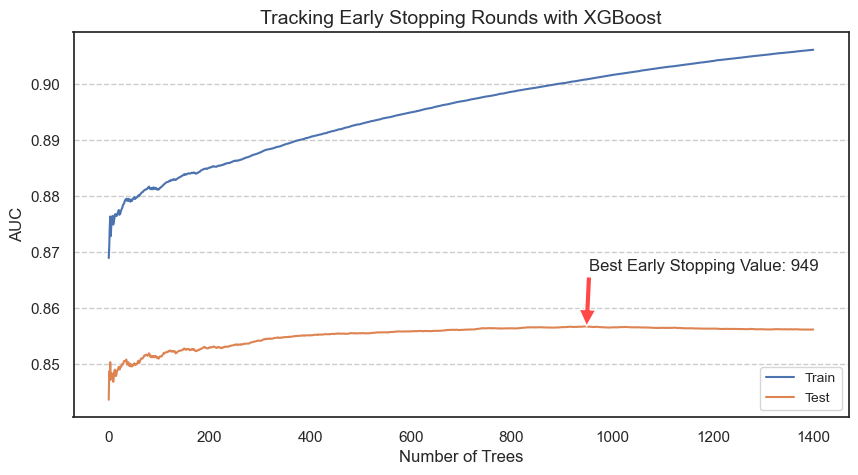

Optimal Early Stopping Round based on AUC: 949


In [113]:
def find_optimal_early_stopping_auc(X_train, y_train, X_test, y_test, early_stopping_rounds=500):
    model = xgb.XGBClassifier(**best_hyperparams)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
              early_stopping_rounds=early_stopping_rounds, verbose=False)
    results = model.evals_result()

    plt.figure(figsize=(10, 5)) 
    plt.plot(results['validation_0']['auc'], label='Train')
    plt.plot(results['validation_1']['auc'], label='Test')
    plt.ylabel('AUC', fontsize=12)
    plt.xlabel('Number of Trees', fontsize=12)
    plt.title('Tracking Early Stopping Rounds with XGBoost', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(axis='y', linestyle='--')

    best_round = model.best_iteration + 1
    best_val_auc = results['validation_1']['auc'][best_round - 1]
    plt.annotate(f'Best Early Stopping Value: {best_round}',
                 xy=(best_round, best_val_auc),
                 xytext=(best_round + 5, best_val_auc + 0.01),
                 arrowprops=dict(facecolor='#FF4848', shrink=0.001),
                 )

    plt.show();
    return best_round

optimal_rounds_auc = find_optimal_early_stopping_auc(X_train, y_train, X_test, y_test)
print(f"Optimal Early Stopping Round based on AUC: {optimal_rounds_auc}")

In [114]:
best_hyperparams

{'colsample_bytree': 0.855214369015226,
 'gamma': 0,
 'learning_rate': 0.004384266094853482,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 1400,
 'reg_alpha': 0.08606449793289896,
 'reg_lambda': 0.002287218185961698,
 'scale_pos_weight': 0.4010878261496026,
 'subsample': 0.8876125685772759,
 'tree_method': 'hist',
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'seed': 101}

In [104]:
# list values for hyperparameters for tuning the model

best_hyperparams = {'colsample_bytree': 0.855214369015226,
                    'gamma': 4,
                    'learning_rate': 0.004384266094853482,
                    'max_depth': 8,
                    'min_child_weight': 3,
                    'n_estimators': 1400,
                    'reg_alpha': 0.08606449793289896,
                    'reg_lambda': 0.002287218185961698,
                    'scale_pos_weight': 0.4010878261496026,
                    'subsample': 0.8876125685772759,
                    'tree_method': 'hist',
                    'objective': 'binary:logistic',
                    'eval_metric': 'auc',
                    'seed': 101}

optimal_rounds_auc = 949

In [107]:
# initialize xgboost model with chosen hyperparameters
tuned_model = xgb.XGBClassifier(**best_hyperparams, missing=np.nan)
tuned_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=optimal_rounds_auc, verbose=0)
y_pred_tuned = tuned_model.predict(X_test)

# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_tuned):.4f}")
print(f'F-beta score: {fbeta_score(y_test, y_pred_tuned, beta=1.5):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1]):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

Accuracy: 0.8359
Precision: 0.9140
Recall: 0.5006
F1-score: 0.6469
F-beta score: 0.5815
ROC-AUC: 0.9294
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1978
           1       0.91      0.50      0.65       849

    accuracy                           0.84      2827
   macro avg       0.87      0.74      0.77      2827
weighted avg       0.85      0.84      0.82      2827



In [108]:
# Lets's perform Cross-validation on the data

scores_tuned = cross_val_score(tuned_model,
                         X_train,
                         y_train,
                         cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=101),
                         scoring=make_scorer(roc_auc_score))
print("Cross-validation scores:", scores_tuned)
print("Mean Cross-validation scores:", scores_tuned.mean())
print("Standard deviation:", scores_tuned.std())

Cross-validation scores: [0.72724622 0.75171001 0.73805839 0.74701914 0.74619581 0.74562709
 0.77027411 0.75011738 0.74522646 0.7727822 ]
Mean Cross-validation scores: 0.7494256821713947
Standard deviation: 0.012865887820981206


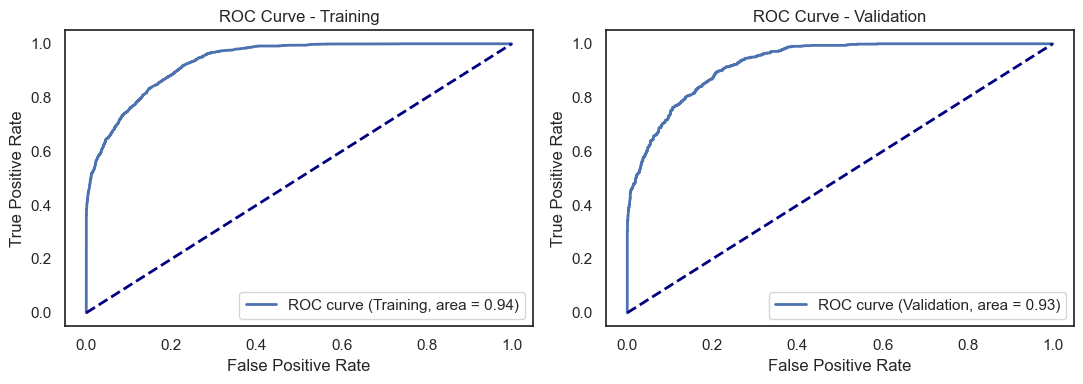

In [109]:
def plot_roc_curve(model, X, y, label, ax):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    ax.plot(fpr, tpr, lw=2, label=f'ROC curve ({label}, area = {auc(fpr, tpr):.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title=f'ROC Curve - {label}')
    ax.legend(loc='lower right')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
plot_roc_curve(tuned_model, X_train, y_train, 'Training', axs[0])
plot_roc_curve(tuned_model, X_test, y_test, 'Validation', axs[1])
plt.tight_layout()
plt.show();

In [73]:
# save default model
import joblib;joblib.dump(tuned_model, 'tuned_xgboost_model.joblib')

['tuned_xgboost_model.joblib']

## Feature Importances

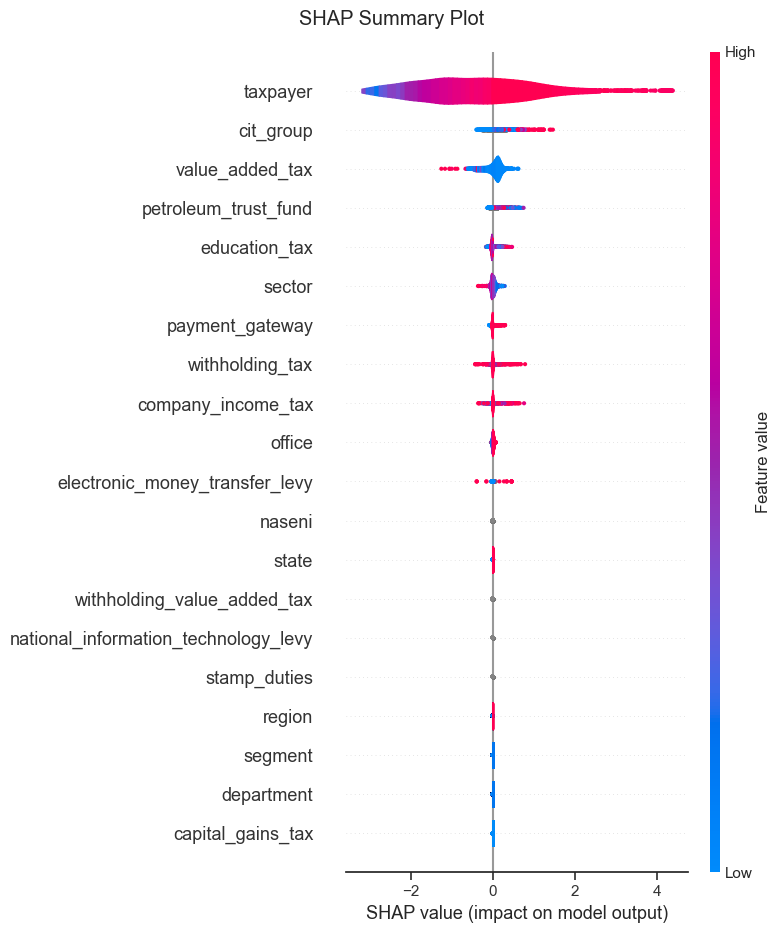

In [119]:
# Create the SHAP explainer
plt.figure(figsize=[15, 150])
plt.suptitle('SHAP Summary Plot')

explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
shap.summary_plot(shap_values, X_test, plot_type='violin')
plt.show();

## Comparing Default and Tuned Models

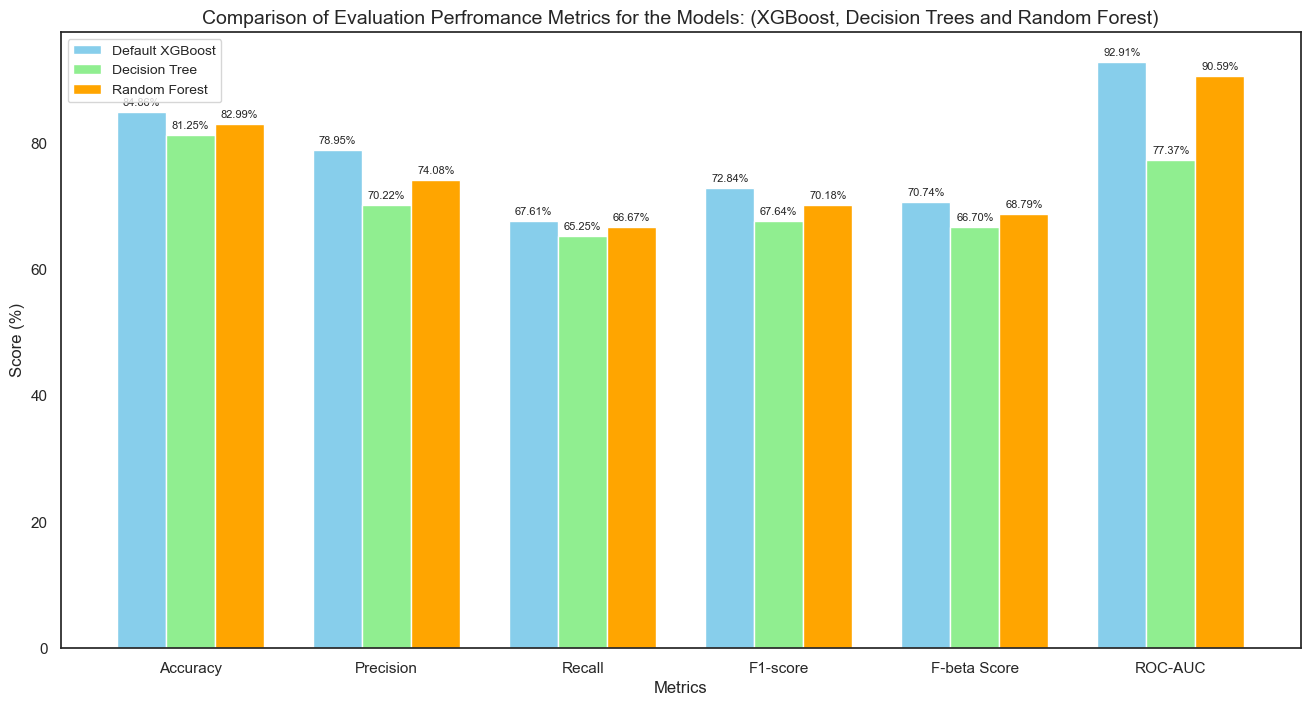

In [78]:
# Evaluation metrics and model names
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "F-beta Score", "ROC-AUC"]
models = ["Default XGBoost", "Decision Tree", "Random Forest"]
y_preds = [y_pred_default, y_pred_dt, y_pred_rf]
model_objs = [default_model, dt_model, rf_model]

# Calculate scores for each model
scores = []
for y_pred, model in zip(y_preds, model_objs):
    scores.append([
        accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
        recall_score(y_test, y_pred), f1_score(y_test, y_pred),
        fbeta_score(y_test, y_pred, beta=1.5),
        roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    ])

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.25
colors = ['skyblue', 'lightgreen', 'orange']
x = np.arange(len(metrics))

for i, (model_name, model_scores) in enumerate(zip(models, scores)):
    bars = ax.bar(x + i * bar_width, [s * 100 for s in model_scores], color=colors[i], width=bar_width, label=model_name)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar_width / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Formatting the plot
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_title('Comparison of Evaluation Perfromance Metrics for the Models: (XGBoost, Decision Trees and Random Forest)', fontsize=14)
ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend(fontsize=10)
plt.show();

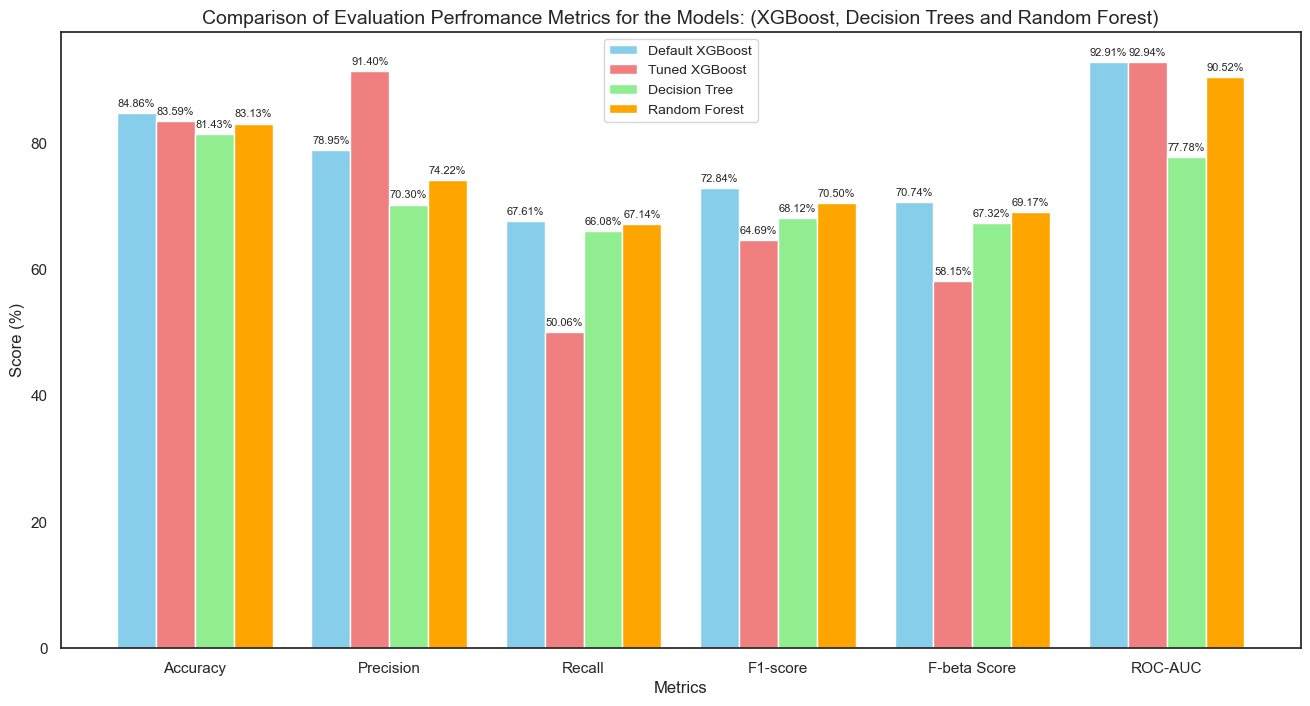

In [132]:
# Evaluation metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "F-beta Score", "ROC-AUC"]

def to_percentage(scores):
    return [score * 100 for score in scores]

default_scores = to_percentage([accuracy_score(y_test, y_pred_default), precision_score(y_test, y_pred_default),
                  recall_score(y_test, y_pred_default), f1_score(y_test, y_pred_default),
                  fbeta_score(y_test, y_pred_default, beta=1.5),
                  roc_auc_score(y_test, default_model.predict_proba(X_test)[:, 1])])

tuned_scores = to_percentage([accuracy_score(y_test, y_pred_tuned), precision_score(y_test, y_pred_tuned),
                recall_score(y_test, y_pred_tuned), f1_score(y_test, y_pred_tuned),
                fbeta_score(y_test, y_pred_tuned, beta=1.5),
                roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1])])

dt_scores = to_percentage([accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt),
             recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt),
             fbeta_score(y_test, y_pred_dt, beta=1.5),
             roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])])

rf_scores = to_percentage([accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf),
             recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf),
             fbeta_score(y_test, y_pred_rf, beta=1.5),
             roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])])

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.2
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

bars1 = ax.bar(r1, default_scores, color='skyblue', width=bar_width, label='Default XGBoost')
bars2 = ax.bar(r2, tuned_scores, color='lightcoral', width=bar_width, label='Tuned XGBoost')
bars3 = ax.bar(r3, dt_scores, color='lightgreen', width=bar_width, label='Decision Tree')
bars4 = ax.bar(r4, rf_scores, color='orange', width=bar_width, label='Random Forest')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=8)  # Smaller font size

ax.set_ylabel('Score (%)', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_title('Comparison of Evaluation Perfromance Metrics for the Models: (XGBoost, Decision Trees and Random Forest)', fontsize=14)
ax.set_xticks([r + 1.5 * bar_width for r in range(len(metrics))])
ax.set_xticklabels(metrics)
ax.legend(fontsize=10)

# plt.savefig('model_comparison_perfromance.jpg', dpi=1000)
plt.show();

## Confusion Matrices

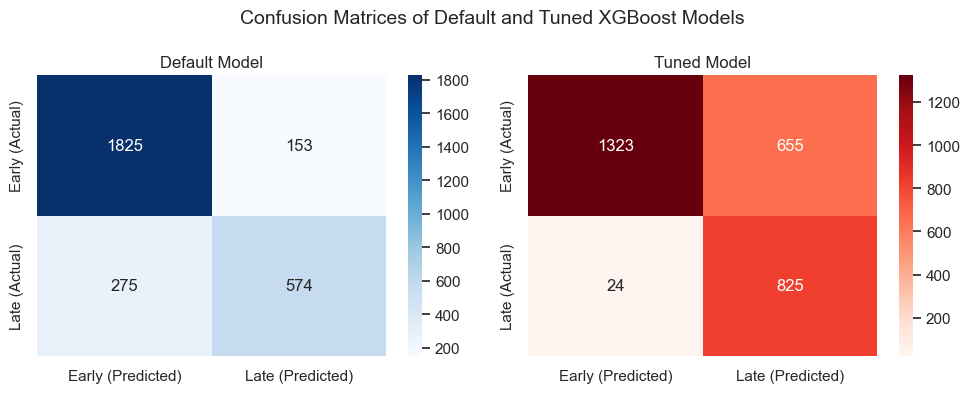

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Confusion Matrices of Default and Tuned XGBoost Models', fontsize=14)

# Default Model
cm_default = confusion_matrix(y_test, y_pred_default)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Early (Predicted)', 'Late (Predicted)'], 
            yticklabels=['Early (Actual)', 'Late (Actual)'])
axes[0].set_title('Default Model', fontsize=12)

# Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Early (Predicted)', 'Late (Predicted)'],
            yticklabels=['Early (Actual)', 'Late (Actual)'])
axes[1].set_title('Tuned Model', fontsize=12)

plt.tight_layout()
plt.show();